## Notebook for data analysis of 'sensory' sessions [random/sensory photostim target groups]

In [2]:
%run ./rob_setup_notebook.ipynb

import utils.utils_funcs as uf
import utils.gsheets_importer as gsi
import utils.ia_funcs as ia 
from utils.paq2py import *

# session_type = 'sensory_nodetrend'
session_type = 'sensory_highactivity'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Suite2p path: ['/home/rlees/anaconda3/envs/suite2p/lib/python3.7/site-packages/suite2p']
QNAP_path: /home/rlees/mnt/qnap 
QNAP_data_path /home/rlees/mnt/qnap/Data 
Pickle folder: /home/rlees/mnt/qnap/pkl_files 
Master pickle: /home/rlees/mnt/qnap/master_pkl/master_obj.pkl 
Figure save path: /home/rlees/mnt/qnap/Analysis/Figures 
STA movie save path: /home/rlees/mnt/qnap/Analysis/STA_movies 
S2 borders path: /home/rlees/mnt/qnap/Analysis/S2_borders


# Define dataframe paths

In [3]:
session_df_path = qnap_path + '/pkl_files/dataframes/' + session_type + '_session_df.pkl'
experiment_df_path = qnap_path + '/pkl_files/dataframes/' + session_type + '_experiment_df.pkl'
trial_df_path = qnap_path + '/pkl_files/dataframes/' + session_type + '_trial_df.pkl'
cell_df_path = qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl'
cell_trial_df_path = qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_trial_df.pkl'
cell_mean_timepoint_df_path = qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl'
cell_trial_single_timepoint_df_path = (qnap_path + '/pkl_files/dataframes/' + session_type + 
                                       '_cell_trial_single_timepoint_df.pkl')

crop = False

if crop:
    session_df_path = os.path.splitext(session_df_path)[0] + '_postSep2020.pkl'
    experiment_df_path = os.path.splitext(experiment_df_path)[0] + '_postSep2020.pkl'
    trial_df_path = os.path.splitext(trial_df_path)[0] + '_postSep2020.pkl'
    cell_df_path = os.path.splitext(cell_df_path)[0] + '_postSep2020.pkl'
    cell_trial_df_path = os.path.splitext(cell_trial_df_path)[0] + '_postSep2020.pkl'
    cell_mean_timepoint_df_path = os.path.splitext(cell_mean_timepoint_df_path)[0] + '_postSep2020.pkl'
    cell_trial_single_timepoint_df_path = os.path.splitext(cell_trial_single_timepoint_df_path)[0] + '_postSep2020.pkl'

# Constructing high target activity dataframes 

In [ ]:
# REMOVED COLUMNS THAT WEREN'T CHANGED TO CATCH ANALYSES THAT NEED THEM AND FIX IF REALLY REQUIRED
# cell_df, sta_amp_resp needs to change for pr/ps to only be mean of trials with high dFF in targets
# resp_sign should change too to reflect sign of sta_amp_resp, prob_response, sta_sig should all change
# cell_trial_df, pr_amp_resp with NA depending on trial type
# cell_mean_timepoint_df, remake from cell_single_timepoint_df (already got code for this)
# cell_trial_single_timepoint_df, only use trials with high target activity (already got code for this)
# resave these in new folder called 'sensory_nodetrend_highactivity'

In [59]:
cell_df = pd.read_pickle(cell_df_path)

In [63]:
cell_df

session_id  cell_num  s1_cell  s2_cell  \
cell_id                                                               
2020-09-04_RL093_0     2020-09-04_RL093         0     True    False   
2020-09-04_RL093_1     2020-09-04_RL093         1    False     True   
2020-09-04_RL093_2     2020-09-04_RL093         2     True    False   
2020-09-04_RL093_3     2020-09-04_RL093         3    False     True   
2020-09-04_RL093_4     2020-09-04_RL093         4    False     True   
...                                 ...       ...      ...      ...   
2020-10-12_RL109_4369  2020-10-12_RL109      4369     True    False   
2020-10-12_RL109_4370  2020-10-12_RL109      4370     True    False   
2020-10-12_RL109_4374  2020-10-12_RL109      4374     True    False   
2020-10-12_RL109_4378  2020-10-12_RL109      4378     True    False   
2020-10-12_RL109_4382  2020-10-12_RL109      4382    False     True   

                              cell_med  \
cell_id                                  
2020-09-04_RL093_0       [91.0, 551.0]   
2020-09-04_RL093_1      [544.0, 738.0]   
2020-09-04_RL093_2       [711.0, 71.0]   
2020-09-04_RL093_3      [669.0, 602.0]   
2020-09-04_RL093_4      [480.0, 773.0]   
...                                ...   
2020-10-12_RL109_4369   [345.0, 300.0]   
2020-10-12_RL109_4370   [593.0, 295.0]   
2020-10-12_RL109_4374   [337.0, 622.0]   
2020-10-12_RL109_4378   [595.0, 592.0]   
2020-10-12_RL109_4382  [138.0, 1014.0]   

                                                                  cell_x  \
cell_id                                                                    
2020-09-04_RL093_0     [548, 549, 550, 551, 552, 548, 549, 550, 551, ...   
2020-09-04_RL093_1     [737, 735, 736, 737, 738, 739, 740, 741, 734, ...   
2020-09-04_RL093_2     [70, 71, 72, 69, 70, 71, 72, 73, 74, 67, 68, 6...   
2020-09-04_RL093_3     [599, 600, 601, 602, 599, 600, 601, 602, 603, ...   
2020-09-04_RL093_4     [773, 773, 774, 773, 774, 772, 773, 774, 772, ...   
...                                                                  ...   
2020-10-12_RL109_4369  [295, 296, 297, 298, 299, 300, 301, 302, 303, ...   
2020-10-12_RL109_4370  [293, 291, 292, 293, 294, 290, 291, 292, 293, ...   
2020-10-12_RL109_4374  [621, 622, 623, 624, 619, 620, 621, 622, 623, ...   
2020-10-12_RL109_4378  [589, 590, 591, 589, 590, 591, 592, 593, 588, ...   
2020-10-12_RL109_4382  [1012, 1013, 1014, 1015, 1016, 1010, 1011, 101...   

                                                                  cell_y  \
cell_id                                                                    
2020-09-04_RL093_0     [86, 86, 86, 86, 86, 87, 87, 87, 87, 87, 87, 8...   
2020-09-04_RL093_1     [539, 540, 540, 540, 540, 540, 540, 540, 541, ...   
2020-09-04_RL093_2     [707, 707, 707, 708, 708, 708, 708, 708, 708, ...   
2020-09-04_RL093_3     [664, 664, 664, 664, 665, 665, 665, 665, 665, ...   
2020-09-04_RL093_4     [469, 470, 470, 471, 471, 472, 472, 472, 473, ...   
...                                                                  ...   
2020-10-12_RL109_4369  [342, 342, 342, 342, 342, 342, 342, 342, 342, ...   
2020-10-12_RL109_4370  [587, 588, 588, 588, 588, 589, 589, 589, 589, ...   
2020-10-12_RL109_4374  [332, 332, 332, 332, 333, 333, 333, 333, 333, ...   
2020-10-12_RL109_4378  [590, 590, 590, 591, 591, 591, 591, 591, 592, ...   
2020-10-12_RL109_4382  [134, 134, 134, 134, 134, 135, 135, 135, 135, ...   

                       pr_target  ps_target  pr_sta_amp_resp  ps_sta_amp_resp  \
cell_id                                                                         
2020-09-04_RL093_0         False      False         0.030939         0.069303   
2020-09-04_RL093_1         False      False         0.039273         0.149430   
2020-09-04_RL093_2         False      False         0.037042         0.292258   
2020-09-04_RL093_3         False      False         0.014526         0.065948   
2020-09-04_RL093_4         False      False        -0.024919         0.087191   
...          

In [60]:
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)
cell_df_copy = cell_mean_timepoint_df.query('(timepoint > 0.35) & (timepoint < 0.85)') \
                                     .groupby('cell_id') \
                                     .mean() \
                                     .rename(columns={'pr_sta_resp' : 'pr_sta_amp_resp',
                                                      'ps_sta_resp' : 'ps_sta_amp_resp',
                                                      'spont_sta_resp' : 'spont_sta_amp_resp',
                                                      'whisker_sta_resp' : 'whisker_sta_amp_resp'
                                                     }) \
                                     .iloc[:,-4:]

In [61]:
cell_df['pr_sta_amp_resp'] = cell_df_copy['pr_sta_amp_resp']
cell_df['ps_sta_amp_resp'] = cell_df_copy['ps_sta_amp_resp']
cell_df['spont_sta_amp_resp'] = cell_df_copy['spont_sta_amp_resp']
cell_df['whisker_sta_amp_resp'] = cell_df_copy['whisker_sta_amp_resp']

In [62]:
cell_df['pr_resp_sign'] = np.sign(cell_df['pr_sta_amp_resp']) == 1
cell_df['ps_resp_sign'] = np.sign(cell_df['ps_sta_amp_resp']) == 1
cell_df['spont_resp_sign'] = np.sign(cell_df['spont_sta_amp_resp']) == 1
cell_df['whisker_resp_sign'] = np.sign(cell_df['whisker_sta_amp_resp']) == 1

In [101]:
cell_trial_single_timepoint_df = pd.read_pickle(cell_trial_single_timepoint_df_path)

In [102]:
cell_trial_single_timepoint_df.reset_index(drop=False, inplace=True)

In [103]:
baseline = cell_trial_single_timepoint_df.query('(timepoint < 0) & (timepoint > -0.5)').groupby(['cell_id', 'trial_num']).mean()
post_stim = cell_trial_single_timepoint_df.query('(timepoint > 0.35) & (timepoint < 0.85)').groupby(['cell_id', 'trial_num']).mean()

amp_resp = post_stim.loc[:, ['pr_resp', 'ps_resp', 'spont_resp', 'whisker_resp']] - baseline.loc[:, ['pr_resp', 'ps_resp', 'spont_resp', 'whisker_resp']]

In [104]:
amp_resp.rename(columns = {'pr_resp' : 'pr_amp_resp',
                           'ps_resp' : 'ps_amp_resp',
                           'spont_resp' : 'spont_amp_resp',
                           'whisker_resp' : 'whisker_amp_resp'
                          }, inplace=True)

In [105]:
cell_trial_df = pd.read_pickle(cell_trial_df_path)

In [ ]:
cell_trial_df.reset_index(drop=False, inplace=True)
cell_trial_df.set_index(['cell_id', 'trial_num'], inplace=True)

In [108]:
cell_trial_df['pr_amp_resp'] = amp_resp['pr_amp_resp']
cell_trial_df['ps_amp_resp'] = amp_resp['ps_amp_resp']
cell_trial_df['spont_amp_resp'] = amp_resp['spont_amp_resp']
cell_trial_df['whisker_amp_resp'] = amp_resp['whisker_amp_resp']

In [109]:
cell_trial_df.reset_index(drop=False, inplace=True)
cell_trial_df.set_index('cell_trial_id', inplace=True)
cell_trial_df = cell_trial_df.iloc[:, :8]

In [26]:
cell_trial_single_timepoint_df = pd.read_pickle(cell_trial_single_timepoint_df_path)
cell_trial_single_timepoint_df.set_index(['trial_num', 'session_id'], inplace=True)
cell_trial_single_timepoint_df = cell_trial_single_timepoint_df.round({'timepoint' : 2})

In [45]:
cell_trial_df = pd.read_pickle(cell_trial_df_path)
cell_df = pd.read_pickle(cell_df_path)

trial_type = ['random', 'sensory', 'sham']
target_type = ['pr_target', 'ps_target', 'pr_target']
amp_responses = ['pr_amp_resp', 'ps_amp_resp', 'spont_amp_resp']

pr_target_cell_ids = cell_df.query('pr_target').index
ps_target_cell_ids = cell_df.query('ps_target').index
sham_target_cell_ids = cell_df.query('pr_target').index

pr_target_filter = cell_trial_df['cell_id'].isin(pr_target_cell_ids)
ps_target_filter = cell_trial_df['cell_id'].isin(ps_target_cell_ids)
sham_target_filter = cell_trial_df['cell_id'].isin(sham_target_cell_ids)

pr_target_trial_df = cell_trial_df[pr_target_filter]
ps_target_trial_df = cell_trial_df[ps_target_filter]
sham_target_trial_df = cell_trial_df[sham_target_filter]

pr_target_trial_amp_resp = pr_target_trial_df.groupby(['trial_num','session_id']).sum()['pr_amp_resp']
ps_target_trial_amp_resp = ps_target_trial_df.groupby(['trial_num','session_id']).sum()['ps_amp_resp']
sham_target_trial_amp_resp = sham_target_trial_df.groupby(['trial_num','session_id']).sum()['spont_amp_resp']

sham_indices = sham_target_trial_amp_resp.index
pr_indices = pr_target_trial_amp_resp.index[pr_target_trial_amp_resp<15]
ps_indices = ps_target_trial_amp_resp.index[ps_target_trial_amp_resp<15]

In [32]:
cell_trial_single_timepoint_df.sort_index(inplace=True)

In [53]:
cell_trial_single_timepoint_df.loc[pr_indices, 'pr_resp'] = np.nan
cell_trial_single_timepoint_df.loc[ps_indices, 'ps_resp'] = np.nan

In [68]:
cell_mean_timepoint_df = cell_trial_single_timepoint_df.groupby(['cell_id', 'timepoint']).mean()
cell_mean_timepoint_df.reset_index(inplace=True, drop=False)

In [9]:
cell_mean_timepoint_df.rename(columns={'pr_resp' : 'pr_sta_resp',
                                       'ps_resp' : 'ps_sta_resp',
                                       'spont_resp' : 'spont_sta_resp',
                                       'whisker_resp' : 'whisker_sta_resp'
                                      }, inplace=True)

In [80]:
cell_mean_timepoint_df['frame'] = np.tile(range(0,182), 17647)

In [155]:
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

In [110]:
session_type = 'sensory_highactivity'
df_name = session_type + '_cell_trial_df'

# df.reset_index(drop=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
cell_trial_df.to_pickle(pkl_path)

# Data organisation

### For the following dataframes it will be possible to uses the dataframe above to index the dataframe below, or vice versa

## Use cases:
- find average response to pr stim in ps targets
    - use the cell dataframe to get cell IDs for ps targets and index the timepoint dataframe to produce an average response to pr
- find sum or mean dff response on a single trial for pr target cells
    - use the cell dataframe to find pr target cells, use timepoint dataframe to group by trial_num and mean the pre and post

# Construct dataframes

## Session dataframe
- all sessions in project (index = session)
- include information such as:
    - ss_id [string]
    - session_id [string] (sheet_name)
    - s2p_path [string]
    - frame_list [string]
    - x_pix_reg [list] (xoff)
    - y_pix_reg [list] (yoff)
    - mean_img [array]
    - mean_imgE [array]

In [ ]:
df_name = session_type + '_session_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(os.path.join(pkl_folder, session_type), string='.pkl')

df = pd.DataFrame()
index = []

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    ss_id = ses_obj.ss_id
    session_id = ses_obj.sheet_name
    s2p_path = ses_obj.s2p_path
    frame_list = list(ses_obj.frame_list)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)

    x_pix_reg = list(exp_list[0].xoff)
    y_pix_reg = list(exp_list[0].yoff)
    mean_img = exp_list[0].mean_img[0]
    mean_imgE = exp_list[0].mean_imgE[0]
            
    temp_df = pd.DataFrame({'ss_id'      : ss_id,
                            's2p_path'   : s2p_path,
                            'frame_list' : [frame_list],
                            'x_pix_reg'  : [x_pix_reg],
                            'y_pix_reg'  : [y_pix_reg],
                            'mean_img'   : [mean_img],
                            'mean_imgE'  : [mean_imgE]
                            })
    
    df = pd.concat([df, temp_df])
    index.extend([session_id])
    
df.index = index
df.index.rename('session_id', inplace=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

## Experiment dataframe
- all experiments i.e. stim types across all sessions (index = session, experiment)
- include information such as:
    - session_id (sheet_name)
    - stim_type
    - tiff_path
    - naparm_path
    - paq_path
    - stim_channel
    - fps
    - frame_x
    - frame_y
    - n_planes
    - pix_sz_x
    - pix_sz_y
    - scan_x
    - scan_y
    - zoom
    - n_frames
    - last_good_frame
    - n_groups
    - n_reps
    - n_shots
    - inter_point_delay
    - single_stim_dur
    - spiral_size
    - stim_dur
    - stim_freq
    - duration_frames
    - frames [tuple]
    - n_units
    - num_s1_cells
    - num_s2_cells
    - pre_frames
    - post_frames
    - test_frames
    - pre_trial_frames
    - post_trial_frames
    - n_trials
    - n_groups = exp_obj.n_groups
    - n_reps = exp_obj.n_reps
    - n_shots = exp_obj.n_shots
    - inter_point_delay = exp_obj.inter_point_delay
    - single_stim_dur = exp_obj.single_stim_dur
    - spiral_size = exp_obj.spiral_size
    - n_targets
    - n_targeted_cells
    - sta_euclid_dist

In [ ]:
df_name = session_type + '_experiment_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(os.path.join(pkl_folder, session_type), string='.pkl')

df = pd.DataFrame()
index = []

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    for exp_obj in exp_list:
        
        session_id = exp_obj.sheet_name
        stim_type = exp_obj.stim_type
        tiff_path = str(exp_obj.tiff_path)
        naparm_path = str(exp_obj.naparm_path)
        paq_path = str(exp_obj.paq_path)
        stim_channel = exp_obj.stim_channel
        fps = exp_obj.fps
        frame_x = exp_obj.frame_x
        frame_y = exp_obj.frame_y
        n_planes = exp_obj.n_planes
        pix_sz_x = exp_obj.pix_sz_x
        pix_sz_y = exp_obj.pix_sz_y
        scan_x = exp_obj.scan_x
        scan_y = exp_obj.scan_y
        zoom = exp_obj.zoom
        n_frames = int(exp_obj.n_frames)
        last_good_frame = int(exp_obj.last_good_frame)
        stim_dur = exp_obj.stim_dur
        stim_freq = exp_obj.stim_freq
        duration_frames = exp_obj.duration_frames
        frames = exp_obj.frames
        n_units = exp_obj.n_units[0]
        num_s1_cells = exp_obj.num_s1_cells[0]
        num_s2_cells = exp_obj.num_s2_cells[0]
        pre_frames = exp_obj.pre_frames
        post_frames = exp_obj.post_frames
        test_frames = exp_obj.test_frames
        pre_trial_frames = exp_obj.pre_trial_frames
        post_trial_frames = exp_obj.post_trial_frames
        n_trials = exp_obj.n_trials
        
        try:
            n_groups = exp_obj.n_groups
            n_reps = exp_obj.n_reps
            n_shots = exp_obj.n_shots
            inter_point_delay = exp_obj.inter_point_delay
            single_stim_dur = exp_obj.single_stim_dur
            spiral_size = exp_obj.spiral_size
            n_targets = exp_obj.n_targets
            n_targeted_cells = int(exp_obj.n_targeted_cells)
            sta_euclid_dist = exp_obj.sta_euclid_dist
        except AttributeError:
            print('no photostim attributes for this experiment', session_id, stim_type)
            n_groups = np.nan
            n_reps = np.nan
            n_shots = np.nan
            inter_point_delay = np.nan
            single_stim_dur = np.nan
            spiral_size = np.nan
            n_targets = np.nan
            n_targeted_cells = np.nan
            sta_euclid_dist = np.nan
        
        temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                                'stim_type'  : pd.Series(stim_type, dtype='category'),
                                'tiff_path' : tiff_path,
                                'naparm_path' : naparm_path,
                                'paq_path' : paq_path,
                                'stim_channel' : stim_channel,
                                'fps' : fps,
                                'frame_x' : frame_x,
                                'frame_y' : frame_y,
                                'n_planes' : n_planes,
                                'pix_sz_x' : pix_sz_x,
                                'pix_sz_y' : pix_sz_y,
                                'scan_x' : scan_x,
                                'scan_y' : scan_y,
                                'zoom' : zoom,
                                'n_frames' : n_frames,
                                'last_good_frame' : last_good_frame,
                                'stim_dur' : stim_dur,
                                'stim_freq' : stim_freq,
                                'duration_frames' : duration_frames,
                                'frames' : [frames],
                                'n_units' : n_units,
                                'num_s1_cells' : num_s1_cells,
                                'num_s2_cells' : num_s2_cells,
                                'pre_frames' : pre_frames,
                                'post_frames' : post_frames,
                                'test_frames' : test_frames,
                                'pre_trial_frames' : pre_trial_frames,
                                'post_trial_frames' : post_trial_frames,
                                'n_trials' : n_trials,
                                'sta_euclid_dist' : sta_euclid_dist,
                                'n_groups' : n_groups,
                                'n_reps' : n_reps,
                                'n_shots' : n_shots,
                                'inter_point_delay' : inter_point_delay,
                                'single_stim_dur' : single_stim_dur,
                                'spiral_size' : spiral_size,
                                'n_targets' : n_targets,
                                'n_targeted_cells' : n_targeted_cells
                                })
        
        df = pd.concat([df, temp_df])
        experiment_id = session_id + '_' + stim_type
        index.extend([experiment_id])

df.index = index
df.index.rename('experiment_id', inplace=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

## Trial dataframe
- all trials across all experiments i.e. stim types for all sessions (index = session, experiment, trial)
    - session_id (sheet_name)
    - stim_type
    - trial_num [float]
    - trial_target_dff
    - trial_target_euclid_dist

In [ ]:
df_name = session_type + '_trial_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(os.path.join(pkl_folder, session_type), string='.pkl')

df = pd.DataFrame()
index = []

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    for exp_obj in exp_list:
        
        session_id = list(np.repeat(exp_obj.sheet_name, exp_obj.n_trials))
        stim_type = list(np.repeat(exp_obj.stim_type, exp_obj.n_trials))
        experiment_id = [session + '_' + stim for session, stim in zip(session_id,stim_type)]

        trial_num = list(range(1,exp_obj.n_trials+1))
        trial_num_str = np.array(trial_num, dtype='str')
        trial_id = [exp + '_' + trial for exp, trial in zip(experiment_id, trial_num_str)]
        
        try:
            trial_target_dff = exp_obj.trial_target_dff
            trial_target_euclid_dist = exp_obj.trial_euclid_dist
        except AttributeError:
            print('no photostim attributes for this experiment', session_id[0], stim_type[0])
            trial_target_dff = list(np.repeat(np.nan, exp_obj.n_trials))
            trial_target_euclid_dist = list(np.repeat(np.nan, exp_obj.n_trials))
        
        temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                                'stim_type'  : pd.Series(stim_type, dtype='category'),
                                'experiment_id' : experiment_id,
                                'trial_num'  : pd.Series(trial_num, dtype='int8'),
                                'trial_target_dff' : trial_target_dff,
                                'trial_target_euclid_dist' : trial_target_euclid_dist
                                })
        
        df = pd.concat([df, temp_df])
        index.extend(trial_id)
    
df.index = index
df.index.rename('trial_id', inplace=True)
    
# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

## Cell dataframe
- all cells across all sessions (index = session, cell)
- include information such as:
    - session_id (sheet_name)
    - cell_num
    - cell_id [float]
    - s1_cell [bool]
    - s2_cell [bool]
    - pr_target [bool]
    - ps_target [bool]
    - pr_resp_sign [string]
    - ps_resp_sign [string]
    - spont_resp_sign [string]
    - whisker_resp_sign [string]
    - cell_med [tuple]
    - cell_x [list]
    - cell_y [list]
    - prob_response_pr [float]
    - prob_response_ps [float]
    - prob_response_whisker [float]
    - prob_response_spont
    - sta_sig_pr [bool]
    - sta_sig_ps [bool]
    - sta_sig_whisker [bool]
    - sta_sig_spont [bool]
    - sta_sig_nomulti_pr [bool]
    - sta_sig_nomulti_ps [bool]
    - sta_sig_nomulti_whisker [bool]
    - sta_sig_nomulti [bool]
    - wilcoxons

In [ ]:
df_name = session_type + '_cell_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(os.path.join(pkl_folder, session_type), string='.pkl')

df = pd.DataFrame()
index = []

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    session_id = list(np.repeat(exp_list[0].sheet_name, exp_list[0].n_units[0]))
    
    cell_num = exp_list[0].cell_id[0]
    cell_num_str = np.array(cell_num, dtype='str')
    cell_id = [session + '_' + cell for session, cell in zip(session_id, cell_num_str)]
    
    s1_cell = exp_list[0].cell_s1[0]
    s2_cell = exp_list[0].cell_s2[0]
    cell_med = exp_list[0].cell_med[0]
    cell_x = exp_list[0].cell_x[0]
    cell_y = exp_list[0].cell_y[0]
    
    for exp_obj in exp_list:
        
        if exp_obj.stim_type == 'pr':
            pr_target = exp_obj.targeted_cells
            pr_resp_pos = exp_obj.sta_amplitudes[0] > 0
            pr_sta_amp_resp = exp_obj.sta_amplitudes[0]
            prob_response_pr = exp_obj.prob_response[0]
            sta_sig_pr = exp_obj.sta_sig[0]
            sta_sig_nomulti_pr = exp_obj.sta_sig_nomulti[0]
            wilcoxons_pr = exp_obj.wilcoxons[0]            
        
        if exp_obj.stim_type == 'ps':
            ps_target = exp_obj.targeted_cells
            ps_resp_pos = exp_obj.sta_amplitudes[0] > 0
            ps_sta_amp_resp = exp_obj.sta_amplitudes[0]
            prob_response_ps = exp_obj.prob_response[0]
            sta_sig_ps = exp_obj.sta_sig[0]
            sta_sig_nomulti_ps = exp_obj.sta_sig_nomulti[0]
            wilcoxons_ps = exp_obj.wilcoxons[0]
        
        if exp_obj.stim_type == 'none':
            spont_resp_pos = exp_obj.sta_amplitudes[0] > 0
            spont_sta_amp_resp = exp_obj.sta_amplitudes[0]
            prob_response_spont = exp_obj.prob_response[0]
            sta_sig_spont = exp_obj.sta_sig[0]
            sta_sig_nomulti_spont = exp_obj.sta_sig_nomulti[0]
            wilcoxons_spont = exp_obj.wilcoxons[0]
        
        if exp_obj.stim_type == 'w':
            whisker_resp_pos = exp_obj.sta_amplitudes[0] > 0
            whisker_sta_amp_resp = exp_obj.sta_amplitudes[0]
            prob_response_whisker = exp_obj.prob_response[0]
            sta_sig_whisker = exp_obj.sta_sig[0]
            sta_sig_nomulti_whisker = exp_obj.sta_sig_nomulti[0]
            wilcoxons_whisker = exp_obj.wilcoxons[0]
        
    temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                            'cell_num' : pd.Series(cell_num, dtype='int16'),
                            's1_cell' : s1_cell,
                            's2_cell' : s2_cell,
                            'cell_med' : cell_med,
                            'cell_x' : cell_x,
                            'cell_y' : cell_y,
                            'pr_target' : pr_target,
                            'ps_target' : ps_target,
                            'pr_sta_amp_resp' : pr_sta_amp_resp,
                            'ps_sta_amp_resp' : ps_sta_amp_resp,
                            'spont_sta_amp_resp' : spont_sta_amp_resp,
                            'whisker_sta_amp_resp' : whisker_sta_amp_resp,
                            'pr_resp_sign' : pr_resp_pos,
                            'ps_resp_sign' : ps_resp_pos,
                            'spont_resp_sign' : spont_resp_pos,
                            'whisker_resp_sign' : whisker_resp_pos,
                            'prob_response_pr' : prob_response_pr,
                            'prob_response_ps' : prob_response_ps,
                            'prob_response_spont' : prob_response_spont,
                            'prob_response_whisker' : prob_response_whisker,
                            'sta_sig_pr' : sta_sig_pr,
                            'sta_sig_ps' : sta_sig_ps,
                            'sta_sig_spont' : sta_sig_spont,
                            'sta_sig_whisker' : sta_sig_whisker,
                            'sta_sig_nomulti_pr' : sta_sig_nomulti_pr,
                            'sta_sig_nomulti_ps' : sta_sig_nomulti_ps,
                            'sta_sig_nomulti_spont' : sta_sig_nomulti_spont,
                            'sta_sig_nomulti_whisker' : sta_sig_nomulti_whisker,
                            'wilcoxons_pr' : wilcoxons_pr,
                            'wilcoxons_ps' : wilcoxons_ps,
                            'wilcoxons_spont' : wilcoxons_spont,
                            'wilcoxons_whisker' : wilcoxons_whisker
                            })
        
    df = pd.concat([df, temp_df])
    index.extend(cell_id)
    
df.index = index
df.index.rename('cell_id', inplace=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

## Cell trial dataframe
- all trials across all cells for all sessions (index = session, cell, trial)
- include information such as:
    - session_id (sheet_name)
    - cell_num
    - cell_id
    - trial_num [float]
    - trial_sig_dff [bool]
    - trial_sig_dfsf [bool]
    - amp_resp

In [ ]:
df_name = session_type + '_cell_trial_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(os.path.join(pkl_folder, session_type), string='.pkl')

df = pd.DataFrame()
index = []

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    session_id = list(np.repeat(exp_list[0].sheet_name, exp_list[0].n_units[0] * 100))

    cell_num = np.repeat(exp_list[0].cell_id[0], 100, axis=0)
    cell_num_str = np.array(cell_num, dtype='str')
    cell_id = [session + '_' + cell for session, cell in zip(session_id, cell_num_str)]

    trial_num = np.tile(np.arange(1,101), len(exp_list[0].cell_id[0]))
    trial_num_str = np.array(trial_num, dtype='str')

    cell_trial_id = [session + '_' + cell + '_' + trial for session, cell, trial in zip(session_id, cell_num_str, trial_num_str)]
    
    for exp_obj in exp_list:
        
        if exp_obj.stim_type == 'pr':
            trial_sig_dff_pr = pd.Series(exp_obj.trial_sig_dff[0].flatten()).reindex(np.arange(0,len(trial_num)))
            trial_sig_dfsf_pr = pd.Series(exp_obj.trial_sig_dfsf[0].flatten()).reindex(np.arange(0,len(trial_num)))
            pr_amp_resp = pd.Series(exp_obj.all_amplitudes[0].flatten()).reindex(np.arange(0,len(trial_num)))
            
        if exp_obj.stim_type == 'ps':
            trial_sig_dff_ps = pd.Series(exp_obj.trial_sig_dff[0].flatten()).reindex(np.arange(0,len(trial_num)))
            trial_sig_dfsf_ps = pd.Series(exp_obj.trial_sig_dfsf[0].flatten()).reindex(np.arange(0,len(trial_num)))
            ps_amp_resp = pd.Series(exp_obj.all_amplitudes[0].flatten()).reindex(np.arange(0,len(trial_num)))
                    
        if exp_obj.stim_type == 'none':
            trial_sig_dff_spont = pd.Series(exp_obj.trial_sig_dff[0].flatten()).reindex(np.arange(0,len(trial_num)))
            trial_sig_dfsf_spont = pd.Series(exp_obj.trial_sig_dfsf[0].flatten()).reindex(np.arange(0,len(trial_num)))
            spont_amp_resp = pd.Series(exp_obj.all_amplitudes[0].flatten()).reindex(np.arange(0,len(trial_num)))
                    
        if exp_obj.stim_type == 'w':
            trial_sig_dff_whisker = pd.Series(exp_obj.trial_sig_dff[0].flatten()).reindex(np.arange(0,len(trial_num)))
            trial_sig_dfsf_whisker = pd.Series(exp_obj.trial_sig_dfsf[0].flatten()).reindex(np.arange(0,len(trial_num)))
            whisker_amp_resp = pd.Series(exp_obj.all_amplitudes[0].flatten()).reindex(np.arange(0,len(trial_num)))
                    
    temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                            'cell_num' : pd.Series(cell_num, dtype='int16'),
                            'cell_id' : pd.Series(cell_id, dtype='category'),
                            'trial_num' : pd.Series(trial_num, dtype='int8'),
                            'pr_amp_resp' : pr_amp_resp,
                            'ps_amp_resp' : ps_amp_resp,
                            'spont_amp_resp' : spont_amp_resp,
                            'whisker_amp_resp' : whisker_amp_resp,
                            'trial_sig_dff_pr' : trial_sig_dff_pr,
                            'trial_sig_dfsf_pr' : trial_sig_dfsf_pr,
                            'trial_sig_dff_ps' : trial_sig_dff_ps,
                            'trial_sig_dfsf_ps' : trial_sig_dfsf_ps,
                            'trial_sig_dff_spont' : trial_sig_dff_spont,
                            'trial_sig_dfsf_spont' : trial_sig_dfsf_spont,
                            'trial_sig_dff_whisker' : trial_sig_dff_whisker,
                            'trial_sig_dfsf_whisker' : trial_sig_dfsf_whisker,
                            })
        
    df = pd.concat([df, temp_df])
    index.extend(cell_trial_id)
    
df.index = index
df.index.rename('cell_trial_id', inplace=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

## Cell mean timepoint dataframe
- all timepoints across all cells for all trial averages i.e. sessions (index = session, cell, timepoint)
- include information such as:
    - session_id (sheet_name)
    - cell_num
    - cell_id [float]
    - timepoint [timepoints] (a.k.a. time)
    - pr_sta_resp [dff]
    - ps_sta_resp [dff]
    - w_sta_resp [dff]
    - spont_sta_resp [dff]

In [ ]:
df_name = session_type + '_cell_mean_timepoint_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(os.path.join(pkl_folder, session_type), string='.pkl')

df = pd.DataFrame()

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    session_id = list(np.repeat(exp_list[0].sheet_name, exp_list[0].n_units[0] * len(exp_list[0].time)))
    
    cell_num = np.repeat(exp_list[0].cell_id[0], len(exp_list[0].time), axis=0)
    cell_id = np.array(cell_num, dtype='str')
    cell_id = np.char.add(np.char.add(session_id, np.repeat('_', len(session_id))), cell_id)
    
    timepoint = np.tile(exp_list[0].time, exp_list[0].n_units[0])
    frame = np.tile(np.arange(len(exp_list[0].time)), exp_list[0].n_units[0])
    
    for exp_obj in exp_list:
        
        if exp_obj.stim_type == 'pr':
            pr_sta_resp = exp_obj.stas[0].flatten()
            
        if exp_obj.stim_type == 'ps':
            ps_sta_resp = exp_obj.stas[0].flatten()
                    
        if exp_obj.stim_type == 'none':
            spont_sta_resp = exp_obj.stas[0].flatten()
                    
        if exp_obj.stim_type == 'w':
            whisker_sta_resp = exp_obj.stas[0].flatten()

    temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                            'cell_num' : pd.Series(cell_num, dtype='int16'),
                            'cell_id' : pd.Series(cell_id, dtype='category'),
                            'frame' : pd.Series(frame, dtype='int16'),
                            'timepoint' : pd.Series(timepoint, dtype='float32'),
                            'pr_sta_resp' : pr_sta_resp,
                            'ps_sta_resp' : ps_sta_resp,
                            'spont_sta_resp' : spont_sta_resp,
                            'whisker_sta_resp' : whisker_sta_resp
                            })
        
    df = pd.concat([df, temp_df])

df.reset_index(drop=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

## Cell trial single timepoint dataframe
- all timepoints across all cells for all trials (index = session, cell, trial, timepoint)
- include information such as:
    - session_id (sheet_name)
    - cell_num
    - cell_id [float]
    - trial_num [float]
    - timepoint [timepoints] (a.k.a. time)
    - pr_resp [dff]
    - ps_resp [dff]
    - w_resp [dff]
    - spont_resp [dff]
- include later?:
    - pr_amp_resp
    - ps_amp_resp
    - w_amp_resp
    - spont_amp_resp

In [ ]:
df_name = session_type + '_cell_trial_single_timepoint_df'
stim_types = ['pr', 'ps', 'none', 'w']
pkl_files = ia.listdirFullpath(os.path.join(pkl_folder, session_type), string='.pkl')

df = pd.DataFrame()

for pkl in pkl_files:
        
    ses_obj = ia.loadPickle(pkl)
    
    exp_list = ia.makeExpList(ses_obj, stim_types)
    
    session_id = list(np.repeat(exp_list[0].sheet_name, exp_list[0].n_units[0] * 100 * len(exp_list[0].time)))
    
    cell_num = np.repeat(exp_list[0].cell_id[0], 100 * len(exp_list[0].time), axis=0)
    cell_id = np.array(cell_num, dtype='str')
    cell_id = np.char.add(np.char.add(session_id, np.repeat('_', len(session_id))), cell_id)
    
    trial_num = np.tile(np.repeat(np.arange(1,101), len(exp_list[0].time)), len(exp_list[0].cell_id[0]))
    
    timepoint = np.tile(exp_list[0].time, exp_list[0].n_units[0] * 100)
    frame = np.tile(np.arange(len(exp_list[0].time)), exp_list[0].n_units[0] * 100)
    
    for exp_obj in exp_list:
        
        all_trials = np.swapaxes(exp_obj.all_trials[0], 1, 2)
        
        if exp_obj.stim_type == 'pr':
            pr_resp = pd.Series(all_trials.flatten()).reindex(np.arange(0,len(trial_num)))
            
        if exp_obj.stim_type == 'ps':
            ps_resp = pd.Series(all_trials.flatten()).reindex(np.arange(0,len(trial_num)))
                    
        if exp_obj.stim_type == 'none':
            spont_resp = pd.Series(all_trials.flatten()).reindex(np.arange(0,len(trial_num)))
                    
        if exp_obj.stim_type == 'w':
            whisker_resp = pd.Series(all_trials.flatten()).reindex(np.arange(0,len(trial_num)))

    temp_df = pd.DataFrame({'session_id' : pd.Series(session_id, dtype='category'),
                            'cell_num' : pd.Series(cell_num, dtype='int16'),
                            'cell_id' : pd.Series(cell_id, dtype='category'),
                            'trial_num' : pd.Series(trial_num, dtype='int8'),
                            'timepoint' : pd.Series(timepoint, dtype='float32'),
                            'pr_resp' : pr_resp,
                            'ps_resp' : ps_resp,
                            'spont_resp' : spont_resp,
                            'whisker_resp' : whisker_resp
                            })
        
    df = pd.concat([df, temp_df])
    
df.reset_index(drop=True)

# Pickle the object output to save it for analysis
pkl_path = os.path.join(pkl_folder, 'dataframes', df_name + '.pkl')
df.to_pickle(pkl_path)

# Make copy of dataframes with pre-Sep 2020 animals removed

In [ ]:
# Open all dataframes for cropping
cell_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_df.pkl')
cell_trial_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_trial_df.pkl')
cell_mean_timepoint_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_mean_timepoint_df.pkl')
cell_trial_single_timepoint_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_cell_trial_single_timepoint_df.pkl')
experiment_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_experiment_df.pkl')
trial_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_trial_df.pkl')
session_df = pd.read_pickle(qnap_path + '/pkl_files/dataframes/' + session_type + '_session_df.pkl')

In [ ]:
# Crop out all pre-Sep 2020 animals

# dfs = [
#     cell_df,
#     cell_trial_df,
#     cell_mean_timepoint_df,
#     cell_trial_single_timepoint_df,
#     experiment_df,
#     trial_df,
#     session_df
# ]

# df_names = [
#     session_type + '_cell_df_preSep2020.pkl',
#     session_type + '_cell_trial_df_preSep2020.pkl',
#     session_type + '_cell_mean_timepoint_df_preSep2020.pkl',
#     session_type + '_cell_trial_single_timepoint_df_preSep2020.pkl',
#     session_type + '_experiment_df_preSep2020.pkl',
#     session_type + '_trial_df_preSep2020.pkl',
#     session_type + '_session_df_preSep2020.pkl'
# ]

# keep_ids = cell_df['session_id'].unique()[-8:]

# for df, df_name in zip(dfs, df_names):
#     if df.index.name == 'session_id':
#         df.reset_index(drop=False, inplace=True)
    
#     df = df[df['session_id'].isin(keep_ids)]

#     if df.index.name is not 'session_id':
#         df.set_index('session_id', inplace=True)
    
#     df.to_pickle(qnap_path + '/pkl_files/dataframes/' + df_name)

# Find extreme responses from cells (plot to confirm)

In [14]:
cell_trial_df = pd.read_pickle(cell_trial_df_path)
cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)
cell_trial_single_timepoint_df = pd.read_pickle(cell_trial_single_timepoint_df_path)

In [15]:
# Find and save extreme cells 

max_df = cell_mean_timepoint_df.groupby('cell_id').max()
# baseline_df = cell_mean_timepoint_df.query('timepoint < 0')
# max_df = baseline_df.groupby('cell_id').max()

threshold = 10
data = max_df[(np.absolute(max_df['pr_sta_resp']) > threshold) | \
              (np.absolute(max_df['ps_sta_resp']) > threshold) | \
              (np.absolute(max_df['spont_sta_resp']) > threshold) | \
              (np.absolute(max_df['whisker_sta_resp']) > threshold)
             ]

extreme_cells = data.index.to_numpy()

np.save(qnap_path + '/pkl_files/dataframes/' + session_type + '_extreme_cell_ids.npy', extreme_cells)

# Plot extreme cells

# df_ids = cell_mean_timepoint_df['cell_id'].isin(extreme_cells)
# data = cell_mean_timepoint_df[df_ids]

# for trial in ['pr', 'ps', 'spont', 'whisker']:
#     sns.relplot(kind='line', y=trial + '_sta_resp', x='timepoint', col='cell_id', col_wrap=4, data=data, legend=False);

In [ ]:
extreme_cells = np.load(qnap_path + '/pkl_files/dataframes/' + session_type + '_extreme_cell_ids.npy', allow_pickle=True)
extreme_cells

In [17]:
def removeExtremeCells(df, extreme_cells):
    start_len = len(df)
    
    index = df.index.name
    if index:    
        df.reset_index(drop=False, inplace=True)
    
    extreme_cell_ids = df['cell_id'].isin(extreme_cells)
    df = df[~extreme_cell_ids]
    
    if index:
        df.set_index(index, inplace=True)
    
    end_len = len(df)
    print(start_len - end_len, 'rows removed')
    
    return df

In [ ]:
removeExtremeCells(cell_df, extreme_cells).to_pickle(cell_df_path)

In [ ]:
removeExtremeCells(cell_trial_df, extreme_cells).to_pickle(cell_trial_df_path)

In [ ]:
removeExtremeCells(cell_mean_timepoint_df, extreme_cells).to_pickle(cell_mean_timepoint_df_path)

In [ ]:
removeExtremeCells(cell_trial_single_timepoint_df, extreme_cells).to_pickle(cell_trial_single_timepoint_df_path)

# Standard deviation and max of dF/F values

In [5]:
cell_trial_single_timepoint_df = pd.read_pickle(cell_trial_single_timepoint_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

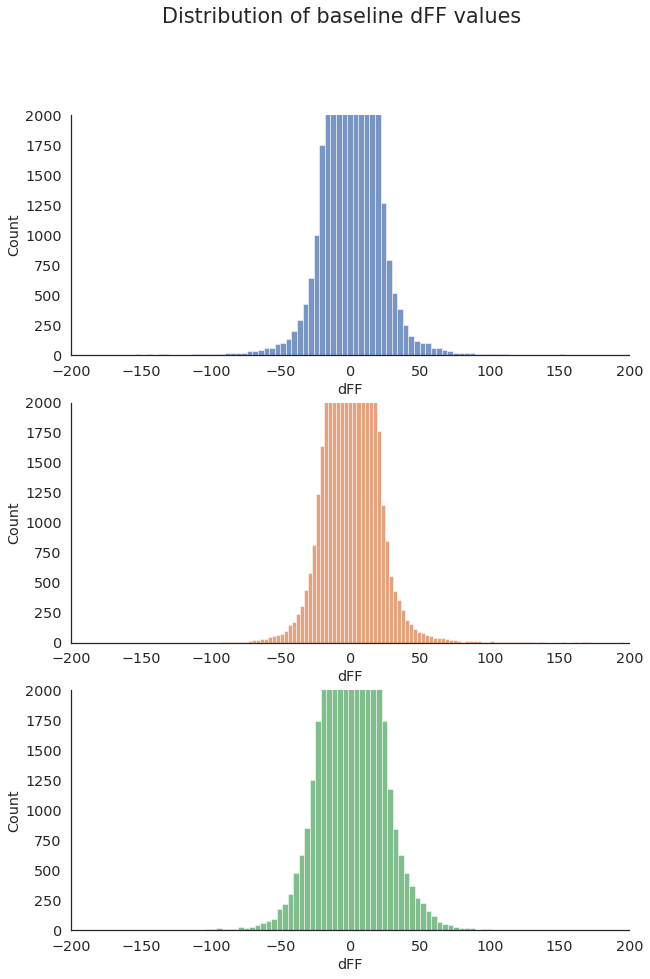

In [13]:
# aim: baselines should be close to 0, if baseline dFF values are >2 or so, it implies a very noisy ROI

baseline_df = cell_trial_single_timepoint_df.query('timepoint < 0')

trials = ['pr', 'ps', 'spont']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

for trial, color, ax in zip(trials, ['C0', 'C1', 'C2'], axes):
    sns.histplot(data=baseline_df, x=trial + '_resp', color=color, ax=ax, bins=100)
    ax.set_ylim([0,2000]);
    ax.set_xlim([-200,200])
    ax.set_xlabel('dFF')
    
plt.suptitle('Distribution of baseline dFF values', fontsize='xx-large');

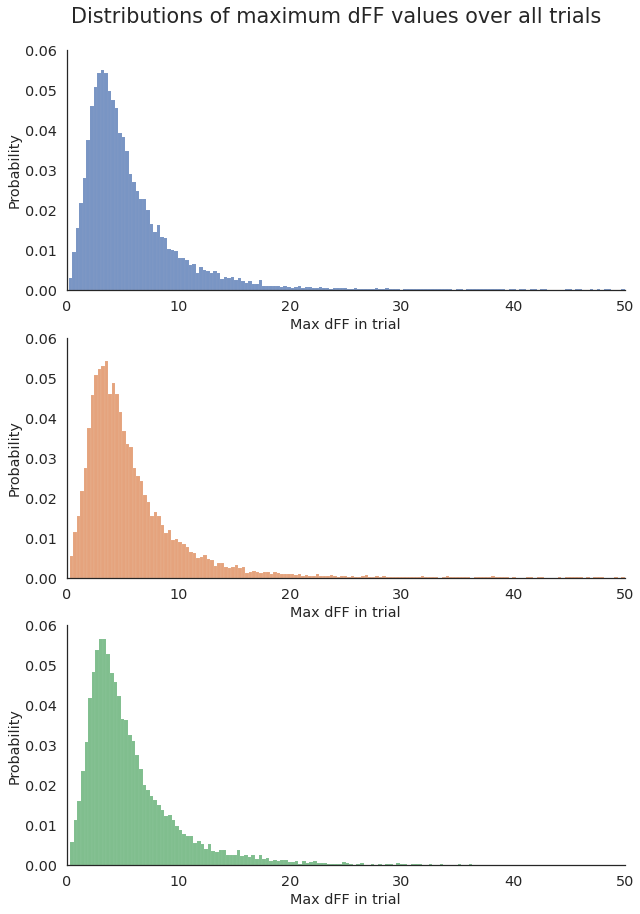

In [70]:
#distribution of max dFF values for all cells

# max_df = cell_trial_single_timepoint_df.groupby('cell_id').max()

trials = ['pr', 'ps', 'spont']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

for trial, color, ax in zip(trials, ['C0', 'C1', 'C2'], axes):
    sns.histplot(data=max_df, x=trial + '_resp', color=color, ax=ax, stat='probability')

    ax.set_ylim([0, 0.06]);
    ax.set_xlim([0, 50]);
    ax.set_xlabel('Max dFF in trial');

plt.suptitle('Distributions of maximum dFF values over all trials', y=0.92, fontsize='xx-large');

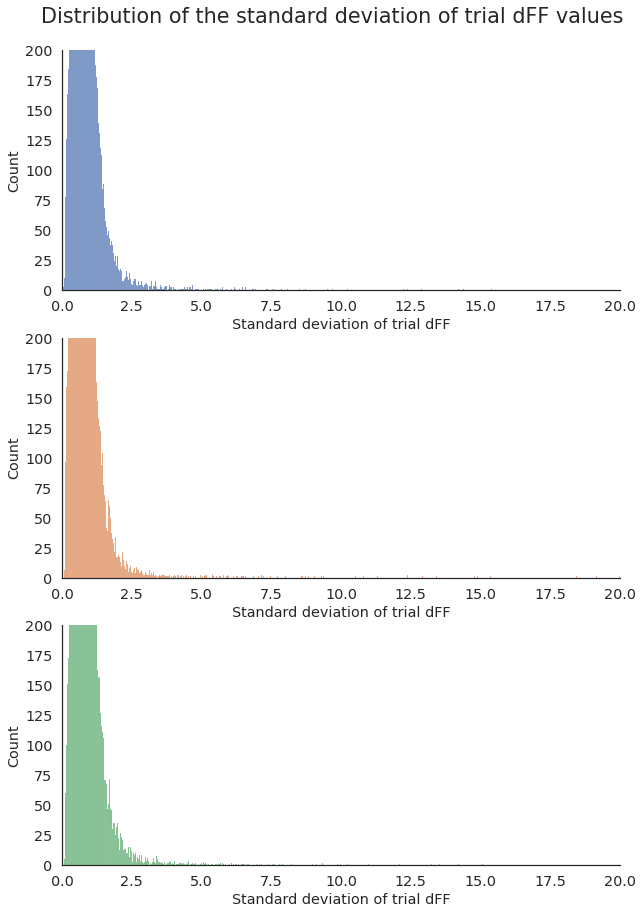

In [7]:
#distribution of std of dFF values for all cells

# std_df = cell_trial_single_timepoint_df.groupby('cell_id').std()

trials = ['pr', 'ps', 'spont']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

for trial, color, ax in zip(trials, ['C0', 'C1', 'C2'], axes):
    sns.histplot(data=std_df, x=trial + '_resp', color=color, ax=ax)

    ax.set_ylim([0, 200]);
    ax.set_xlim([0, 20]);
    ax.set_xlabel('Standard deviation of trial dFF')

plt.suptitle('Distribution of the standard deviation of trial dFF values', y=0.92, fontsize='xx-large');

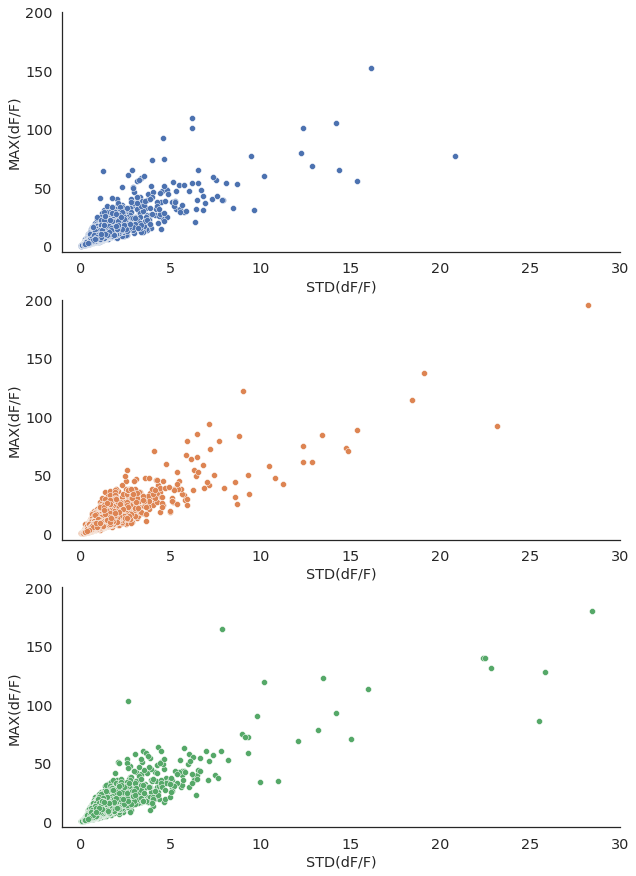

In [29]:
# max dff vs std within cell differences also (across all cell types?) 

trials = ['pr', 'ps', 'spont']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

for trial, color, ax in zip(trials, ['C0', 'C1', 'C2'], axes):
    sns.scatterplot(x=std_df[trial + '_resp'], y=max_df[trial + '_resp'], ax=ax, color=color)
    ax.set_xlabel('STD(dF/F)')
    ax.set_ylabel('MAX(dF/F)')
    ax.set_ylim([-5, 200])
    ax.set_xlim([-1, 30])

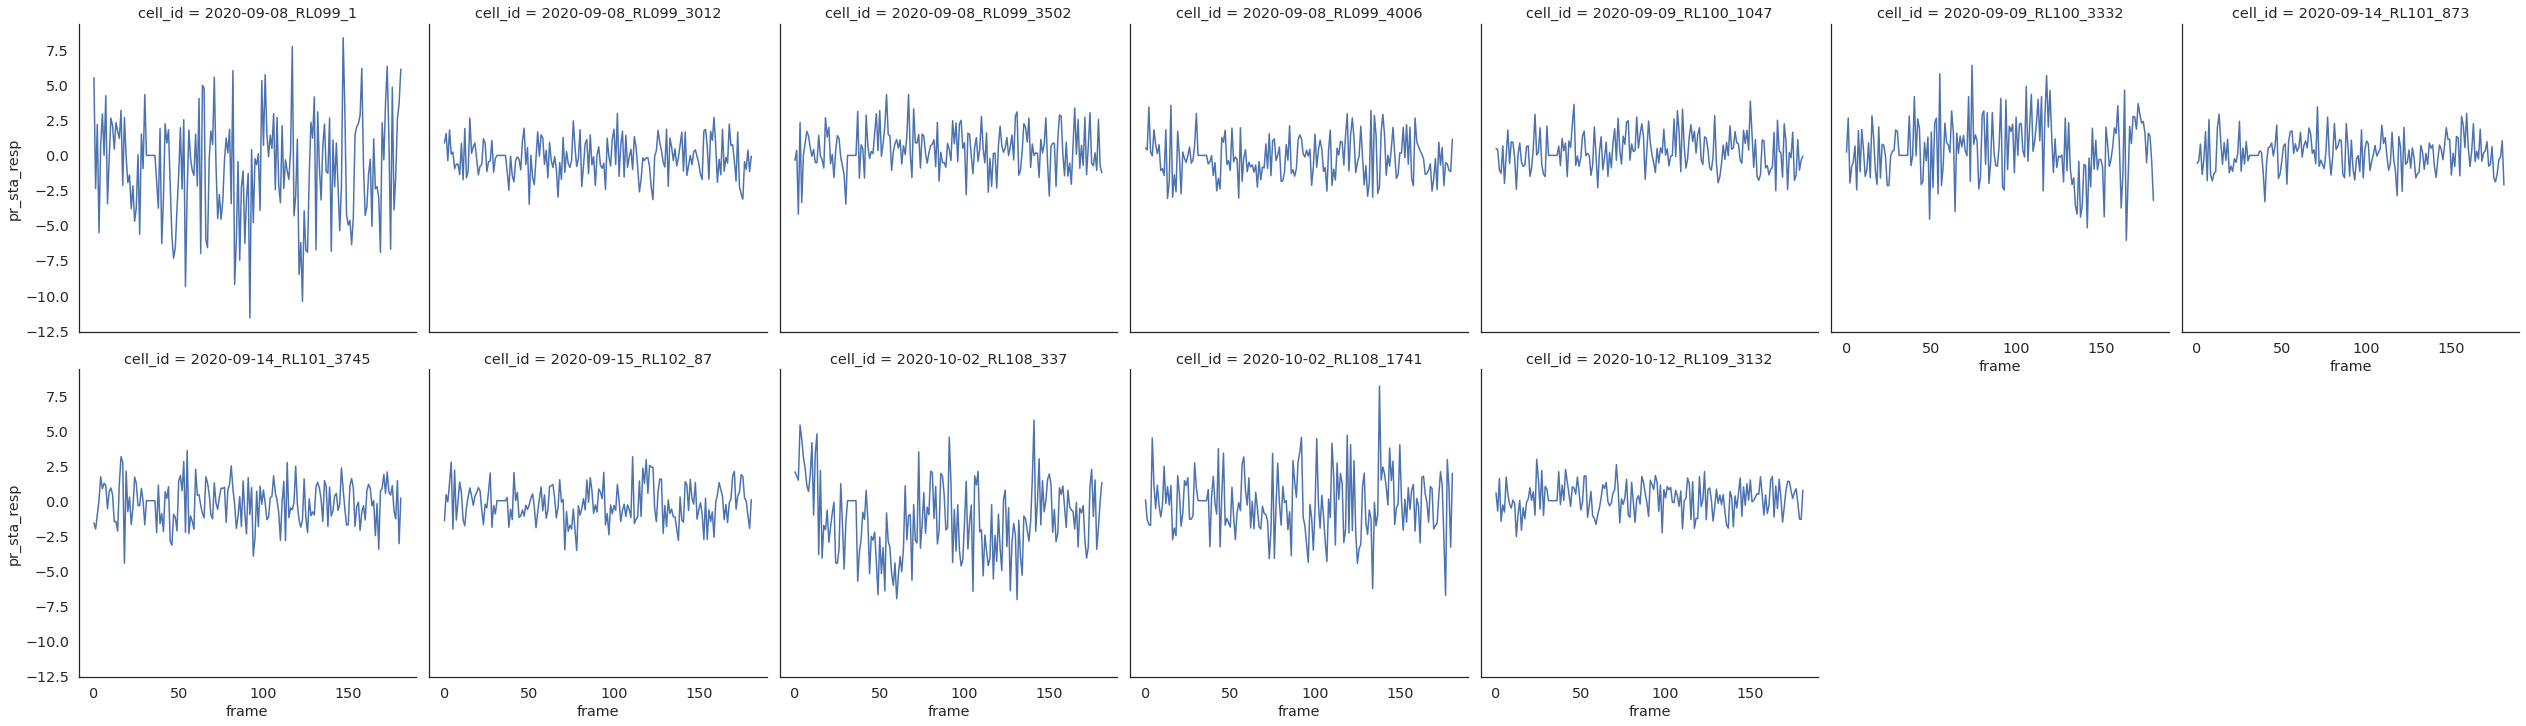

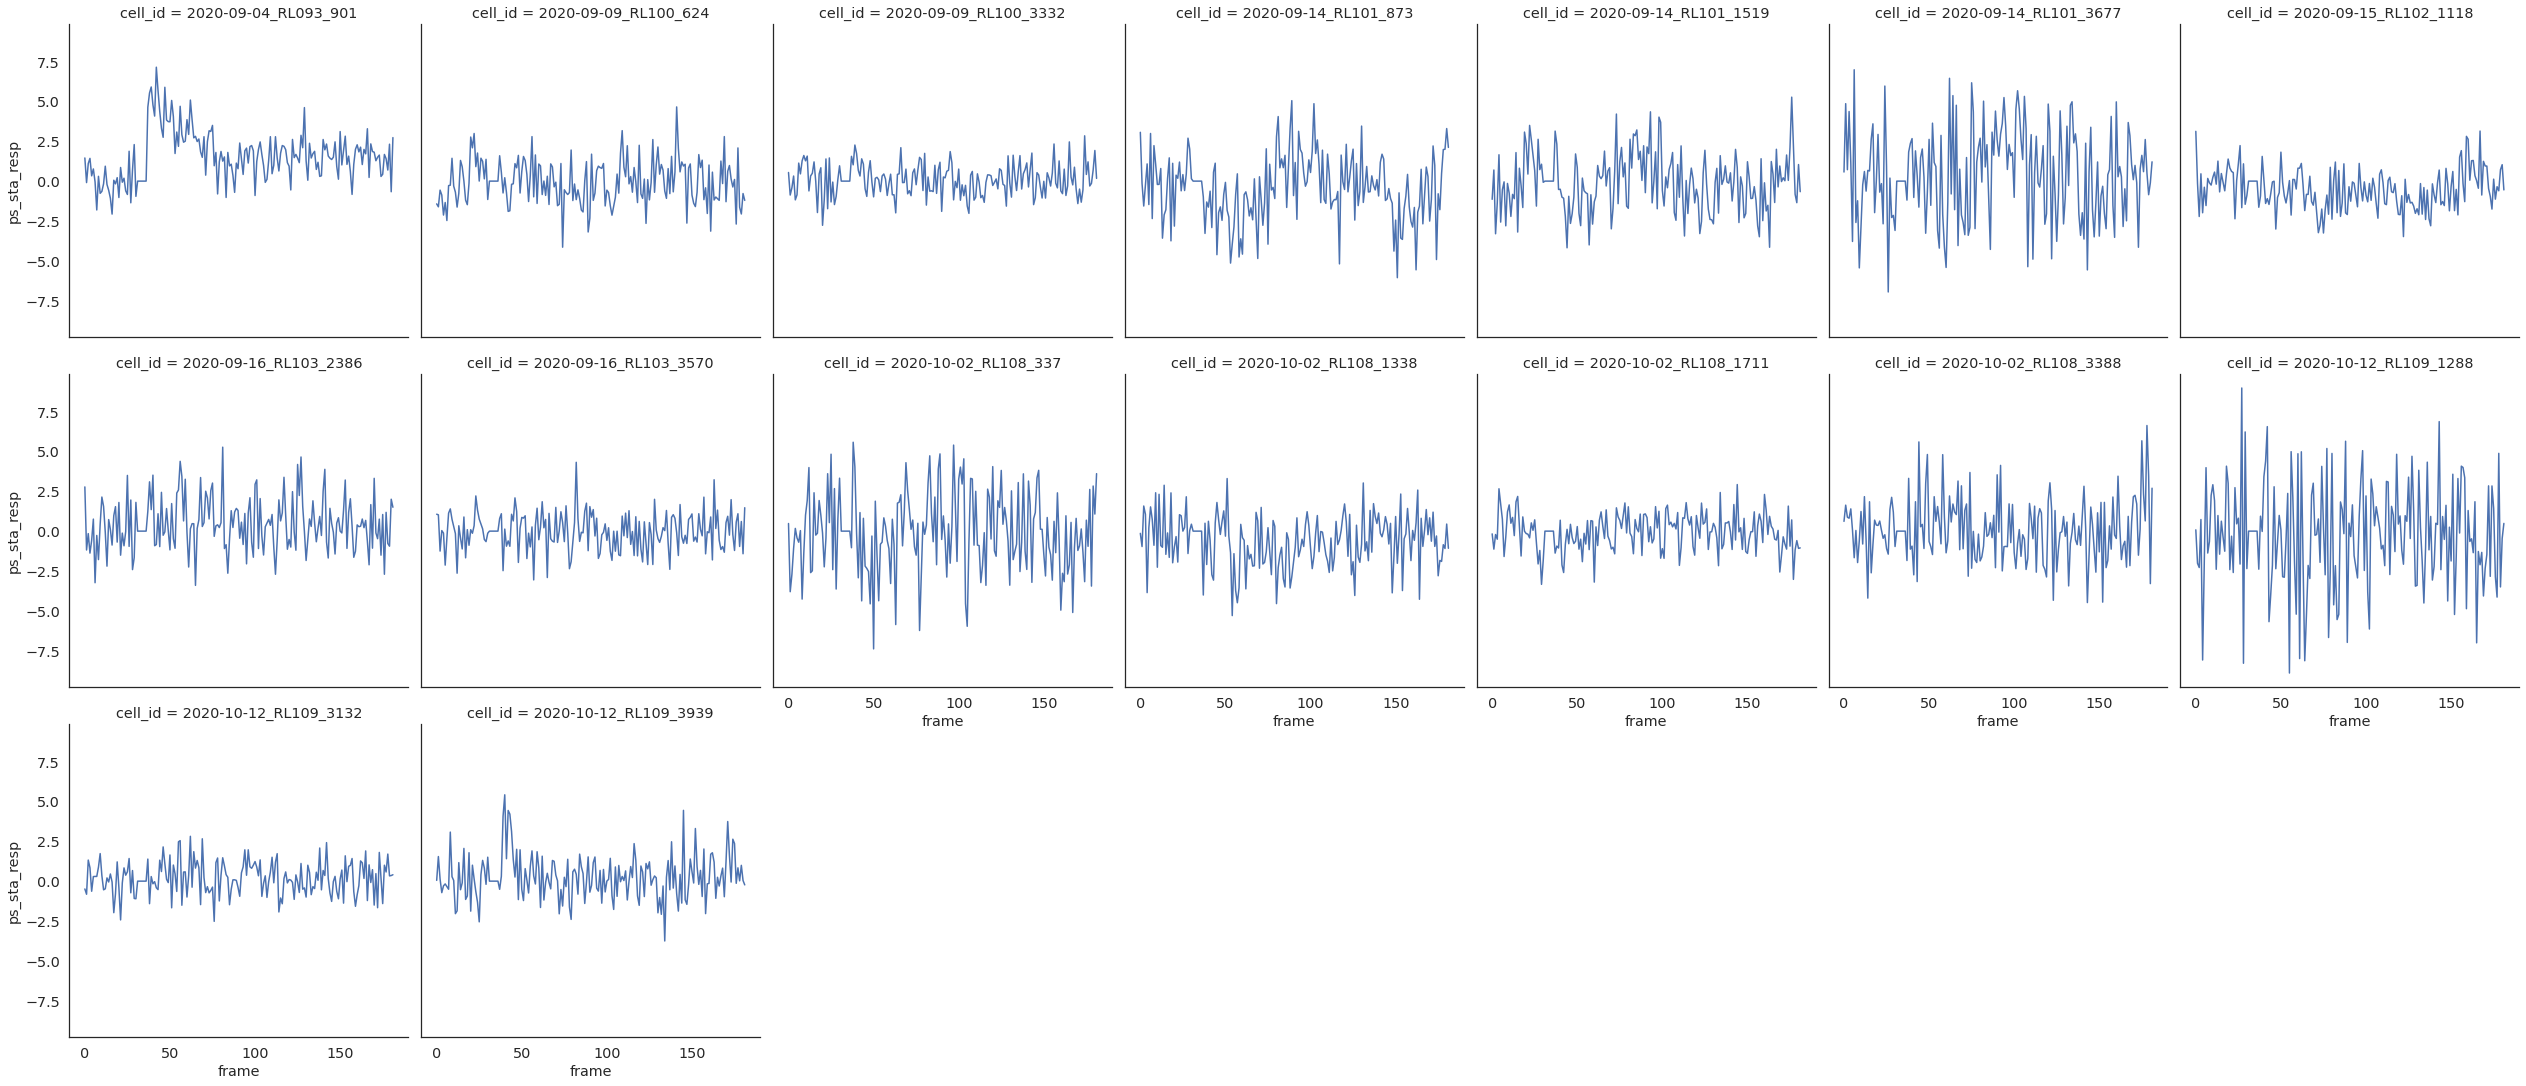

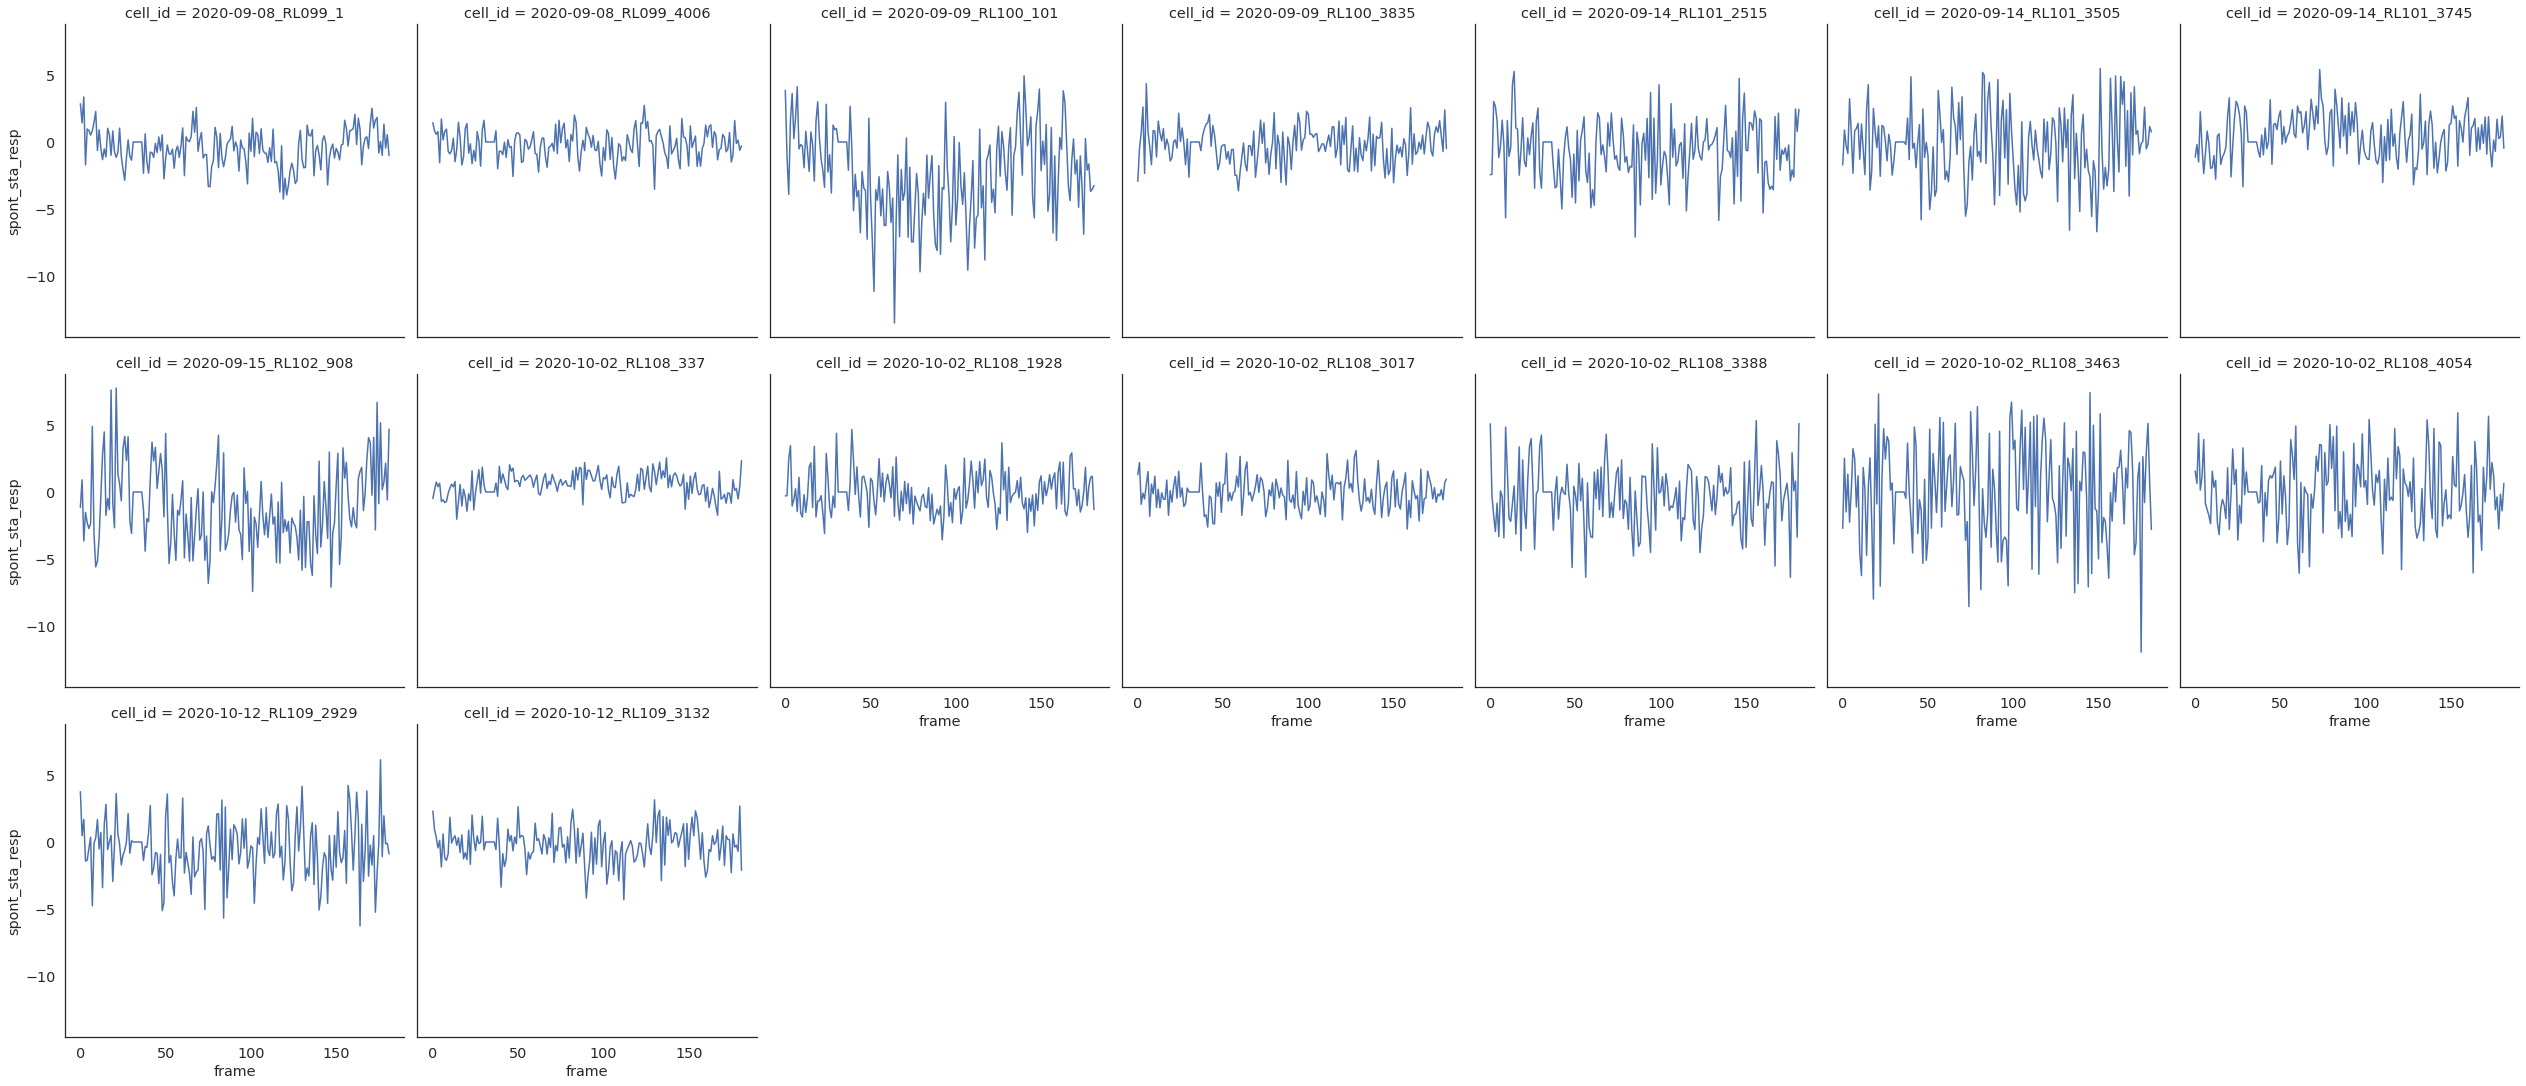

In [18]:
for trial in trials:
    
    extreme_std_df = std_df.query(trial + '_resp > 10')
    extreme_cell_ids = extreme_std_df.index

    df_filter = cell_mean_timepoint_df['cell_id'].isin(extreme_cell_ids)
    filtered_df = cell_mean_timepoint_df[df_filter]

    sns.relplot(kind='line', data=filtered_df, x='frame', y=trial + '_sta_resp', col='cell_id', col_wrap=7);

# Calculate significant cells based on difference between photostim and sham amplitudes of response (rather than pre/post comparison) INCOMPLETE

In [ ]:
# different from looking at average responsivity using pre vs. post distributions: 
# look at stats test between absolute amplitude of response on spont vs. photostim trials,
# find cells with p-value < 0.05 (one-tailed) and investigate how many, s1/s2 split. 
# Make sure to switch it around and check for any spont more than photostim

cell_trial_df = pd.read_pickle(cell_trial_df_path)
cell_df = pd.read_pickle(cell_df_path)

pr_amps = cell_trial_df['pr_amp_resp'].to_numpy().reshape(-1, 100)
spont_amps = cell_trial_df['spont_amp_resp'].to_numpy().reshape(-1, 100)

p_values = []

for pr_amp, spont_amp in zip(pr_amps, spont_amps):
    p_values.append(stats.wilcoxon(pr_amp, spont_amp, alternative='greater')[1])

In [ ]:
sig_cells = np.array(p_values) < 0.05

sig_df = cell_trial_df[np.repeat(sig_cells, 100)]
sig_cell_ids = sig_df['cell_id'].unique()

sig_cell_filter = cell_df.reset_index(drop=False)['cell_id'].isin(sig_cell_ids)
cell_df.reset_index(drop=False)[sig_cell_filter]

# Find peak in responses post-stim

In [4]:
# Look in mean timepoint df
# For each cell find max dFF within a range (timepoint 0 - 5 seconds)

cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)
cell_mean_timepoint_df.reset_index(inplace=True) # there were duplicate indices in the dataframe, needed to reset

cell_df = pd.read_pickle(cell_df_path)

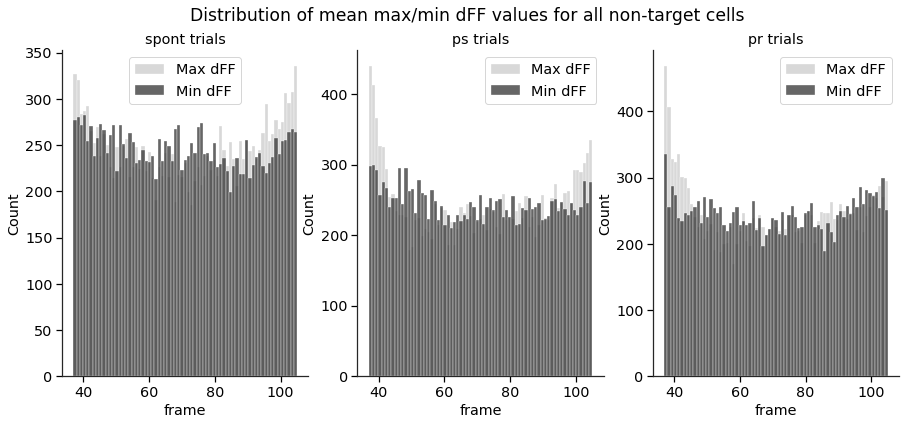

In [21]:
trial_types = ['spont', 'ps', 'pr']
targets = ['pr', 'ps', 'pr']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6))

for trial, target, ax in zip(trial_types, targets, axes):
    
    nontarget_cell_ids = cell_df[~cell_df[target + '_target']].index
    nt_filter = cell_mean_timepoint_df['cell_id'].isin(nontarget_cell_ids)
    nt_cell_mean_timepoint_df = cell_mean_timepoint_df[nt_filter]

    post_stim_df = nt_cell_mean_timepoint_df.query('(frame > 36) & (frame <= 105)')
    post_stim_max = post_stim_df.groupby('cell_id').idxmax()
    post_stim_min = post_stim_df.groupby('cell_id').idxmin()

    max_dff_frame = nt_cell_mean_timepoint_df.loc[post_stim_max[trial + '_sta_resp'].values]['frame']
    min_dff_frame = nt_cell_mean_timepoint_df.loc[post_stim_min[trial + '_sta_resp'].values]['frame']

    sns.histplot(max_dff_frame, color='0.8', bins=69, ax=ax)
    sns.histplot(min_dff_frame, color='0.2', bins=69, ax=ax)

    ax.legend(['Max dFF', 'Min dFF']);
    ax.set_title(trial + ' trials')
    
plt.suptitle('Distribution of mean max/min dFF values for all non-target cells', fontsize='x-large');

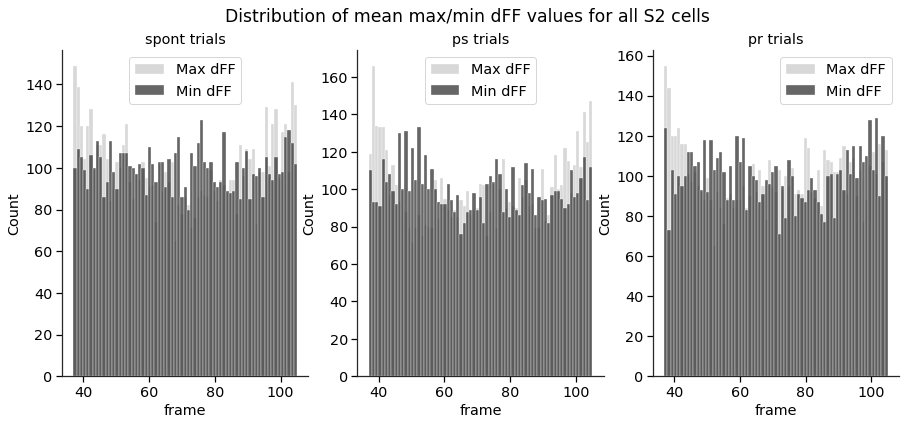

In [22]:
s2_cell_ids = cell_df[cell_df['s2_cell']].index
s2_filter = cell_mean_timepoint_df['cell_id'].isin(s2_cell_ids)
s2_cell_mean_timepoint_df = cell_mean_timepoint_df[s2_filter]

post_stim_df = s2_cell_mean_timepoint_df.query('(frame > 36) & (frame <= 105)')
post_stim_max = post_stim_df.groupby('cell_id').idxmax()
post_stim_min = post_stim_df.groupby('cell_id').idxmin()

trial_types = ['spont', 'ps', 'pr']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6))

for trial, ax in zip(trial_types, axes):
    max_dff_frame = s2_cell_mean_timepoint_df.loc[post_stim_max[trial + '_sta_resp'].values]['frame']
    min_dff_frame = s2_cell_mean_timepoint_df.loc[post_stim_min[trial + '_sta_resp'].values]['frame']

    sns.histplot(max_dff_frame, color='0.8', bins=69, ax=ax)
    sns.histplot(min_dff_frame, color='0.2', bins=69, ax=ax)

    ax.legend(['Max dFF', 'Min dFF']);
    ax.set_title(trial + ' trials')

plt.suptitle('Distribution of mean max/min dFF values for all S2 cells', fontsize='x-large');

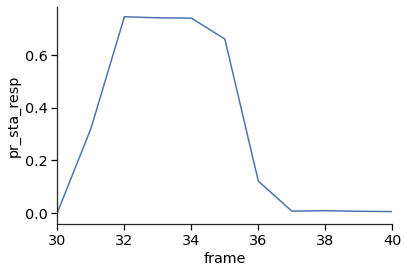

In [103]:
sns.lineplot(data=cell_mean_timepoint_df, x='frame', y='pr_sta_resp', estimator='mean', ci=None)
plt.xlim([30, 40]);

# Mean trial traces (lineplot)

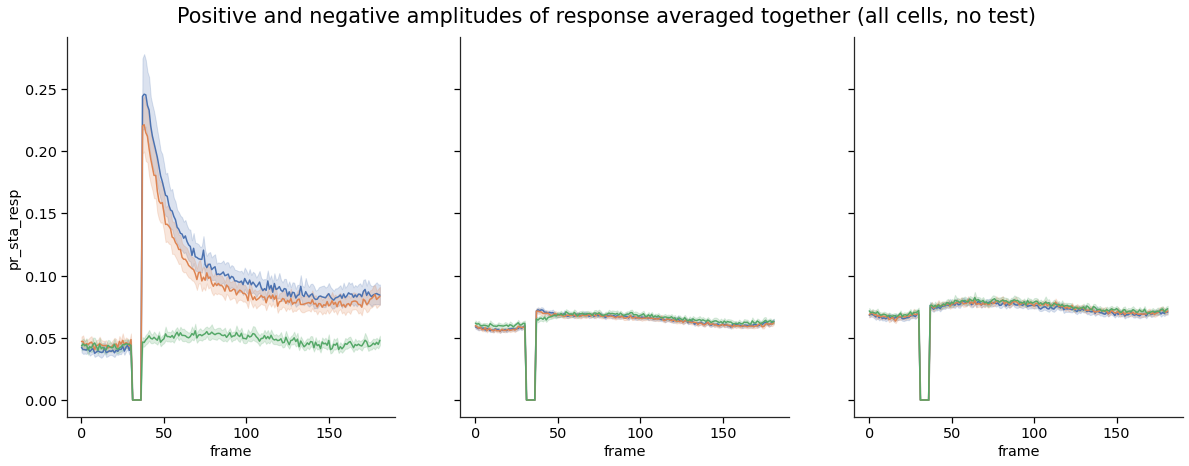

In [5]:
# ABSOLUTE ACTIVITY AVERAGE (i.e. positive + negative amplitudes averaged together)

cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

trial_type = ['random', 'sensory', 'sham']
target_type = ['pr_target', 'ps_target', 'pr_target']
responses = ['pr_sta_resp', 'ps_sta_resp', 'spont_sta_resp']

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=True, figsize=(20,7))

for trial, target, response in zip(trial_type, target_type, responses):

    # filter dataframes using variables above
    s1_targets = cell_df[cell_df[target] & cell_df['s1_cell']].index
    s1_nontargets = cell_df[~cell_df[target] & cell_df['s1_cell']].index
    s2_nontargets = cell_df[~cell_df[target] & cell_df['s2_cell']].index
    
    # populate the plots with filtered data
    for col, cell_id_list in enumerate([s1_targets, s1_nontargets, s2_nontargets]):
        df_filter = cell_mean_timepoint_df['cell_id'].isin(cell_id_list)
        filtered_df = cell_mean_timepoint_df[df_filter]

        ax = axes[col]
        sns.lineplot(x=filtered_df['frame'], y=np.absolute(filtered_df[response]), estimator='mean', ci=95, data=filtered_df, ax=ax, 
                     label=trial, legend=False)

        display(fig)
        clear_output(wait = True)

# define plot titles, axes etc.
plt.suptitle('Positive and negative amplitudes of response averaged together (all cells, no test)', 
             y=0.94, fontsize='xx-large');

sign = ['positive-responder', 'negative-responder']
photostim_id = ['s1 target', 's1 non-target', 's2 non-target']

# for row_i, row in enumerate(axes):
#     for col_i, col in enumerate(row):
#         if row_i == 1: 
#             col.set_xlabel('timepoint (frames)')
#             col.legend()
#         if col_i == 0: col.set_ylabel('response (dFF)')
#         col.set_title(sign[row_i] + '\n' + photostim_id[col_i])
#         col.hlines(0, -50, 190, linestyles='dotted', zorder=4, alpha=0.5);
# #         col.set_ylim([-0.5, 0.5])
#         col.set_xlim([0, 182])

# save_path = os.path.join(qnap_path, session_type + '_DffTrace_TrialMean_lineplot_row_ResponseType_col_TargetID')
# ia.savePlot(save_path)

KeyError: 'frame'

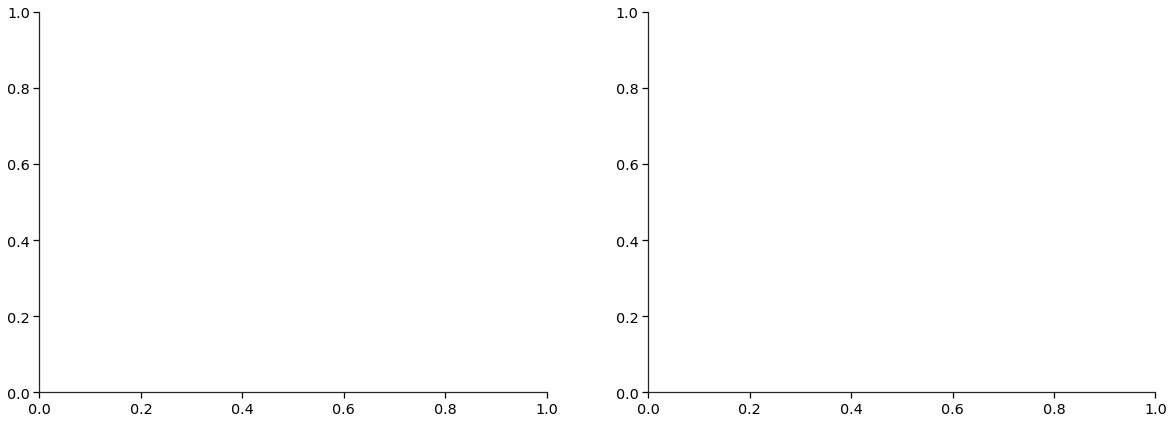

In [166]:
# GRAND AVERAGE OF ALL CELLS (POSITIVE AND NEGATIVE)

cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

trial_type = ['random', 'sensory', 'sham']
target_type = ['pr_target', 'ps_target', 'pr_target']
responses = ['pr_sta_resp', 'ps_sta_resp', 'spont_sta_resp']

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20,7))

for trial, target, response in zip(trial_type, target_type, responses):

    # filter dataframes using variables above
    s1_targets = cell_df[cell_df[target] & cell_df['s1_cell']].index
#     s1_nontargets = cell_df[~cell_df[target] & cell_df['s1_cell']].index
    s2_nontargets = cell_df[~cell_df[target] & cell_df['s2_cell']].index
    
    # populate the plots with filtered data
    for col, cell_id_list in enumerate([s1_targets, 
#                                         s1_nontargets,
                                        s2_nontargets]):
        df_filter = cell_mean_timepoint_df['cell_id'].isin(cell_id_list)
        filtered_df = cell_mean_timepoint_df[df_filter]

        ax = axes[col]
        sns.lineplot(x=filtered_df['frame']*0.06565, y=filtered_df[response], estimator='mean', ci=95, data=filtered_df, ax=ax, 
                     label=trial, legend=False)

        display(fig)
        clear_output(wait = True)

# define plot titles, axes etc.
plt.suptitle('S1 target and S2 non-target responses on photostim and sham trials (grand average)', 
             y=0.94, fontsize='xx-large');

for ax in axes:
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('')

axes[0].set_ylim([-0.05, 0.25])
axes[1].set_ylim([-0.02, 0.02])
    
axes[0].set_ylabel('Response (dF/F)');
axes[0].legend(['random', 'sensory', 'sham'], loc='upper right');

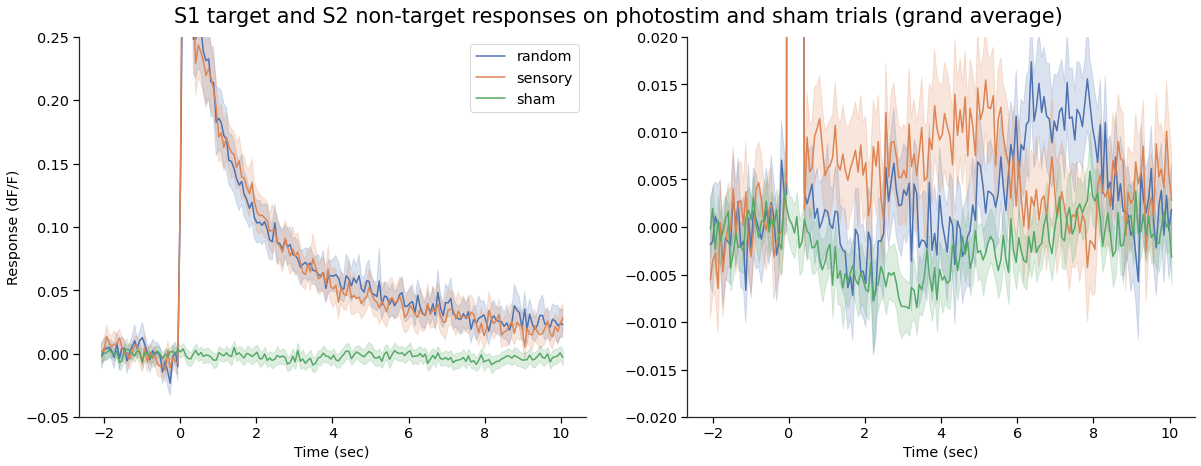

In [50]:
# GRAND AVERAGE OF ALL CELLS (POSITIVE AND NEGATIVE)

cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

trial_type = ['random', 'sensory', 'sham']
target_type = ['pr_target', 'ps_target', 'pr_target']
responses = ['pr_sta_resp', 'ps_sta_resp', 'spont_sta_resp']

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20,7))

for trial, target, response in zip(trial_type, target_type, responses):

    # filter dataframes using variables above
    s1_targets = cell_df[cell_df[target] & cell_df['s1_cell']].index
#     s1_nontargets = cell_df[~cell_df[target] & cell_df['s1_cell']].index
    s2_nontargets = cell_df[~cell_df[target] & cell_df['s2_cell']].index
    
    # populate the plots with filtered data
    for col, cell_id_list in enumerate([s1_targets, 
#                                         s1_nontargets,
                                        s2_nontargets]):
        df_filter = cell_mean_timepoint_df['cell_id'].isin(cell_id_list)
        filtered_df = cell_mean_timepoint_df[df_filter]

        ax = axes[col]
        sns.lineplot(x=filtered_df['timepoint'], y=filtered_df[response], estimator='mean', ci=95, data=filtered_df, ax=ax, 
                     label=trial, legend=False)

        display(fig)
        clear_output(wait = True)

# define plot titles, axes etc.
plt.suptitle('S1 target and S2 non-target responses on photostim and sham trials (grand average)', 
             y=0.94, fontsize='xx-large');

for ax in axes:
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('')

axes[0].set_ylim([-0.05, 0.25])
axes[1].set_ylim([-0.02, 0.02])
    
axes[0].set_ylabel('Response (dF/F)');
axes[0].legend(['random', 'sensory', 'sham'], loc='upper right');

pr, spont WilcoxonResult(statistic=11177848.0, pvalue=1.362209981673768e-05)
ps, spont WilcoxonResult(statistic=11076518.5, pvalue=6.95950355310196e-07)
pr, ps WilcoxonResult(statistic=11438112.5, pvalue=0.005497452886350013)


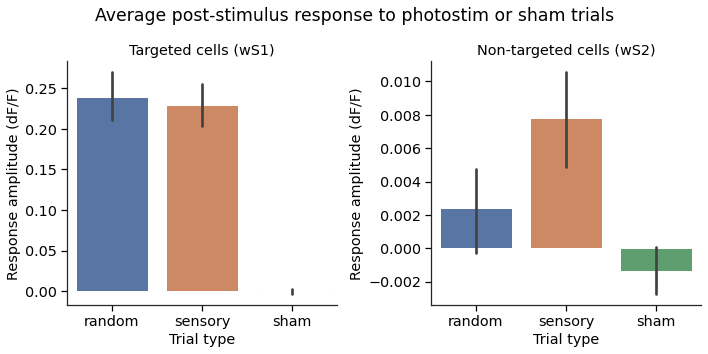

In [65]:
# GRAND AVERAGE OF ALL CELLS (POSITIVE AND NEGATIVE)

cell_df = pd.read_pickle(cell_df_path)

trial_type = ['pr', 'ps', 'spont']
trial_cats = ['random', 'sensory', 'sham']
target_type = ['pr_target', 'ps_target', 'pr_target']

df = pd.DataFrame()

for trial, target, trial_cat in zip(trial_type, target_type, trial_cats):

    # filter dataframes using variables above
    s1_targets = cell_df[cell_df[target] & cell_df['s1_cell']].index
#     s1_nontargets = cell_df[~cell_df[target] & cell_df['s1_cell']].index
    s2_nontargets = cell_df[~cell_df[target] & cell_df['s2_cell']].index
    
    # populate the plots with filtered data
    for i, cell_id_list in enumerate([s1_targets, 
#                                         s1_nontargets,
                                      s2_nontargets]):
        
        filtered_df = cell_df.loc[cell_id_list,:]
        
        if i == 0: target_type = np.repeat(True, len(filtered_df))
        else: target_type = np.repeat(False, len(filtered_df))
            
        temp_df = pd.DataFrame({
            'trial' : np.repeat(trial_cat, len(filtered_df)),
            'target' : target_type,
            'response_amplitude' : filtered_df[trial + '_sta_amp_resp']
        })
        
        df = pd.concat([df, temp_df])

pr = df[(df['trial']=='random') & (df['target']==False)]['response_amplitude'].to_numpy()
ps = df[(df['trial']=='sensory') & (df['target']==False)]['response_amplitude'].to_numpy()
spont = df[(df['trial']=='sham') & (df['target']==False)]['response_amplitude'].to_numpy()

print('pr, spont', stats.wilcoxon(pr, spont))
print('ps, spont', stats.wilcoxon(ps, spont))
print('pr, ps', stats.wilcoxon(pr, ps))
        
g = sns.catplot(kind='bar', col='target', col_order=[True, False], x='trial', data=df, y='response_amplitude', sharey=False)

axes = g.axes[0]

axes[0].set_title('Targeted cells (wS1)')
axes[1].set_title('Non-targeted cells (wS2)')

for ax in axes:
    ax.set_ylabel('Response amplitude (dF/F)')
    ax.set_xlabel('Trial type');
    
plt.suptitle('Average post-stimulus response to photostim or sham trials', y=0.98, fontsize='x-large')
plt.tight_layout()

Text(0, 0.5, '# of shuffles')

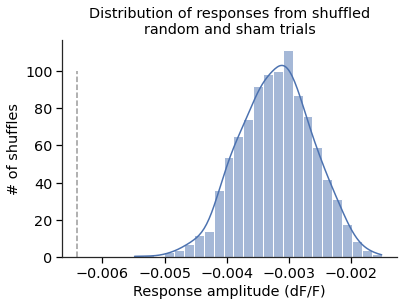

In [94]:
trial_filter = ((df.trial == 'pr') | (df.trial == 'spont')) & (df.target == False)

mean_response = []

for i in range(0,1000):
    rand_sample = df[trial_filter].sample(n=6937, replace=False)
    
    mean_response.append(rand_sample.mean()['response_amplitude'])
    
sns.histplot(mean_response, kde=True)

trial_filter = (df.trial == 'ps') & (df.target == False)

plt.vlines(df[trial_filter].mean()['response_amplitude'], 0, 100, color='0.6', linestyle='--')

plt.title('Distribution of responses from shuffled\nrandom and sham trials')
plt.xlabel('Response amplitude (dF/F)')
plt.ylabel('# of shuffles');

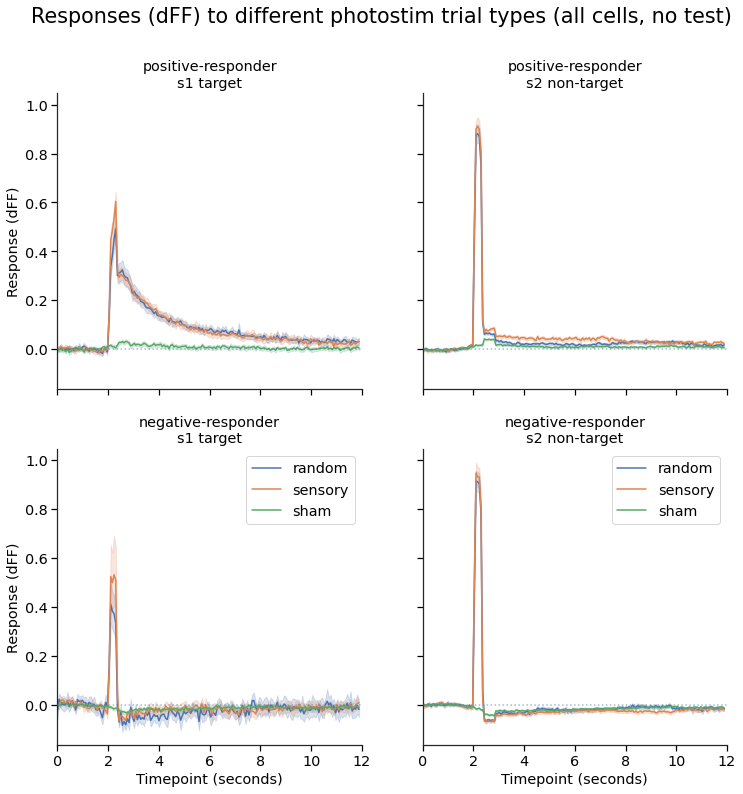

In [82]:
# AVERAGE SPLIT POSITIVE AND NEGATIVE (based on 500 ms pre and post stim, so end up with blips)

cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

trial_type = ['random', 'sensory', 'sham']
target_type = ['pr_target', 'ps_target', 'pr_target']
resp_sign = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_resp', 'ps_sta_resp', 'spont_sta_resp']

fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True, figsize=(12,12))

for trial, target, sign, response in zip(trial_type, target_type, resp_sign, responses):

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].index
    s1_nontargets_pos = cell_df[~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].index
    s2_nontargets_pos = cell_df[~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].index

    s1_targets_neg = cell_df[cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].index
    s1_nontargets_neg = cell_df[~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].index
    s2_nontargets_neg = cell_df[~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].index
    
    # populate the plots with filtered data
    for row, cell_id_lists in enumerate([[s1_targets_pos, s2_nontargets_pos],
                                         [s1_targets_neg, s2_nontargets_neg]                              
                                        ]):
        for col, cell_id_list in enumerate(cell_id_lists):
            
            df_filter = cell_mean_timepoint_df['cell_id'].isin(cell_id_list)
            filtered_df = cell_mean_timepoint_df[df_filter]
            
            ax = axes[row,col]
            sns.lineplot(x=filtered_df['frame']*0.06565, y=response, estimator='mean', ci=95, data=filtered_df, ax=ax, 
                         label=trial, legend=False)
            
            display(fig)
            clear_output(wait = True)

# define plot titles, axes etc.
plt.suptitle('Responses (dFF) to different photostim trial types (all cells, no test)', 
             y=0.98, fontsize='xx-large');

sign = ['positive-responder', 'negative-responder']
photostim_id = ['s1 target', 's2 non-target']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        if row_i == 1: 
            col.set_xlabel('Timepoint (seconds)')
            col.legend()
        if col_i == 0: col.set_ylabel('Response (dFF)')
        col.set_title(sign[row_i] + '\n' + photostim_id[col_i])
        col.hlines(0, -50, 190, linestyles='dotted', zorder=4, alpha=0.5);
#         col.set_ylim([-0.5, 0.5])
        col.set_xlim([0, 12])

save_path = os.path.join(qnap_path, session_type + '_DffTrace_TrialMean_lineplot_row_ResponseType_col_TargetID')
# ia.savePlot(save_path)

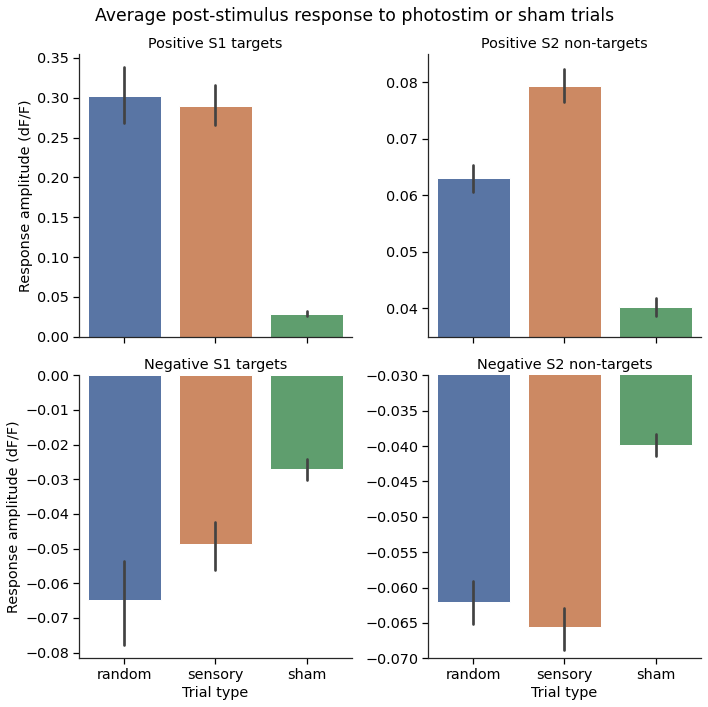

In [87]:
# GRAND AVERAGE OF ALL CELLS (POSITIVE AND NEGATIVE)

cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

trial_type = ['pr', 'ps', 'spont']
trial_cats = ['random', 'sensory', 'sham']
resp_sign = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
target_type = ['pr_target', 'ps_target', 'pr_target']

df = pd.DataFrame()

for trial, target, trial_cat, sign in zip(trial_type, target_type, trial_cats, resp_sign):

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].index
    s2_nontargets_pos = cell_df[~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].index

    s1_targets_neg = cell_df[cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].index
    s2_nontargets_neg = cell_df[~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].index
    
    # populate the plots with filtered data
    for cell_id_lists in [[s1_targets_pos, s2_nontargets_pos],
                          [s1_targets_neg, s2_nontargets_neg]
                         ]:
        for i, cell_id_list in enumerate(cell_id_lists):
            
            filtered_df = cell_df.loc[cell_id_list,:]

            if i == 0: target_type = np.repeat(True, len(filtered_df))
            else: target_type = np.repeat(False, len(filtered_df))

            temp_df = pd.DataFrame({
                'trial' : np.repeat(trial_cat, len(filtered_df)),
                'target' : target_type,
                'response_amplitude' : filtered_df[trial + '_sta_amp_resp'],
                'sign' : filtered_df[sign]
            })

            df = pd.concat([df, temp_df])

g = sns.catplot(kind='bar', col='target', col_order=[True, False], row='sign', row_order=[True, False], x='trial', data=df, y='response_amplitude', sharey=False)

axes = g.axes

axes[0,0].set_title('Positive S1 targets')
axes[0,1].set_title('Positive S2 non-targets')
axes[1,0].set_title('Negative S1 targets')
axes[1,1].set_title('Negative S2 non-targets')

axes[0,0].set_ylabel('Response amplitude (dF/F)')
axes[1,0].set_ylabel('Response amplitude (dF/F)')
axes[1,1].set_xlabel('Trial type');
axes[1,0].set_xlabel('Trial type');

axes[0,1].set_ylim([0.035, 0.085])
axes[1,1].set_ylim([-0.07, -0.03])

plt.suptitle('Average post-stimulus response to photostim or sham trials', y=0.98, fontsize='x-large')
plt.tight_layout()

In [ ]:
# GRAND AVERAGE FOR CELLS PASSING STATISTICAL TEST

cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

test_type = 'nomulti'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
trial_type = ['random', 'sensory', 'sham']
target_type = ['pr_target', 'ps_target', 'pr_target']
responses = ['pr_sta_resp', 'ps_sta_resp', 'spont_sta_resp']

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20,7))

for test, trial, target, response in zip(stat_test, trial_type, target_type, responses):

    # filter dataframes using variables above
    s1_targets = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell']].index
    s1_nontargets = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].index
    s2_nontargets = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].index
    
    # populate the plots with filtered data
    for col, cell_id_list in enumerate([s1_targets, s1_nontargets, s2_nontargets]):
        df_filter = cell_mean_timepoint_df['cell_id'].isin(cell_id_list)
        filtered_df = cell_mean_timepoint_df[df_filter]

        ax = axes[col]
        sns.lineplot(x=filtered_df['frame'], y=filtered_df[response], estimator='mean', ci=95, data=filtered_df, ax=ax, 
                     label=trial, legend=False)

        display(fig)
        clear_output(wait = True)

# define plot titles, axes etc.
plt.suptitle('S1 target and S2 non-target responses on photostim and sham trials (wilcoxon test, no correction)', 
             y=0.94, fontsize='xx-large');

sign = ['positive-responder', 'negative-responder']
photostim_id = ['s1 target', 's1 non-target', 's2 non-target']

# for row_i, row in enumerate(axes):
#     for col_i, col in enumerate(row):
#         if row_i == 1: 
#             col.set_xlabel('timepoint (frames)')
#             col.legend()
#         if col_i == 0: col.set_ylabel('response (dFF)')
#         col.set_title(sign[row_i] + '\n' + photostim_id[col_i])
#         col.hlines(0, -50, 190, linestyles='dotted', zorder=4, alpha=0.5);
# #         col.set_ylim([-0.5, 0.5])
#         col.set_xlim([0, 182])

# save_path = os.path.join(qnap_path, session_type + '_DffTrace_TrialMean_lineplot_row_ResponseType_col_TargetID')
# ia.savePlot(save_path)

In [ ]:
cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

# list of column names to be used to filter the dataframe
test_type = 'nomulti'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
trial_type = ['random', 'sensory', 'sham']
target_type = ['pr_target', 'ps_target', 'pr_target']
resp_sign = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_resp', 'ps_sta_resp', 'spont_sta_resp']

fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True, sharex=True, figsize=(20,15))

for test, trial, target, sign, response in zip(stat_test, trial_type, target_type, resp_sign, responses):

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].index
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].index
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].index

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].index
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].index
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].index

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].index
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].index
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].index
    
    # populate the plots with filtered data
    for row, cell_id_lists in enumerate([[s1_targets_pos, s1_nontargets_pos, s2_nontargets_pos],
                                         [s1_targets_non, s1_nontargets_non, s2_nontargets_non],
                                         [s1_targets_neg, s1_nontargets_neg, s2_nontargets_neg]                              
                                        ]):
        for col, cell_id_list in enumerate(cell_id_lists):
            
            df_filter = cell_mean_timepoint_df['cell_id'].isin(cell_id_list)
            filtered_df = cell_mean_timepoint_df[df_filter]
            
            ax = axes[row,col]
            sns.lineplot(x='frame', y=response, estimator='mean', ci=95, data=filtered_df, ax=ax, 
                         label=trial, legend=False)

# define plot titles, axes etc.
plt.suptitle('Responses (dFF) to different photostim trial types (using ' + test_type + ' correction)', 
             y=0.94, fontsize='xx-large');

sign = ['positive-responder', 'non-responder', 'negative-responder']
photostim_id = ['s1 target', 's1 non-target', 's2 non-target']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        if row_i == 2: 
            col.set_xlabel('timepoint (frames)')
            col.legend()
        if col_i == 0: col.set_ylabel('response (dFF)')
        col.set_title(sign[row_i] + '\n' + photostim_id[col_i])
        col.hlines(0, -3, 11, linestyles='dotted', zorder=4, alpha=0.5);
        col.set_ylim([-0.5, 0.5])
#         col.set_xlim([-2, 10])
        col.set_xlim([0, 182])

save_path = os.path.join(qnap_path, session_type + '_DffTrace_TrialMean_' + test_type + 
                         '_lineplot_row_ResponseType_col_TargetID')
# ia.savePlot(save_path)

In [ ]:
cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

# list of column names to be used to filter the dataframe
test_type = 'fdr'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
trial_type = ['random', 'sensory', 'sham']
target_type = ['pr_target', 'ps_target', 'pr_target']
resp_sign = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_resp', 'ps_sta_resp', 'spont_sta_resp']

fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True, figsize=(12,12))

for test, trial, target, sign, response in zip(stat_test, trial_type, target_type, resp_sign, responses):

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].index
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].index
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].index

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].index
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].index
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].index

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].index
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].index
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].index
    
    # populate the plots with filtered data
    for row, cell_id_lists in enumerate([[s1_targets_pos, s2_nontargets_pos],
                                         [s1_targets_neg, s2_nontargets_neg]                              
                                        ]):
        for col, cell_id_list in enumerate(cell_id_lists):
            
            df_filter = cell_mean_timepoint_df['cell_id'].isin(cell_id_list)
            filtered_df = cell_mean_timepoint_df[df_filter]
            
            ax = axes[row,col]
            sns.lineplot(x=filtered_df['frame']*0.06565, y=response, estimator='mean', ci=95, data=filtered_df, ax=ax, 
                         label=trial, legend=False)

# define plot titles, axes etc.
plt.suptitle('Responses (dFF) to different photostim trial types (using ' + test_type + ' correction)', 
             y=0.98, fontsize='xx-large');

sign = ['positive-responder', 
#         'non-responder', 
        'negative-responder']
photostim_id = ['s1 target', 
#                 's1 non-target', 
                's2 non-target']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        if row_i == 1: 
            col.set_xlabel('Timepoint (seconds)')
            col.legend()
        if col_i == 0: col.set_ylabel('Response (dFF)')
        col.set_title(sign[row_i] + '\n' + photostim_id[col_i])
        col.hlines(0, -3, 11, linestyles='dotted', zorder=4, alpha=0.5);
        col.set_ylim([-0.5, 0.5])
#         col.set_xlim([-2, 10])
        col.set_xlim([0, 12])

save_path = os.path.join(qnap_path, session_type + '_DffTrace_TrialMean_' + test_type + 
                         '_lineplot_row_ResponseType_col_TargetID')
# ia.savePlot(save_path)

In [ ]:
cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

# list of column names to be used to filter the dataframe
test_type = 'fdr'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
trial_type = ['random', 'sensory', 'sham']
target_type = ['pr_target', 'ps_target', 'pr_target']
resp_sign = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_resp', 'ps_sta_resp', 'spont_sta_resp']
colors=['C0','C1','C2']

for test, trial, target, sign, response, color in zip(stat_test, trial_type, target_type, resp_sign, 
                                                      responses, colors):

    fig, axes = plt.subplots(nrows=3, ncols=3, sharey=True, sharex=True, figsize=(20,15))
    
    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].index
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].index
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].index

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].index
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].index
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].index

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].index
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].index
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].index
    
    # populate the plots with filtered data
    for row, cell_id_lists in enumerate([[s1_targets_pos, s1_nontargets_pos, s2_nontargets_pos],
                                         [s1_targets_non, s1_nontargets_non, s2_nontargets_non],
                                         [s1_targets_neg, s1_nontargets_neg, s2_nontargets_neg]                              
                                        ]):
        for col, cell_id_list in enumerate(cell_id_lists):
            
            df_filter = cell_mean_timepoint_df['cell_id'].isin(cell_id_list)
            filtered_df = cell_mean_timepoint_df[df_filter]
            groups = filtered_df.groupby('session_id')
            
            ax = axes[row,col]
            for group in groups:
                sns.lineplot(x='frame', y=response, estimator='mean', ci=None, data=group[1], 
                             color=color, alpha=0.2, ax=ax)
            sns.lineplot(x='frame', y=response, estimator='mean', ci=None, data=filtered_df, 
                         color=color, ax=ax)

    # define plot titles, axes etc.
    plt.suptitle('Responses (dFF) to ' + trial + ' photostim trial type (using ' + test_type + ' correction)', 
                 y=0.94, fontsize='xx-large');

    sign = ['positive-responder', 'non-responder', 'negative-responder']
    photostim_id = ['s1 target', 's1 non-target', 's2 non-target']

    for row_i, row in enumerate(axes):
        for col_i, col in enumerate(row):
            if row_i == 2: 
                col.set_xlabel('timepoint (frames)')
            if col_i == 0: col.set_ylabel('response (dFF)')
            col.set_title(sign[row_i] + '\n' + photostim_id[col_i])
            col.hlines(0, -3, 11, linestyles='dotted', zorder=4, alpha=0.5);
#             col.set_ylim([-0.5, 0.5])
#             col.set_xlim([-2, 10])
            col.set_xlim([0, 182])

    save_path = os.path.join(qnap_path, session_type + '_DffTrace_'+trial+'_TrialMean_' + 
                             test_type + '_lineplot_row_ResponseType_col_TargetID')
#     ia.savePlot(save_path)

# Number of responding cells (swarmplot)

In [ ]:
cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

# list of column names to be used to filter the dataframe
test_type = 'fdr'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
trial_type = ['random', 'sensory', 'sham']

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=3, ncols=3, sharey='row', sharex=True, figsize=(20,15))
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & 
                             cell_df[sign]].groupby('session_id').count()
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                cell_df[sign]].groupby('session_id').count()
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                cell_df[sign]].groupby('session_id').count()

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & 
                             ~cell_df[sign]].groupby('session_id').count()
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                ~cell_df[sign]].groupby('session_id').count()
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                ~cell_df[sign]].groupby('session_id').count()

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').count()
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].groupby('session_id').count()
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].groupby('session_id').count()
    
    for row, df_count in enumerate([[s1_targets_pos, s1_nontargets_pos, s2_nontargets_pos],
                                    [s1_targets_non, s1_nontargets_non, s2_nontargets_non],
                                    [s1_targets_neg, s1_nontargets_neg, s2_nontargets_neg]                              
                                   ]):
        df = pd.DataFrame({'s1\ntargets'     : df_count[0]['cell_num'],
                           's1\nnon-targets' : df_count[1]['cell_num'],
                           's2\nnon-targets' : df_count[2]['cell_num']
                          })
        sns.swarmplot(data=df, ax=axes[row, stim_id], color='k', edgecolor='k')
        color = 'C' + str(stim_id)
        sns.violinplot(data=df, ax=axes[row, stim_id], color=color, cut=0, scale='width')

row_titles = ['positive-responders (' + test_type + ')', 
              'non-responders (' + test_type + ')',
              'negative-responders (' + test_type + ')'
             ]

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        col.set_title(trial_type[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('number of cells')
        col.hlines(0, -0.5, 2.5, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Number of responding cells (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');
    
# save the figure
save_path = os.path.join(qnap_path, session_type + '_NumRespondingCells_' + test_type + 
                         '_boxswarmplot_row_ResponseType_col_TrialType_splitby_TargetID')
# ia.savePlot(save_path)

In [ ]:
cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

# list of column names to be used to filter the dataframe
test_type = 'nomulti'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
trial_type = ['random', 'sensory', 'sham']

s1_targets_pos_df = pd.DataFrame()
s1_nontargets_pos_df = pd.DataFrame()
s2_nontargets_pos_df = pd.DataFrame()

s1_targets_non_df = pd.DataFrame()
s1_nontargets_non_df = pd.DataFrame()
s2_nontargets_non_df = pd.DataFrame()

s1_targets_neg_df = pd.DataFrame()
s1_nontargets_neg_df = pd.DataFrame()
s2_nontargets_neg_df = pd.DataFrame()

for stim_id, trial in enumerate(trial_type):
        
    # define column names
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]
    
    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & 
                             cell_df[sign]].groupby('session_id').count()
    s1_targets_pos_df = pd.concat([s1_targets_pos_df, pd.DataFrame({trial : s1_targets_pos['cell_num']})])
    
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                cell_df[sign]].groupby('session_id').count()
    s1_nontargets_pos_df = pd.concat([s1_nontargets_pos_df, pd.DataFrame({trial : s1_nontargets_pos['cell_num']})])
    
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                cell_df[sign]].groupby('session_id').count()
    s2_nontargets_pos_df = pd.concat([s2_nontargets_pos_df, pd.DataFrame({trial : s2_nontargets_pos['cell_num']})])

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').count()
    s1_targets_non_df = pd.concat([s1_targets_non_df, pd.DataFrame({trial : s1_targets_non['cell_num']})])
    
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].groupby('session_id').count()
    s1_nontargets_non_df = pd.concat([s1_nontargets_non_df, pd.DataFrame({trial : s1_nontargets_non['cell_num']})])
    
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].groupby('session_id').count()
    s2_nontargets_non_df = pd.concat([s2_nontargets_non_df, pd.DataFrame({trial : s2_nontargets_non['cell_num']})])

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & 
                             ~cell_df[sign]].groupby('session_id').count()
    s1_targets_neg_df = pd.concat([s1_targets_neg_df, pd.DataFrame({trial : s1_targets_neg['cell_num']})])
    
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                ~cell_df[sign]].groupby('session_id').count()
    s1_nontargets_neg_df = pd.concat([s1_nontargets_neg_df, pd.DataFrame({trial : s1_nontargets_neg['cell_num']})])
    
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                ~cell_df[sign]].groupby('session_id').count()
    s2_nontargets_neg_df = pd.concat([s2_nontargets_neg_df, pd.DataFrame({trial : s2_nontargets_neg['cell_num']})])

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(20,15))

data_array = [[s1_targets_pos_df, s1_nontargets_pos_df, s2_nontargets_pos_df],
              [s1_targets_non_df, s1_nontargets_non_df, s2_nontargets_non_df],
              [s1_targets_neg_df, s1_nontargets_neg_df, s2_nontargets_neg_df]
             ]

row_titles = ['positive-responders (' + test_type + ')', 
              'non-responders (' + test_type + ')',
              'negative-responders (' + test_type + ')'
             ]
col_titles = ['s1 targets', 's1 non-targets', 's2 non-targets']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        ax=axes[row_i,col_i]
        sns.swarmplot(data=data_array[row_i][col_i], color='k', ax=ax, edgecolor='k')
        sns.violinplot(data=data_array[row_i][col_i], ax=ax, cut=0, scale='width')
        
        col.set_title(col_titles[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('number of cells')
        col.hlines(0, -0.5, 2.5, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Number of responding cells (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');

# save the figure
save_path = os.path.join(qnap_path, session_type + '_NumRespondingCells_' + test_type + 
                         '_boxswarmplot_row_ResponseType_col_TargetID_splitby_TrialType')
# ia.savePlot(save_path)

In [ ]:
cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

# list of column names to be used to filter the dataframe
test_type = 'nomulti'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
trial_type = ['random', 'sensory', 'sham']

s1_targets_pos_df = pd.DataFrame()
s1_nontargets_pos_df = pd.DataFrame()
s2_nontargets_pos_df = pd.DataFrame()

s1_targets_non_df = pd.DataFrame()
s1_nontargets_non_df = pd.DataFrame()
s2_nontargets_non_df = pd.DataFrame()

s1_targets_neg_df = pd.DataFrame()
s1_nontargets_neg_df = pd.DataFrame()
s2_nontargets_neg_df = pd.DataFrame()

for stim_id, trial in enumerate(trial_type):
        
    # define column names
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]
    
    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & 
                             cell_df[sign]].groupby('session_id').count()/cell_df[cell_df['s2_cell']].groupby('session_id').count()*100
    s1_targets_pos_df = pd.concat([s1_targets_pos_df, pd.DataFrame({trial : s1_targets_pos['cell_num']})])
    
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                cell_df[sign]].groupby('session_id').count()/cell_df[cell_df['s2_cell']].groupby('session_id').count()*100
    s1_nontargets_pos_df = pd.concat([s1_nontargets_pos_df, pd.DataFrame({trial : s1_nontargets_pos['cell_num']})])
    
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                cell_df[sign]].groupby('session_id').count()/cell_df[cell_df['s2_cell']].groupby('session_id').count()*100
    s2_nontargets_pos_df = pd.concat([s2_nontargets_pos_df, pd.DataFrame({trial : s2_nontargets_pos['cell_num']})])

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').count()/cell_df[cell_df['s2_cell']].groupby('session_id').count()*100
    s1_targets_non_df = pd.concat([s1_targets_non_df, pd.DataFrame({trial : s1_targets_non['cell_num']})])
    
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].groupby('session_id').count()/cell_df[cell_df['s2_cell']].groupby('session_id').count()*100
    s1_nontargets_non_df = pd.concat([s1_nontargets_non_df, pd.DataFrame({trial : s1_nontargets_non['cell_num']})])
    
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].groupby('session_id').count()/cell_df[cell_df['s2_cell']].groupby('session_id').count()*100
    s2_nontargets_non_df = pd.concat([s2_nontargets_non_df, pd.DataFrame({trial : s2_nontargets_non['cell_num']})])

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & 
                             ~cell_df[sign]].groupby('session_id').count()/cell_df[cell_df['s2_cell']].groupby('session_id').count()*100
    s1_targets_neg_df = pd.concat([s1_targets_neg_df, pd.DataFrame({trial : s1_targets_neg['cell_num']})])
    
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                ~cell_df[sign]].groupby('session_id').count()/cell_df[cell_df['s2_cell']].groupby('session_id').count()*100
    s1_nontargets_neg_df = pd.concat([s1_nontargets_neg_df, pd.DataFrame({trial : s1_nontargets_neg['cell_num']})])
    
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                ~cell_df[sign]].groupby('session_id').count()/cell_df[cell_df['s2_cell']].groupby('session_id').count()*100
    s2_nontargets_neg_df = pd.concat([s2_nontargets_neg_df, pd.DataFrame({trial : s2_nontargets_neg['cell_num']})])

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12,12))

data_array = [[s1_targets_pos_df, s2_nontargets_pos_df],
#               [s1_targets_non_df, s1_nontargets_non_df, s2_nontargets_non_df],
              [s1_targets_neg_df, s2_nontargets_neg_df]
             ]

row_titles = ['positive-responders (' + test_type + ')', 
#               'non-responders (' + test_type + ')',
              'negative-responders (' + test_type + ')'
             ]
col_titles = ['s1 targets', 
#               's1 non-targets',
              's2 non-targets']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        ax=axes[row_i,col_i]
        sns.swarmplot(data=data_array[row_i][col_i], color='k', ax=ax, edgecolor='k')
        sns.violinplot(data=data_array[row_i][col_i], ax=ax, cut=0, scale='width')
        
        col.set_title(col_titles[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('Percentage of cells')
        col.hlines(0, -0.5, 2.5, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Percentage of responding cells (using ' + test_type + ' correction)', y=0.96, fontsize='xx-large');

# save the figure
save_path = os.path.join(qnap_path, session_type + '_NumRespondingCells_' + test_type + 
                         '_boxswarmplot_row_ResponseType_col_TargetID_splitby_TrialType')
# ia.savePlot(save_path)

# Total activity in responding cells (swarmplot)

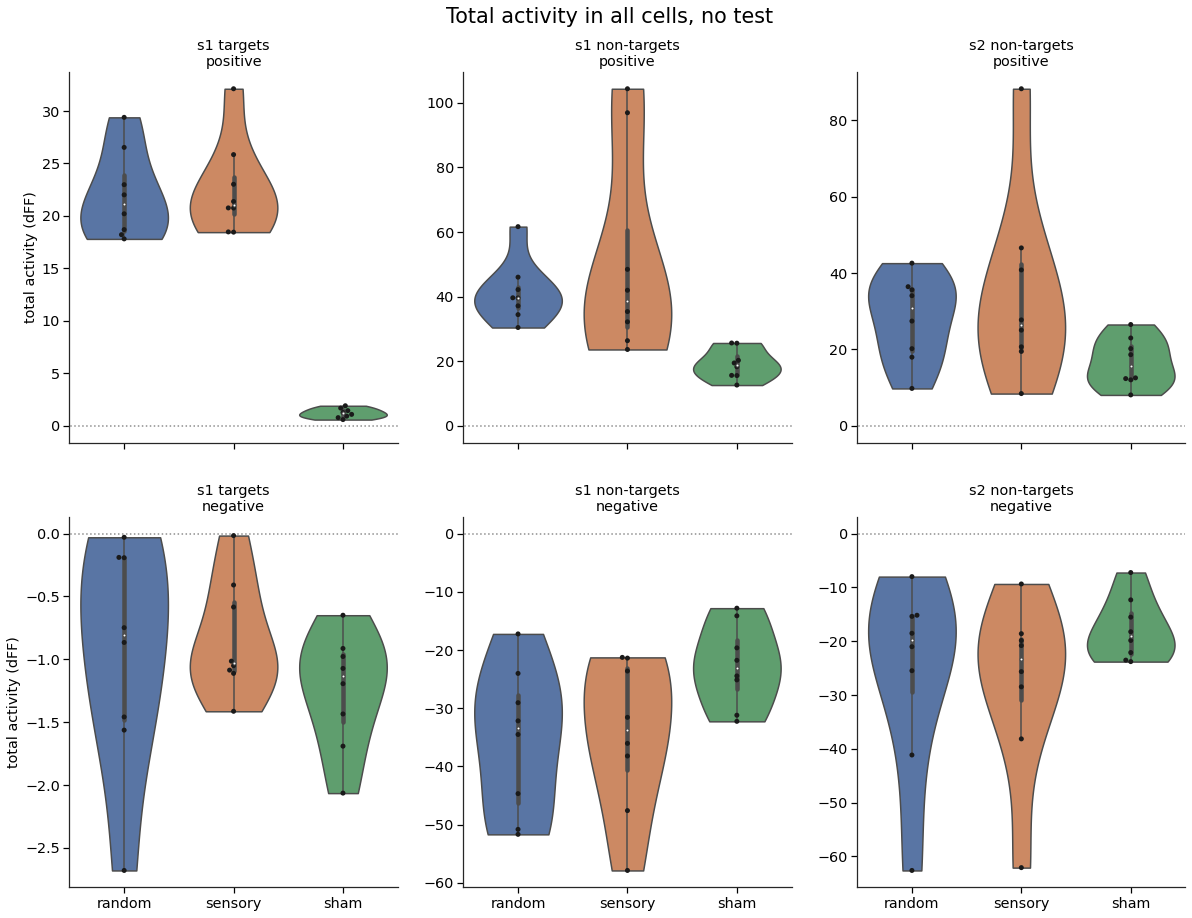

In [90]:
cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

# list of column names to be used to filter the dataframe
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_amp_resp', 'ps_sta_amp_resp', 'spont_sta_amp_resp']
trial_type = ['random', 'sensory', 'sham']

s1_targets_pos_df = pd.DataFrame()
s1_nontargets_pos_df = pd.DataFrame()
s2_nontargets_pos_df = pd.DataFrame()

s1_targets_non_df = pd.DataFrame()
s1_nontargets_non_df = pd.DataFrame()
s2_nontargets_non_df = pd.DataFrame()

s1_targets_neg_df = pd.DataFrame()
s1_nontargets_neg_df = pd.DataFrame()
s2_nontargets_neg_df = pd.DataFrame()
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    response = responses[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').sum()
    s1_targets_pos_df = pd.concat([s1_targets_pos_df, pd.DataFrame({trial : s1_targets_pos[response]})])
    
    s1_nontargets_pos = cell_df[~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').sum()
    s1_nontargets_pos_df = pd.concat([s1_nontargets_pos_df, pd.DataFrame({trial : s1_nontargets_pos[response]})])
    
    s2_nontargets_pos = cell_df[~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_pos_df = pd.concat([s2_nontargets_pos_df, pd.DataFrame({trial : s2_nontargets_pos[response]})])

    s1_targets_neg = cell_df[cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').sum()
    s1_targets_neg_df = pd.concat([s1_targets_neg_df, pd.DataFrame({trial : s1_targets_neg[response]})])
    
    s1_nontargets_neg = cell_df[~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').sum()
    s1_nontargets_neg_df = pd.concat([s1_nontargets_neg_df, pd.DataFrame({trial : s1_nontargets_neg[response]})])
    
    s2_nontargets_neg = cell_df[~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_neg_df = pd.concat([s2_nontargets_neg_df, pd.DataFrame({trial : s2_nontargets_neg[response]})])
    
# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(20,15))

data_array = [[s1_targets_pos_df, s1_nontargets_pos_df, s2_nontargets_pos_df],
              [s1_targets_neg_df, s1_nontargets_neg_df, s2_nontargets_neg_df]
             ]

row_titles = ['positive', 
              'negative'
             ]
col_titles = ['s1 targets', 's1 non-targets', 's2 non-targets']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        ax=axes[row_i,col_i]
        sns.swarmplot(data=data_array[row_i][col_i], color='k', ax=ax, edgecolor='k')
        sns.violinplot(data=data_array[row_i][col_i], ax=ax, cut=0, scale='width')
        
        col.set_title(col_titles[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('total activity (dFF)')
        col.hlines(0, -3, 11, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Total activity in all cells, no test', y=0.94, fontsize='xx-large');
    
# save the figure
save_path = os.path.join(qnap_path, session_type + 
                         '_TotalActivity_boxswarmplot_row_ResponseType_col_TargetID_splitby_TrialType')
# ia.savePlot(save_path)

In [ ]:
cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

# list of column names to be used to filter the dataframe
test_type = 'fdr'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_amp_resp', 'ps_sta_amp_resp', 'spont_sta_amp_resp']
trial_type = ['random', 'sensory', 'sham']

s1_targets_pos_df = pd.DataFrame()
s1_nontargets_pos_df = pd.DataFrame()
s2_nontargets_pos_df = pd.DataFrame()

s1_targets_non_df = pd.DataFrame()
s1_nontargets_non_df = pd.DataFrame()
s2_nontargets_non_df = pd.DataFrame()

s1_targets_neg_df = pd.DataFrame()
s1_nontargets_neg_df = pd.DataFrame()
s2_nontargets_neg_df = pd.DataFrame()
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    response = responses[stim_id]
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & 
                             cell_df[sign]].groupby('session_id').sum()
    s1_targets_pos_df = pd.concat([s1_targets_pos_df, pd.DataFrame({trial : s1_targets_pos[response]})])
    
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                cell_df[sign]].groupby('session_id').sum()
    s1_nontargets_pos_df = pd.concat([s1_nontargets_pos_df, pd.DataFrame({trial : s1_nontargets_pos[response]})])
    
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_pos_df = pd.concat([s2_nontargets_pos_df, pd.DataFrame({trial : s2_nontargets_pos[response]})])

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').sum()
    s1_targets_non_df = pd.concat([s1_targets_non_df, pd.DataFrame({trial : s1_targets_non[response]})])
    
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].groupby('session_id').sum()
    s1_nontargets_non_df = pd.concat([s1_nontargets_non_df, pd.DataFrame({trial : s1_nontargets_non[response]})])
    
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].groupby('session_id').sum()
    s2_nontargets_non_df = pd.concat([s2_nontargets_non_df, pd.DataFrame({trial : s2_nontargets_non[response]})])

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & 
                             ~cell_df[sign]].groupby('session_id').sum()
    s1_targets_neg_df = pd.concat([s1_targets_neg_df, pd.DataFrame({trial : s1_targets_neg[response]})])
    
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                ~cell_df[sign]].groupby('session_id').sum()
    s1_nontargets_neg_df = pd.concat([s1_nontargets_neg_df, pd.DataFrame({trial : s1_nontargets_neg[response]})])
    
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                ~cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_neg_df = pd.concat([s2_nontargets_neg_df, pd.DataFrame({trial : s2_nontargets_neg[response]})])
    
# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(20,15))

data_array = [[s1_targets_pos_df, s1_nontargets_pos_df, s2_nontargets_pos_df],
              [s1_targets_non_df, s1_nontargets_non_df, s2_nontargets_non_df],
              [s1_targets_neg_df, s1_nontargets_neg_df, s2_nontargets_neg_df]
             ]

row_titles = ['positive-responders (' + test_type + ')', 
              'non-responders (' + test_type + ')',
              'negative-responders (' + test_type + ')'
             ]
col_titles = ['s1 targets', 's1 non-targets', 's2 non-targets']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        ax=axes[row_i,col_i]
        sns.swarmplot(data=data_array[row_i][col_i], color='k', ax=ax, edgecolor='k')
        sns.violinplot(data=data_array[row_i][col_i], ax=ax, cut=0, scale='width')
        
        col.set_title(col_titles[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('total activity (dFF)')
        col.hlines(0, -3, 11, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Total activity in responding cells (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');
    
# save the figure
save_path = os.path.join(qnap_path, session_type + '_TotalActivity_' + test_type + 
                         '_boxswarmplot_row_ResponseType_col_TargetID_splitby_TrialType')
# ia.savePlot(save_path)

In [ ]:
cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

# list of column names to be used to filter the dataframe
test_type = 'fdr'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_amp_resp', 'ps_sta_amp_resp', 'spont_sta_amp_resp']
trial_type = ['random', 'sensory', 'sham']

s1_targets_pos_df = pd.DataFrame()
s1_nontargets_pos_df = pd.DataFrame()
s2_nontargets_pos_df = pd.DataFrame()

s1_targets_non_df = pd.DataFrame()
s1_nontargets_non_df = pd.DataFrame()
s2_nontargets_non_df = pd.DataFrame()

s1_targets_neg_df = pd.DataFrame()
s1_nontargets_neg_df = pd.DataFrame()
s2_nontargets_neg_df = pd.DataFrame()
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    response = responses[stim_id]
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & 
                             cell_df[sign]].groupby('session_id').mean()
    s1_targets_pos_df = pd.concat([s1_targets_pos_df, pd.DataFrame({trial : s1_targets_pos[response]})])
    
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                cell_df[sign]].groupby('session_id').mean()
    s1_nontargets_pos_df = pd.concat([s1_nontargets_pos_df, pd.DataFrame({trial : s1_nontargets_pos[response]})])
    
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                cell_df[sign]].groupby('session_id').mean()
    s2_nontargets_pos_df = pd.concat([s2_nontargets_pos_df, pd.DataFrame({trial : s2_nontargets_pos[response]})])

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').mean()
    s1_targets_non_df = pd.concat([s1_targets_non_df, pd.DataFrame({trial : s1_targets_non[response]})])
    
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].groupby('session_id').mean()
    s1_nontargets_non_df = pd.concat([s1_nontargets_non_df, pd.DataFrame({trial : s1_nontargets_non[response]})])
    
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].groupby('session_id').mean()
    s2_nontargets_non_df = pd.concat([s2_nontargets_non_df, pd.DataFrame({trial : s2_nontargets_non[response]})])

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & 
                             ~cell_df[sign]].groupby('session_id').mean()
    s1_targets_neg_df = pd.concat([s1_targets_neg_df, pd.DataFrame({trial : s1_targets_neg[response]})])
    
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                ~cell_df[sign]].groupby('session_id').mean()
    s1_nontargets_neg_df = pd.concat([s1_nontargets_neg_df, pd.DataFrame({trial : s1_nontargets_neg[response]})])
    
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                ~cell_df[sign]].groupby('session_id').mean()
    s2_nontargets_neg_df = pd.concat([s2_nontargets_neg_df, pd.DataFrame({trial : s2_nontargets_neg[response]})])
    
# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(20,15))

data_array = [[s1_targets_pos_df, s1_nontargets_pos_df, s2_nontargets_pos_df],
              [s1_targets_non_df, s1_nontargets_non_df, s2_nontargets_non_df],
              [s1_targets_neg_df, s1_nontargets_neg_df, s2_nontargets_neg_df]
             ]

row_titles = ['positive-responders (' + test_type + ')', 
              'non-responders (' + test_type + ')',
              'negative-responders (' + test_type + ')'
             ]
col_titles = ['s1 targets', 's1 non-targets', 's2 non-targets']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        ax=axes[row_i,col_i]
        sns.swarmplot(data=data_array[row_i][col_i], color='k', ax=ax, edgecolor='k')
        sns.violinplot(data=data_array[row_i][col_i], ax=ax, cut=0, scale='width')
        
        col.set_title(col_titles[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('total activity (dFF)')
        col.hlines(0, -3, 11, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Mean activity in responding cells (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');
    
# save the figure
save_path = os.path.join(qnap_path, session_type + '_MeanActivity_' + test_type + 
                         '_boxswarmplot_row_ResponseType_col_TargetID_splitby_TrialType')
# ia.savePlot(save_path)

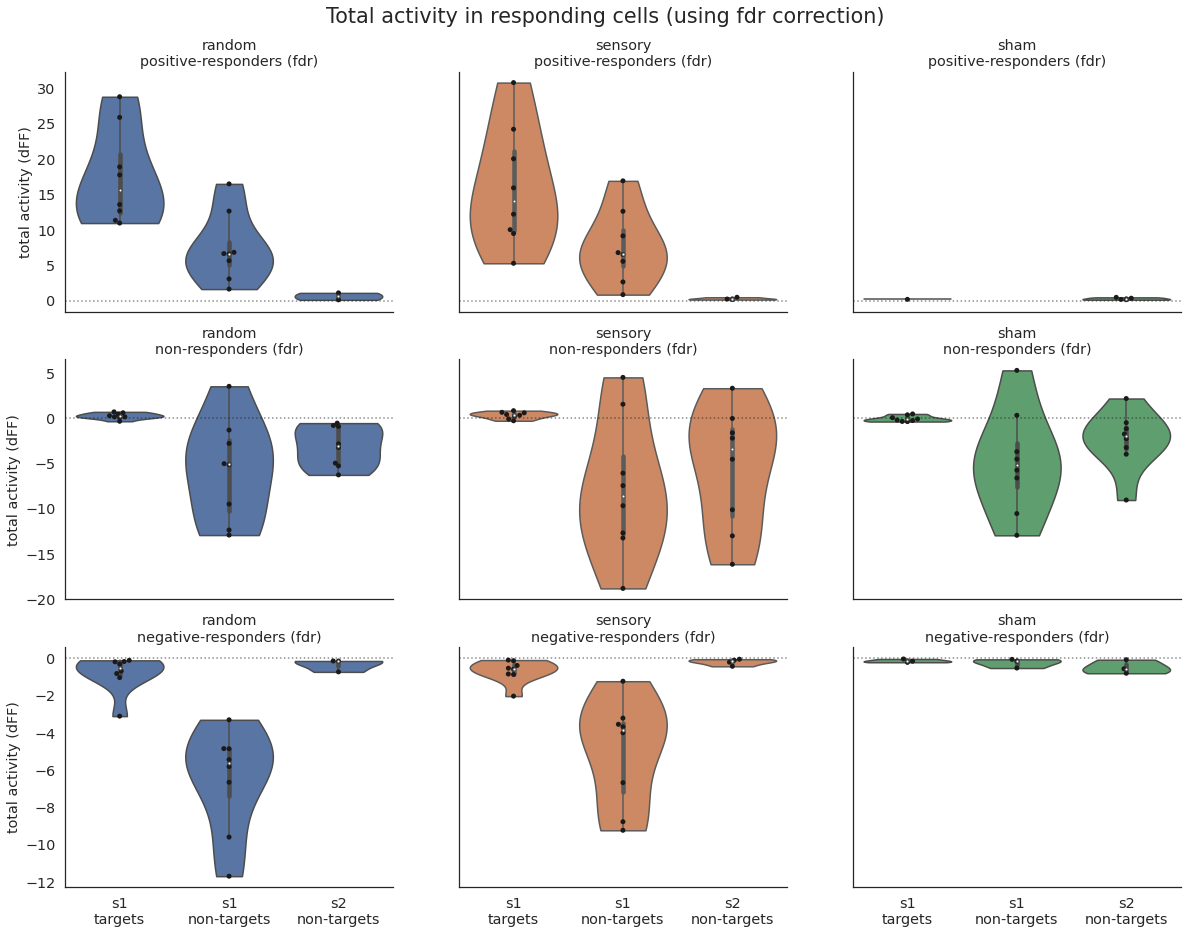

In [38]:
cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

# list of column names to be used to filter the dataframe
test_type = 'fdr'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_amp_resp', 'ps_sta_amp_resp', 'spont_sta_amp_resp']
trial_type = ['random', 'sensory', 'sham']

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=3, ncols=3, sharey='row', sharex=True, figsize=(20,15))
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    response = responses[stim_id]
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & 
                             cell_df[sign]].groupby('session_id').sum()
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                cell_df[sign]].groupby('session_id').sum()

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & 
                             ~cell_df[sign]].groupby('session_id').sum()
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                ~cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                ~cell_df[sign]].groupby('session_id').sum()

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').sum()
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].groupby('session_id').sum()
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].groupby('session_id').sum()
    
    for row, summed_df in enumerate([[s1_targets_pos, s1_nontargets_pos, s2_nontargets_pos],
                                    [s1_targets_non, s1_nontargets_non, s2_nontargets_non],
                                    [s1_targets_neg, s1_nontargets_neg, s2_nontargets_neg]                              
                                   ]):
        df = pd.DataFrame({'s1\ntargets'     : summed_df[0][response],
                           's1\nnon-targets' : summed_df[1][response],
                           's2\nnon-targets' : summed_df[2][response]
                          })
        sns.swarmplot(data=df, ax=axes[row, stim_id], color='k', edgecolor='k')
        color = 'C' + str(stim_id)
        sns.violinplot(data=df, ax=axes[row, stim_id], color=color, cut=0, scale='width')

row_titles = ['positive-responders (' + test_type + ')', 
              'non-responders (' + test_type + ')',
              'negative-responders (' + test_type + ')'
             ]

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        col.set_title(trial_type[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('total activity (dFF)')
        col.hlines(0, -3, 11, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Total activity in responding cells (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');
    
# save the figure
save_path = os.path.join(qnap_path, session_type + '_TotalActivity_' + test_type + 
                         '_boxswarmplot_row_ResponseType_col_TrialType_splitby_TargetID')
# ia.savePlot(save_path)

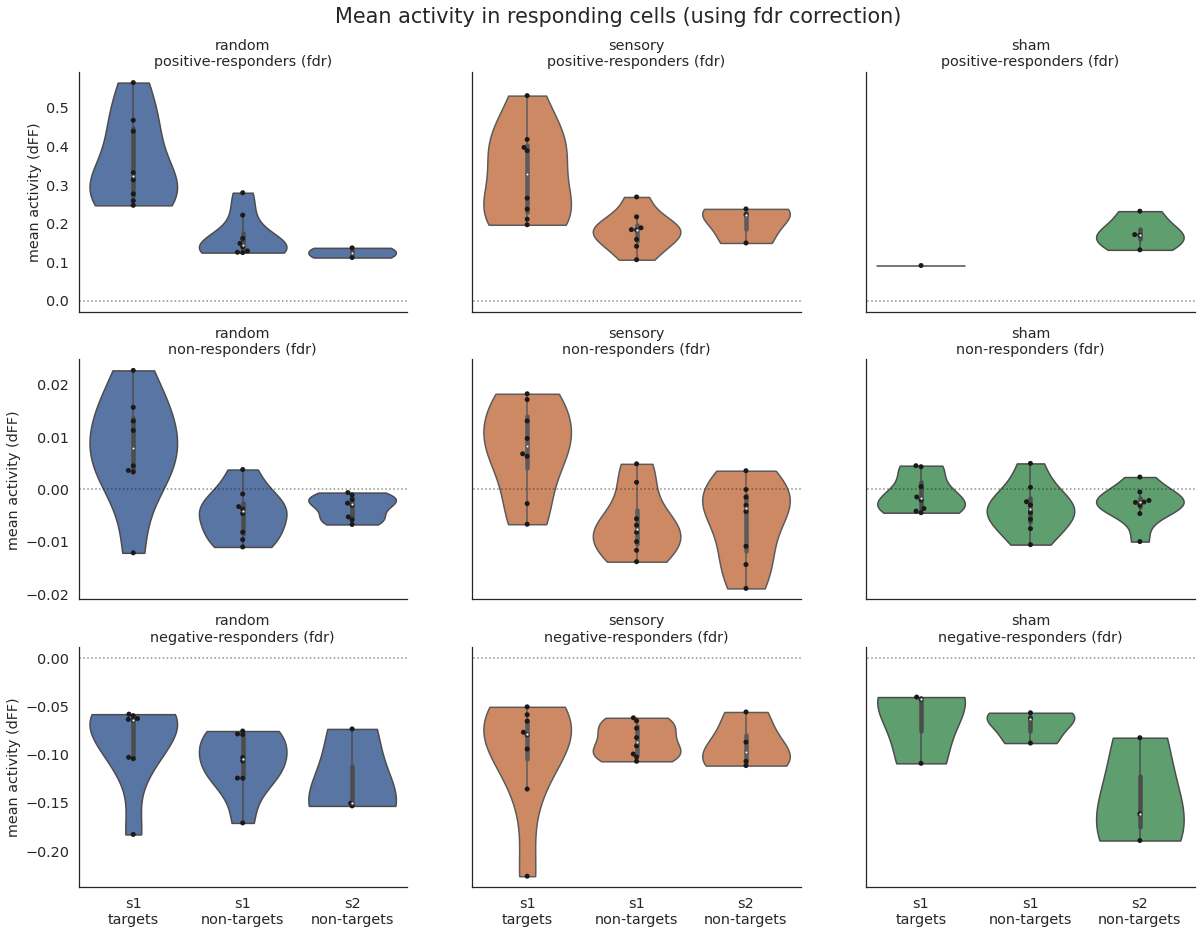

In [39]:
cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

# list of column names to be used to filter the dataframe
test_type = 'fdr'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_amp_resp', 'ps_sta_amp_resp', 'spont_sta_amp_resp']
trial_type = ['random', 'sensory', 'sham']

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=3, ncols=3, sharey='row', sharex=True, figsize=(20,15))
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    response = responses[stim_id]
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & 
                             cell_df[sign]].groupby('session_id').mean()
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                cell_df[sign]].groupby('session_id').mean()
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                cell_df[sign]].groupby('session_id').mean()

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & 
                             ~cell_df[sign]].groupby('session_id').mean()
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                ~cell_df[sign]].groupby('session_id').mean()
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                ~cell_df[sign]].groupby('session_id').mean()

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').mean()
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].groupby('session_id').mean()
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].groupby('session_id').mean()
    
    for row, summed_df in enumerate([[s1_targets_pos, s1_nontargets_pos, s2_nontargets_pos],
                                    [s1_targets_non, s1_nontargets_non, s2_nontargets_non],
                                    [s1_targets_neg, s1_nontargets_neg, s2_nontargets_neg]                              
                                   ]):
        df = pd.DataFrame({'s1\ntargets'     : summed_df[0][response],
                           's1\nnon-targets' : summed_df[1][response],
                           's2\nnon-targets' : summed_df[2][response]
                          })
        sns.swarmplot(data=df, ax=axes[row, stim_id], color='k', edgecolor='k')
        color = 'C' + str(stim_id)
        sns.violinplot(data=df, ax=axes[row, stim_id], color=color, cut=0, scale='width')

row_titles = ['positive-responders (' + test_type + ')', 
              'non-responders (' + test_type + ')',
              'negative-responders (' + test_type + ')'
             ]

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        col.set_title(trial_type[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('mean activity (dFF)')
        col.hlines(0, -3, 11, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Mean activity in responding cells (using ' + test_type + ' correction)', y=0.94, fontsize='xx-large');
    
# save the figure
save_path = os.path.join(qnap_path, session_type + '_MeanActivity_' + test_type + 
                         '_boxswarmplot_row_ResponseType_col_TrialType_splitby_TargetID')
# ia.savePlot(save_path)

# Percentage of targets/non-targets responding on each trial

In [ ]:
# for each trial type I need to append results to a dataframe for targets, s1 non-targets and s2 non-targets
# because different rows are going to be different dataframes
# also need to filter positive responses for first plot, but negative for later (make this easy)

experiment_df = pd.read_pickle(experiment_df_path)
cell_df = pd.read_pickle(cell_df_path)
cell_trial_df = pd.read_pickle(cell_trial_df_path)

target_types = ['pr', 'ps', 'pr']
trial_types = ['pr', 'ps', 'spont']

target_df = pd.DataFrame()
s1_nontarget_df = pd.DataFrame()
s2_nontarget_df = pd.DataFrame()

dfs = [target_df, s1_nontarget_df, s2_nontarget_df]

for target, trial in zip(target_types, trial_types):
    
    target_cell_ids = cell_df.query(target + '_target & s1_cell').index
    s1_nontarget_cell_ids = cell_df.query('~' + target + '_target & s1_cell').index
    s2_nontarget_cell_ids = cell_df.query('~' + target + '_target & s2_cell').index
    
    cell_id_list = [target_cell_ids, s1_nontarget_cell_ids, s2_nontarget_cell_ids]
    
    n_targets = cell_df.query(target + '_target & s1_cell').groupby('session_id').count()['cell_num']
    n_s1_nontargets = cell_df.query('~' + target + '_target & s1_cell').groupby('session_id').count()['cell_num']
    n_s2_nontargets = cell_df.query('~' + target + '_target & s2_cell').groupby('session_id').count()['cell_num']
    
    n_cells_list = [n_targets, n_s1_nontargets, n_s2_nontargets]
    
    for i, (cell_ids, n_cells) in enumerate(zip(cell_id_list, n_cells_list)):
        
        cell_filter = cell_trial_df['cell_id'].isin(cell_ids)
        filtered_df = cell_trial_df[cell_filter]

        sign_filter = filtered_df[trial + '_amp_resp'] > 0 # SWAP THIS FOR POSITIVE/NEGATIVE < >
        filtered_df = filtered_df[sign_filter]
        
        summed_df = filtered_df.groupby(['session_id', 'trial_num'])['trial_sig_dff_' + 
                                                                     trial].sum().reset_index(drop=False)
        temp_df = pd.DataFrame({'session_id' : summed_df['session_id'],
                                'trial_num' : summed_df['trial_num'],
                                'trial_type' : np.repeat(trial, len(summed_df)),
                                'num_cells' : summed_df['trial_sig_dff_' + trial],
                                'total_cells' : np.repeat(n_cells, 100).reset_index(drop=True)
                               })
        temp_df['percentage_cells'] = temp_df['num_cells']/temp_df['total_cells']
        
        dfs[i] = pd.concat([dfs[i], temp_df])
        
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,20))

session_ids = cell_df['session_id'].unique()
animal_ids = [session_id.split('_')[-1] for session_id in session_ids]
row_titles = ['targets', 's1 non-targets', 's2 non-targets']

for row_i, row in enumerate(axes):
    sns.violinplot(x='trial_type', y='percentage_cells', dodge=True, data=dfs[row_i], ax=row, cut=0)
    row.set_title(row_titles[row_i])

# save the figure
save_path = os.path.join(qnap_path, session_type + 
                         '_NumPosRespondingCells_perTrial_violinplot_row_TargetID_splitby_SessionID_TrialType')
ia.savePlot(save_path)

In [ ]:
# for each trial type I need to append results to a dataframe for targets, s1 non-targets and s2 non-targets
# because different rows are going to be different dataframes
# also need to filter positive responses for first plot, but negative for later (make this easy)

experiment_df = pd.read_pickle(experiment_df_path)
cell_df = pd.read_pickle(cell_df_path)
cell_trial_df = pd.read_pickle(cell_trial_df_path)

target_types = ['pr', 'ps', 'pr']
trial_types = ['pr', 'ps', 'spont']

target_df = pd.DataFrame()
s1_nontarget_df = pd.DataFrame()
s2_nontarget_df = pd.DataFrame()

dfs = [target_df, s1_nontarget_df, s2_nontarget_df]

for target, trial in zip(target_types, trial_types):
    
    target_cell_ids = cell_df.query(target + '_target & s1_cell').index
    s1_nontarget_cell_ids = cell_df.query('~' + target + '_target & s1_cell').index
    s2_nontarget_cell_ids = cell_df.query('~' + target + '_target & s2_cell').index
    
    cell_id_list = [target_cell_ids, s1_nontarget_cell_ids, s2_nontarget_cell_ids]
    
    n_targets = cell_df.query(target + '_target & s1_cell').groupby('session_id').count()['cell_num']
    n_s1_nontargets = cell_df.query('~' + target + '_target & s1_cell').groupby('session_id').count()['cell_num']
    n_s2_nontargets = cell_df.query('~' + target + '_target & s2_cell').groupby('session_id').count()['cell_num']
    
    n_cells_list = [n_targets, n_s1_nontargets, n_s2_nontargets]
    
    for i, (cell_ids, n_cells) in enumerate(zip(cell_id_list, n_cells_list)):
        
        cell_filter = cell_trial_df['cell_id'].isin(cell_ids)
        filtered_df = cell_trial_df[cell_filter]

        sign_filter = filtered_df[trial + '_amp_resp'] < 0 # SWAP THIS FOR POSITIVE/NEGATIVE < >
        filtered_df = filtered_df[sign_filter]
        
        summed_df = filtered_df.groupby(['session_id', 'trial_num'])['trial_sig_dff_' + 
                                                                     trial].sum().reset_index(drop=False)
        temp_df = pd.DataFrame({'session_id' : summed_df['session_id'],
                                'trial_num' : summed_df['trial_num'],
                                'trial_type' : np.repeat(trial, len(summed_df)),
                                'num_cells' : summed_df['trial_sig_dff_' + trial],
                                'n_units' : np.repeat(n_cells, 100).reset_index(drop=True)
                               })
        temp_df['percentage_cells'] = temp_df['num_cells']/temp_df['n_units']
        
        dfs[i] = pd.concat([dfs[i], temp_df])
        
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,30))

session_ids = cell_df['session_id'].unique()
animal_ids = [session_id.split('_')[-1] for session_id in session_ids]
row_titles = ['targets', 's1 non-targets', 's2 non-targets']

for row_i, row in enumerate(axes):
    sns.violinplot(x='session_id', y='percentage_cells', hue='trial_type', data=dfs[row_i],
                   dodge=True, ax=row, cut=0)
    row.set_xticklabels(animal_ids)
    row.set_title(row_titles[row_i])
    
    row.hlines(0, -1, 17, linestyles='dotted', zorder=4, alpha=0.5, color='k');
    row.set_xlim([-1,8])

# save the figure
save_path = os.path.join(qnap_path, session_type + 
                         '_PctPosRespondingCells_perTrial_violinplot_row_TargetID_splitby_SessionID_TrialType')
ia.savePlot(save_path)

# Number of targets/non-targets responding on each trial

In [ ]:
# for each trial type I need to append results to a dataframe for targets, s1 non-targets and s2 non-targets
# because different rows are going to be different dataframes
# also need to filter positive responses for first plot, but negative for later (make this easy)

cell_df = pd.read_pickle(cell_df_path)
cell_trial_df = pd.read_pickle(cell_trial_df_path)

target_types = ['pr', 'ps', 'pr']
trial_types = ['pr', 'ps', 'spont']

target_df = pd.DataFrame()
s1_nontarget_df = pd.DataFrame()
s2_nontarget_df = pd.DataFrame()

dfs = [target_df, s1_nontarget_df, s2_nontarget_df]

for target, trial in zip(target_types, trial_types):
    
    target_cell_ids = cell_df.query(target + '_target & s1_cell').index
    s1_nontarget_cell_ids = cell_df.query('~' + target + '_target & s1_cell').index
    s2_nontarget_cell_ids = cell_df.query('~' + target + '_target & s2_cell').index
    
    cell_id_list = [target_cell_ids, s1_nontarget_cell_ids, s2_nontarget_cell_ids]
    
    for i, cell_ids in enumerate(cell_id_list):
        
        cell_filter = cell_trial_df['cell_id'].isin(cell_ids)
        filtered_df = cell_trial_df[cell_filter]

        sign_filter = filtered_df[trial + '_amp_resp'] > 0 # SWAP THIS FOR POSITIVE/NEGATIVE < >
        filtered_df = filtered_df[sign_filter]
        
        summed_df = filtered_df.groupby(['session_id', 'trial_num'])['trial_sig_dff_' + 
                                                                     trial].sum().reset_index(drop=False)
        temp_df = pd.DataFrame({'session_id' : summed_df['session_id'],
                                'trial_num' : summed_df['trial_num'],
                                'trial_type' : np.repeat(trial, len(summed_df)),
                                'num_cells' : summed_df['trial_sig_dff_' + trial]
                               })
        dfs[i] = pd.concat([dfs[i], temp_df])
        
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,30))

session_ids = cell_df['session_id'].unique()
animal_ids = [session_id.split('_')[-1] for session_id in session_ids]
row_titles = ['targets', 's1 non-targets', 's2 non-targets']

for row_i, row in enumerate(axes):
    sns.violinplot(x='session_id', y='num_cells', hue='trial_type', dodge=True, data=dfs[row_i], ax=row, cut=0)
    row.set_xticklabels(animal_ids)
    row.set_title(row_titles[row_i])
    
    row.hlines(0, -1, 17, linestyles='dotted', zorder=4, alpha=0.5, color='k');
    row.set_xlim([-1,8])

# save the figure
save_path = os.path.join(qnap_path, session_type + 
                         '_NumNegRespondingCells_perTrial_violinplot_row_TargetID_splitby_SessionID_TrialType')
ia.savePlot(save_path)

In [ ]:
cell_df = pd.read_pickle(cell_df_path)
cell_trial_df = pd.read_pickle(cell_trial_df_path)

trials = ['pr', 'ps', 'spont']
targets = ['pr', 'ps', 'pr']
colors = ['C0', 'C1', 'C2']

session_ids = cell_trial_df['session_id'].unique()   

fig, axes = plt.subplots(nrows=4, ncols=4, sharey=True, sharex=True, figsize=(20,15))

for color, trial, target in zip(colors, trials, targets):
    
    target_cell_ids = cell_df.query(target + '_target & ' + trial + '_resp_sign').index

    target_filter = cell_trial_df['cell_id'].isin(target_cell_ids)
    
    filtered_df = cell_trial_df[target_filter] \
                   .groupby(['session_id', 'trial_num'])['trial_sig_dff_' + trial] \
                   .sum() \
                   .reset_index(drop=False) \
    
    for ax_i, ax in enumerate(axes.flatten()):
        
        try:
            session_df = filtered_df[filtered_df['session_id']==session_ids[ax_i]]
        except:
            break
        
        sns.lineplot(x='trial_num', y='trial_sig_dff_'+trial, data=session_df, ci=None, ax=ax, 
                     label=trial, legend=False)
        ax.set_title(session_ids[ax_i])
        if i==0: ax.legend(['random', 'sensory', 'spont'])
    #             col.set_ylim([50, 200])
        ax.hlines(0, 0, 100, linestyles='dotted', zorder=4, alpha=0.5, color='k');
                    
plt.suptitle('Number of targets responding on each trial', y=0.93, fontsize='xx-large');

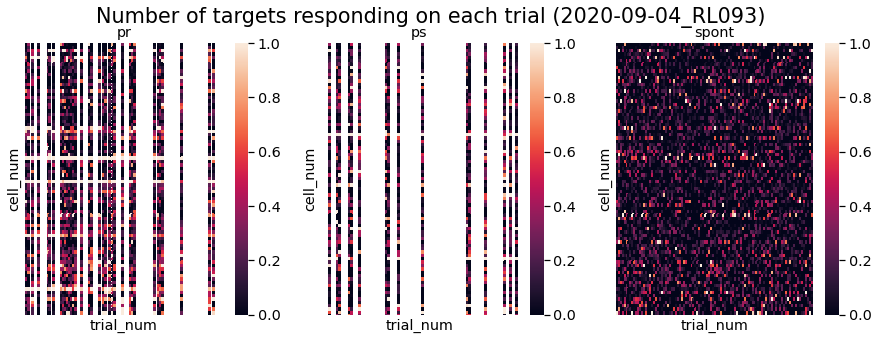

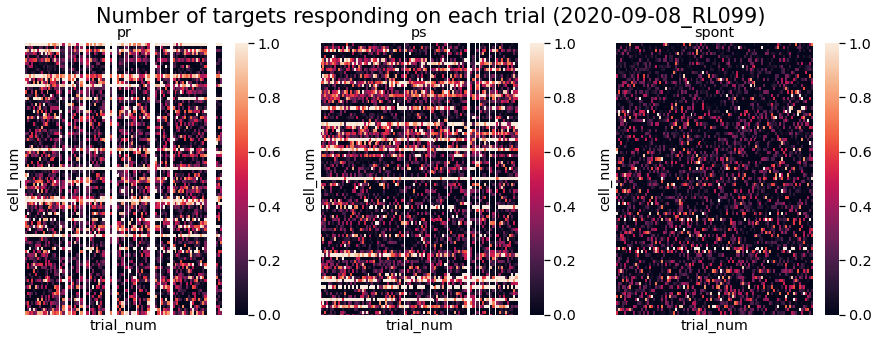

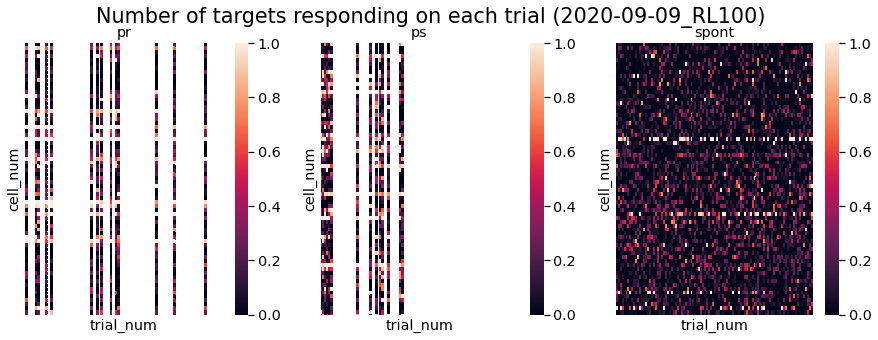

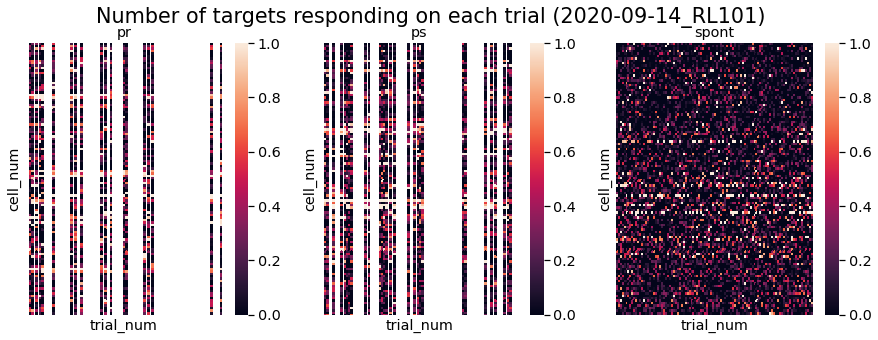

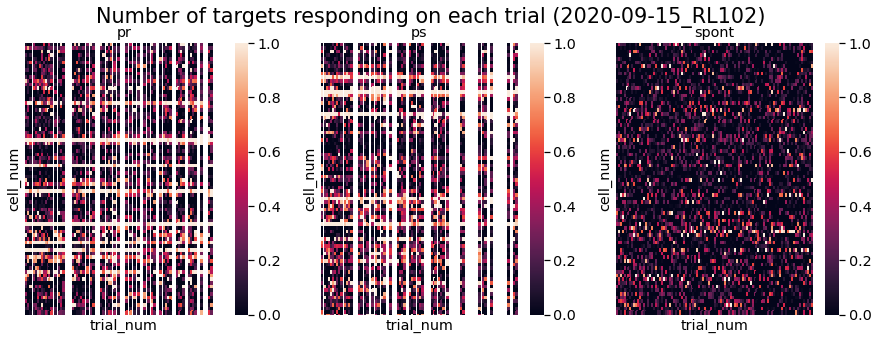

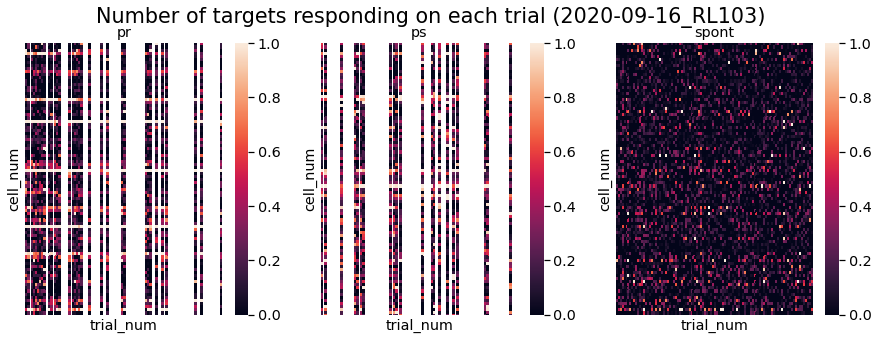

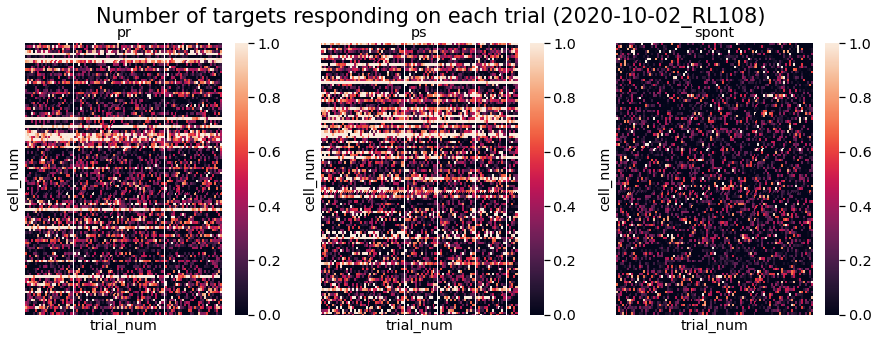

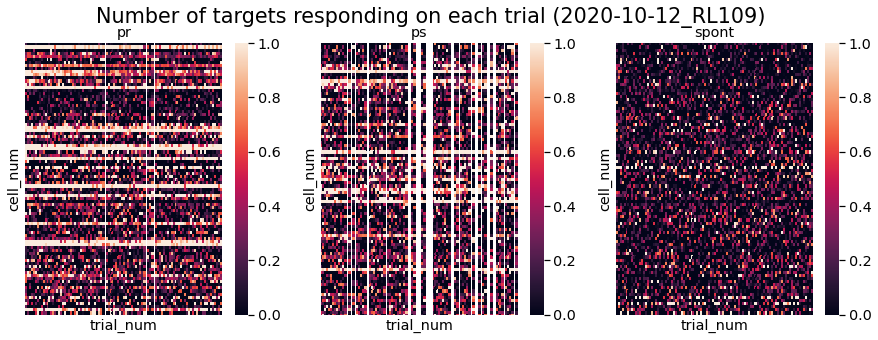

In [111]:
# plot 2d heatmap of
# cells (y-axis)
# vs.
# activity using trial + _amp_resp from cell_trial_df (x-axis)

cell_df = pd.read_pickle(cell_df_path)
cell_trial_df = pd.read_pickle(cell_trial_df_path)

trials = ['pr', 'ps', 'spont']
targets = ['pr', 'ps', 'pr']

session_ids = cell_trial_df['session_id'].unique()   

for session_id in session_ids:
    
    fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=True, figsize=(15,5))
    
    session_df = cell_df[cell_df['session_id']==session_id]
    
    for trial, target, ax in zip(trials, targets, axes):
    
#         target_cell_ids = session_df.query('~' + target + '_target & s2_cell').index
        target_cell_ids = session_df.query(target + '_target').index
        target_filter = cell_trial_df['cell_id'].isin(target_cell_ids)
        filtered_df = cell_trial_df[target_filter]

        crop_df = filtered_df.loc[:,['cell_num', 'trial_num', trial + '_amp_resp']]
        pivot_df = crop_df.pivot('cell_num', 'trial_num', trial + '_amp_resp')
        sns.heatmap(pivot_df, vmin=0, vmax=1, ax=ax, xticklabels=False, yticklabels=False);

        ax.set_title(trial)

        plt.suptitle('Number of targets responding on each trial (' + session_id + ')', fontsize='xx-large');

# Summed activity of targets/non-targets responding on each trial

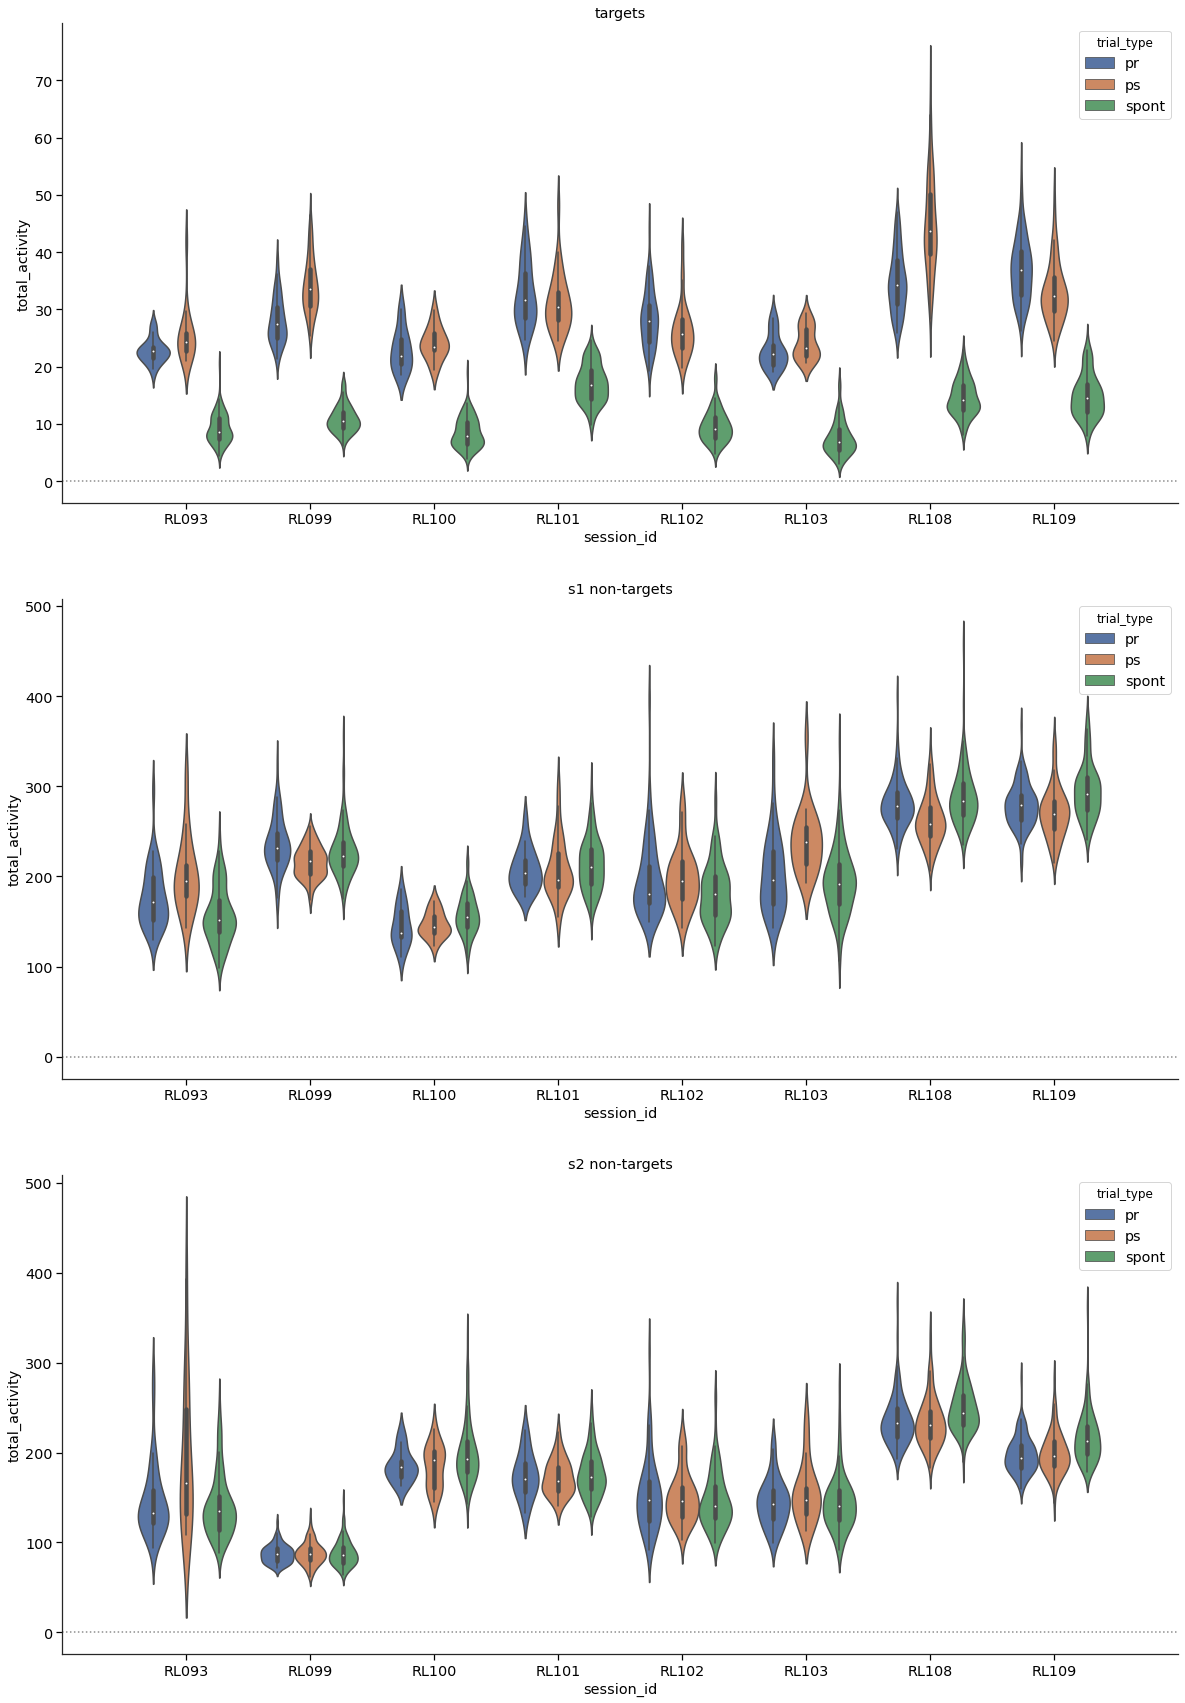

In [112]:
cell_df = pd.read_pickle(cell_df_path)
cell_trial_df = pd.read_pickle(cell_trial_df_path)

target_types = ['pr', 'ps', 'pr']
trial_types = ['pr', 'ps', 'spont']

target_df = pd.DataFrame()
s1_nontarget_df = pd.DataFrame()
s2_nontarget_df = pd.DataFrame()

dfs = [target_df, s1_nontarget_df, s2_nontarget_df]

for target, trial in zip(target_types, trial_types):
    
    target_cell_ids = cell_df.query(target + '_target & s1_cell').index
    s1_nontarget_cell_ids = cell_df.query('~' + target + '_target & s1_cell').index
    s2_nontarget_cell_ids = cell_df.query('~' + target + '_target & s2_cell').index
    
    cell_id_list = [target_cell_ids, s1_nontarget_cell_ids, s2_nontarget_cell_ids]
    
    for i, cell_ids in enumerate(cell_id_list):
        
        cell_filter = cell_trial_df['cell_id'].isin(cell_ids)
        filtered_df = cell_trial_df[cell_filter]

        sign_filter = filtered_df[trial + '_amp_resp'] > 0
        filtered_df = filtered_df[sign_filter]
        
        summed_df = filtered_df.groupby(['session_id', 'trial_num']).sum().reset_index(drop=False)
        temp_df = pd.DataFrame({'session_id' : summed_df['session_id'],
                                'trial_num' : summed_df['trial_num'],
                                'trial_type' : np.repeat(trial, len(summed_df)),
                                'total_activity' : summed_df[trial + '_amp_resp']
                               })
        dfs[i] = pd.concat([dfs[i], temp_df])
        
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,30))

session_ids = cell_df['session_id'].unique()
animal_ids = [session_id.split('_')[-1] for session_id in session_ids]
row_titles = ['targets', 's1 non-targets', 's2 non-targets']

for row_i, row in enumerate(axes):
    sns.violinplot(x='session_id', y='total_activity', hue='trial_type', dodge=True, data=dfs[row_i], ax=row)
    row.set_xticklabels(animal_ids)
    row.set_title(row_titles[row_i])

    row.hlines(0, -1, 17, linestyles='dotted', zorder=4, alpha=0.5, color='k');
    row.set_xlim([-1,8])

# save the figure
# save_path = os.path.join(qnap_path, session_type + 
#                          '_TotalNegActivity_perTrial_violinplot_row_TargetID_splitby_SessionID_TrialType')
# ia.savePlot(save_path)

In [ ]:
cell_df = pd.read_pickle(cell_df_path)
cell_trial_df = pd.read_pickle(cell_trial_df_path)

trials = ['pr', 'ps', 'spont']
targets = ['pr', 'ps', 'pr']
colors = ['C0', 'C1', 'C2']

session_ids = cell_trial_df['session_id'].unique()   

fig, axes = plt.subplots(nrows=4, ncols=4, sharey=True, sharex=True, figsize=(20,15))

for color, target, trial in zip(colors, targets, trials):
    
    target_cell_ids = cell_df.query('~' + target + '_target & ' + trial + '_resp_sign').index

    target_filter = cell_trial_df['cell_id'].isin(target_cell_ids)
    
    filtered_df = cell_trial_df[target_filter] \
                   .groupby(['session_id', 'trial_num', 'trial_sig_dff_'+trial])[trial+'_amp_resp'] \
                   .sum() \
                   .reset_index(drop=False) \
        
    for ax_i, ax in enumerate(axes.flatten()):
        try:
            session_df = filtered_df[(filtered_df['session_id']==session_ids[ax_i]) & 
                                     filtered_df['trial_sig_dff_'+trial]]
        except:
            break
            
        sns.lineplot(x='trial_num', y=trial+'_amp_resp', data=session_df, ci=None, ax=ax, 
                     label=trial, legend=False)
        ax.set_title(session_ids[ax_i])
        if ax_i==0: col.legend(['random', 'sensory'])
        if not (ax_i % 4): col.set_ylabel('summed activity (dFF)')
        ax.set_ylim([-100, 200])
        ax.hlines(0, 0, 100, linestyles='dotted', zorder=4, alpha=0.5, color='k');
                
plt.suptitle('Summed activity of non-targets responding on each trial', y=0.93, fontsize='xx-large');

# Filtering trials based on target responses

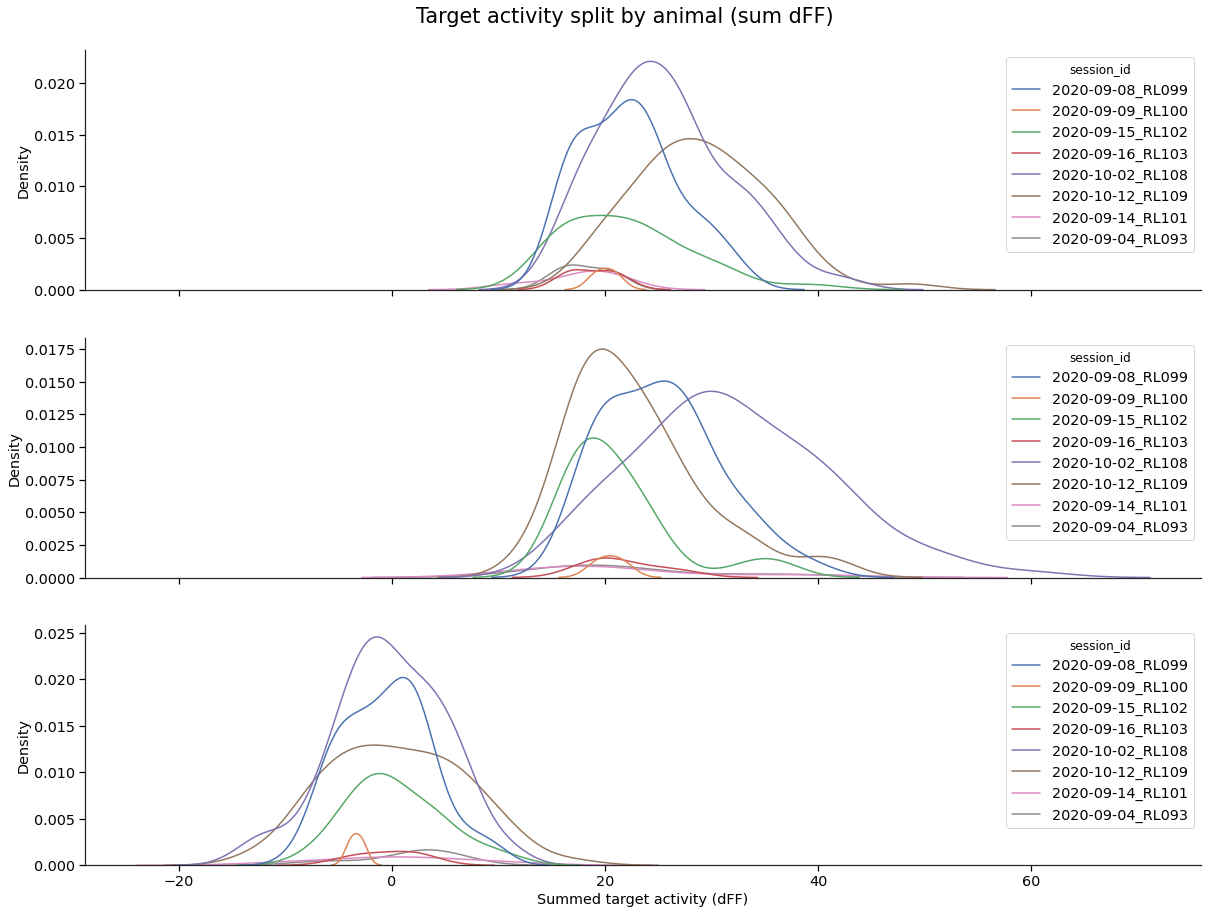

In [113]:
cell_trial_df = pd.read_pickle(cell_trial_df_path)
cell_df = pd.read_pickle(cell_df_path)

responses = ['pr_amp_resp', 'ps_amp_resp', 'spont_amp_resp']
targets = ['pr_target', 'ps_target', 'pr_target']
trials = ['random', 'sensory', 'sham']

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(20,15))

for response, target, trial, ax in zip(responses, targets, trials, axes):
    
    target_cell_ids = cell_df.query(target).index

    target_filter = cell_trial_df['cell_id'].isin(target_cell_ids)
    target_df = cell_trial_df[target_filter].dropna()
    sum_target_df = target_df.groupby(['trial_num', 'session_id']).sum()

    sns.kdeplot(data=sum_target_df, x=response, hue='session_id', legend=True, ax=ax)
    
ax.set_xlabel('Summed target activity (dFF)')
plt.suptitle('Target activity split by animal (sum dFF)', y=0.92, fontsize='xx-large');

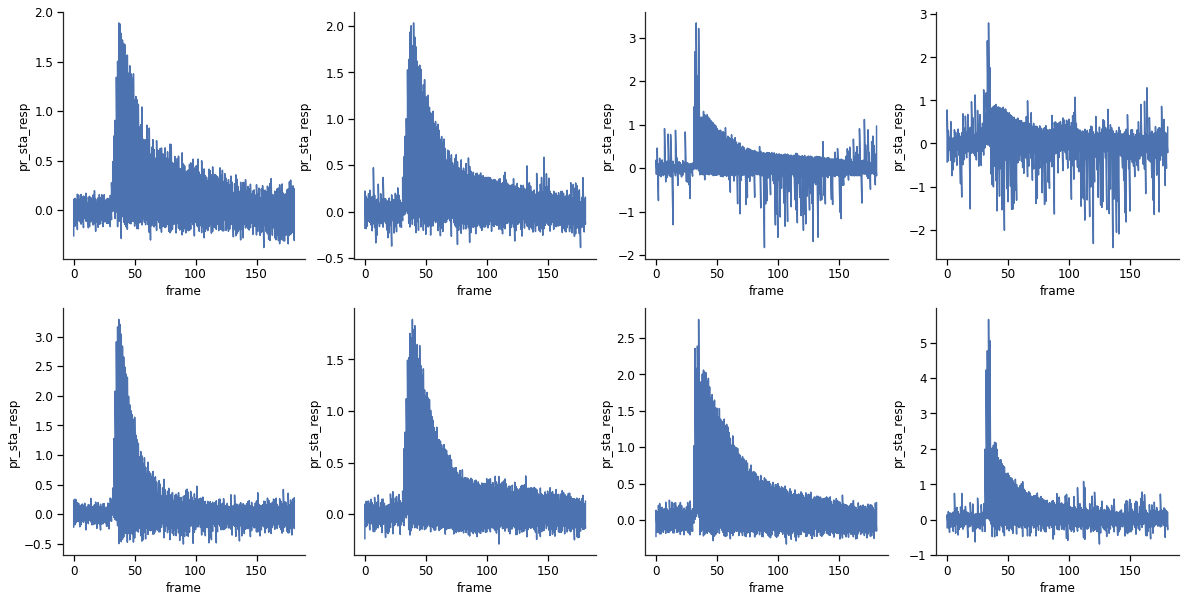

In [10]:
# Plotting all target STAs for each session

tcells = cell_df.query('pr_target').index
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)
tcell_filter = cell_mean_timepoint_df['cell_id'].isin(tcells)
tcell_sta = cell_mean_timepoint_df[tcell_filter].groupby('session_id')

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
axes_fl = axes.flatten()

for ax_i, (name, group) in enumerate(tcell_sta):
    ax = axes_fl[ax_i]
    sns.lineplot(x='frame', y='pr_sta_resp', data=group, estimator=None, ax=ax)

In [8]:
# Plotting each STA for significantly responding targets

%matplotlib widget
from ipywidgets import *

cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)
cell_df = pd.read_pickle(cell_df_path)

tcell_ids = cell_df.query('pr_target & sta_sig_pr').index

tcell_filter = cell_mean_timepoint_df['cell_id'].isin(tcell_ids)
tcell_stas = cell_mean_timepoint_df[tcell_filter]

default_cell = tcell_ids.values[0]
default_filter = cell_mean_timepoint_df['cell_id'].isin([default_cell])
default_data = cell_mean_timepoint_df[default_filter]

default_x = default_data['timepoint']
default_y = default_data['pr_sta_resp']

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
dff_line, = ax.plot(default_x, default_y, c='k')
baseline = ax.hlines(0, min(default_x), max(default_x), color='0.6', linestyle='--')
ax.set_ylim([-1, 1])

def update(cell_id):
    
    tcell_filter = cell_mean_timepoint_df['cell_id'].isin([cell_id])
    tcell_sta = cell_mean_timepoint_df[tcell_filter]

    x = tcell_sta['timepoint']
    y = tcell_sta['pr_sta_resp']
    
    dff_line.set_ydata(y)
    dff_line.set_xdata(x)

    fig.canvas.draw_idle()

interact(update, cell_id=list(tcells));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(Dropdown(description='cell_id', options=('2020-09-04_RL093_35', '2020-09-04_RL093_36', '…

random n targets low: 380 high: 420
sensory n targets low: 417 high: 383
spont n targets low: 798 high: 2


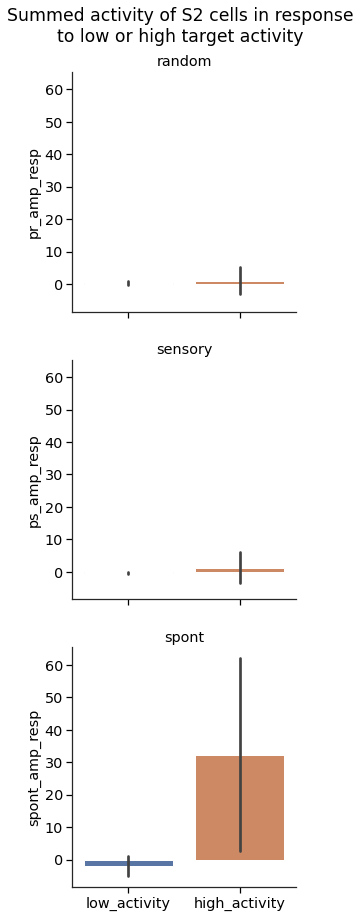

In [114]:
# Plot S2 responses to photostim
# Final result is S2 responses for target sum dFF >15 and <15

cell_df = pd.read_pickle(cell_df_path)
cell_trial_df = pd.read_pickle(cell_trial_df_path)

responses = ['pr_amp_resp', 'ps_amp_resp', 'spont_amp_resp']
targets = ['pr_target', 'ps_target', 'pr_target']
trials = ['random', 'sensory', 'spont']

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(4,15))

for response, target, trial, ax in zip(responses, targets, trials, axes):
    
    target_cell_ids = cell_df.query(target).index
    target_filter = cell_trial_df['cell_id'].isin(target_cell_ids)
    target_df = cell_trial_df[target_filter] \
                   .groupby(['session_id', 'trial_num']) \
                   .sum()

    low_activity = target_df[response] < 15
    high_activity = target_df[response] >= 15
    print(trial, 
          'n targets low:', sum(low_activity), 
          'high:', sum(high_activity))

    s2_cell_ids = cell_df.query('s2_cell').index
    s2_filter = cell_trial_df['cell_id'].isin(s2_cell_ids)
    s2_df = cell_trial_df[s2_filter] \
               .groupby(['session_id', 'trial_num']) \
               .sum()

    split_df = pd.DataFrame({'low_activity' : s2_df[low_activity][response],
                             'high_activity' : s2_df[high_activity][response]
                            })
    
    sns.barplot(data=split_df, ax=ax)
    ax.set_title(trial)
    ax.set_ylabel(response)

plt.suptitle('Summed activity of S2 cells in response\nto low or high target activity', y=0.94, fontsize='x-large');

# Target input vs non-target output activity in responding cells (scatterplot)

In [ ]:
cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

# list of column names to be used to filter the dataframe
test_type = 'nomulti'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
    trial_type = ['random', 'sensory']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
    trial_type = ['random', 'sensory', 'sham']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_amp_resp', 'ps_sta_amp_resp', 'spont_sta_amp_resp']

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=2, ncols=2, sharey='row', sharex=True, figsize=(20,15))
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    response = responses[stim_id]
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').sum()
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                cell_df[sign]].groupby('session_id').sum()

    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                ~cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                ~cell_df[sign]].groupby('session_id').sum()
    
    for row, pos_neg_df in enumerate([[s1_nontargets_pos, s2_nontargets_pos],
                                      [s1_nontargets_neg, s2_nontargets_neg]                              
                                     ]):
        for col, target_nontarget_df in enumerate(pos_neg_df):
            df = pd.DataFrame({'target activity (summed dFF)'    : s1_targets[response],
                               'non-targets'                     : target_nontarget_df[response]
                              })
            p = sns.regplot(x='target activity (summed dFF)', y='non-targets', data=df, label=trial, 
                            ax=axes[row, col], ci=95, fit_reg=True)
            
            df = df.dropna() # remove axes containing NaN values (otherwise linregress doesn't function correctly)
            slope, _, r_value, p_value, _ = stats.linregress(x=df['target activity (summed dFF)'], 
                                                             y=df['non-targets'])
            
            max_y, max_x = p.get_lines()[-1].get_ydata()[-1], p.get_lines()[-1].get_xdata()[-1] # get max x/y coords of line
            axes[row,col].text(max_x+1, max_y+1, 
                               'slope: {:.2f} \nr_value: {:.2f} \np_value: {:.2f}'.format(slope, r_value, p_value),
                               color='C' + str(stim_id)) 
            
row_titles = ['positive-responders (' + test_type + ')', 
              'negative-responders (' + test_type + ')'
             ]
column_titles = ['local (S1)', 'downstream (S2)']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        col.set_title(column_titles[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('non-target activity (summed dFF)')
        else: col.set_ylabel('')
        if col_i==1 and row_i==0: col.legend()
        col.set_xlabel('target activity (summed dFF)')
        col.hlines(0, 0, 32, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Input/output activity in responding cells (using ' + test_type + ' correction)', 
             y=0.94, fontsize='xx-large');
    
# save the figure
save_path = os.path.join(qnap_path, session_type + '_InputOutput_' + test_type + 
                         '_regplot_row_ResponseType_col_TargetID_splitby_TrialType')
# ia.savePlot(save_path)

# Target input vs non-target output activity in all cells, responding or not (scatterplot)

In [ ]:
cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

# list of column names to be used to filter the dataframe
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['pr_sta_amp_resp', 'ps_sta_amp_resp', 'spont_sta_amp_resp']
trial_type = ['random', 'sensory', 'sham']

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=2, ncols=2, sharey='row', sharex=True, figsize=(20,15))
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    response = responses[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets = cell_df[cell_df[target] & cell_df['s1_cell']].groupby('session_id').sum()
    s1_nontargets_pos = cell_df[~cell_df[target] & cell_df['s1_cell'] & cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_pos = cell_df[~cell_df[target] & cell_df['s2_cell'] & cell_df[sign]].groupby('session_id').sum()

    s1_nontargets_neg = cell_df[~cell_df[target] & cell_df['s1_cell'] & ~cell_df[sign]].groupby('session_id').sum()
    s2_nontargets_neg = cell_df[~cell_df[target] & cell_df['s2_cell'] & ~cell_df[sign]].groupby('session_id').sum()
    
    for row, pos_neg_df in enumerate([[s1_nontargets_pos, s2_nontargets_pos],
                                      [s1_nontargets_neg, s2_nontargets_neg]                              
                                     ]):
        for col, target_nontarget_df in enumerate(pos_neg_df):
            df = pd.DataFrame({'target activity (summed dFF)'    : s1_targets[response],
                               'non-targets'                     : target_nontarget_df[response]
                              })
            p = sns.regplot(x='target activity (summed dFF)', y='non-targets', data=df, label=trial, 
                            ax=axes[row, col], ci=95, fit_reg=True)
            
            df = df.dropna() # remove axes containing NaN values (otherwise linregress doesn't function correctly)
            slope, _, r_value, p_value, _ = stats.linregress(x=df['target activity (summed dFF)'], 
                                                             y=df['non-targets'])
            
            max_y, max_x = p.get_lines()[-1].get_ydata()[-1], p.get_lines()[-1].get_xdata()[-1] # get max x/y coords of line
            axes[row,col].text(max_x+1, max_y+1, 
                               'slope: {:.2f} \nr_value: {:.2f} \np_value: {:.2f}'.format(slope, r_value, p_value),
                               color='C' + str(stim_id)) 
            
row_titles = ['positive', 
              'negative'
             ]
column_titles = ['local (S1)', 'downstream (S2)']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        col.set_title(column_titles[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('non-target activity (summed dFF)')
        else: col.set_ylabel('')
        if col_i==1 and row_i==0: col.legend()
        col.set_xlabel('target activity (summed dFF)')
        col.hlines(0, 0, 32, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Input/output activity in all cells', y=0.94, fontsize='xx-large');
    
# save the figure
save_path = os.path.join(qnap_path, session_type + '_InputOutput_' + test_type + 
                         '_regplot_row_ResponseType_col_TargetID_splitby_TrialType')
# ia.savePlot(save_path)

# Input vs output activity in all trials, any cell, not just responding (scatterplot)

trial: random slope 0.12269389630745611 r_value 0.04876055188227204 p_value 0.1682589251083316
trial: sensory slope 0.08021191345475573 r_value 0.03371253005217998 p_value 0.3409377205779244
trial: sham slope 1.9912427552731715 r_value 0.2159174794572041 p_value 6.809710905938264e-10


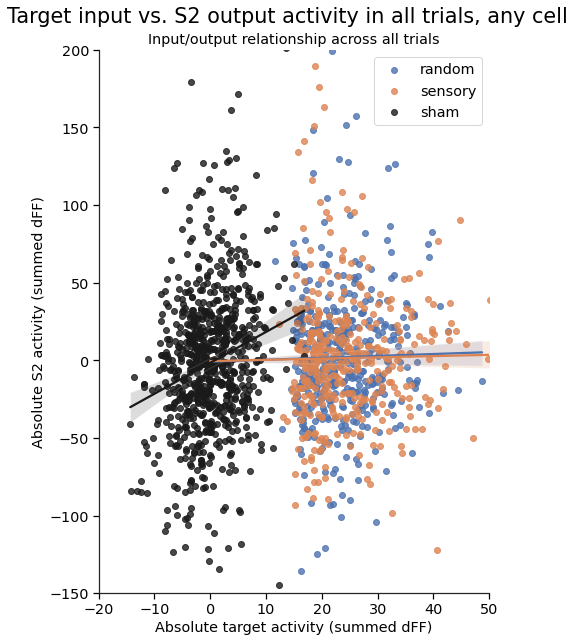

In [115]:
cell_trial_df = pd.read_pickle(cell_trial_df_path)
cell_df = pd.read_pickle(cell_df_path)

responses = ['pr_amp_resp', 'ps_amp_resp', 'spont_amp_resp']
targets = ['pr_target', 'ps_target', 'pr_target']
trials = ['random', 'sensory', 'sham']
colors = ['C0', 'C1', 'k']
# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(7,10))

for response, target, trial, color in zip(responses, targets, trials, colors):
    
    s2_cell_ids = cell_df.query('s2_cell & ~' + target).index
    target_cell_ids = cell_df.query(target).index

    target_filter = cell_trial_df['cell_id'].isin(target_cell_ids)
    target_df = cell_trial_df[target_filter]
    target_amp_resp = target_df.groupby(['trial_num','session_id']).sum()[response]

    s2_filter = cell_trial_df['cell_id'].isin(s2_cell_ids)
    s2_df = cell_trial_df[s2_filter]
    s2_amp_resp = s2_df.groupby(['trial_num','session_id']).sum()[response]

    df = pd.DataFrame({'target_amp_resp' : target_amp_resp,
                       's2_amp_resp'     : s2_amp_resp})

    df = df.reset_index(drop=False)
    
    sns.regplot(x=df['target_amp_resp'], y=df['s2_amp_resp'], 
            data=df, ax=axes, label=trial, color=color)

    axes.set_title('Input/output relationship across all trials')
    axes.set_ylabel('Absolute S2 activity (summed dFF)')
    axes.legend()
    axes.set_xlabel('Absolute target activity (summed dFF)')
    axes.set_xlim([-20, 50])
    axes.set_ylim([-150, 200])
    
    slope, _, r_value, p_value, _ = stats.linregress(x=df['target_amp_resp'], 
                                                     y=df['s2_amp_resp'])
    print('trial:', trial,
          'slope', slope,
          'r_value', r_value,
          'p_value', p_value
         )
            
plt.suptitle('Target input vs. S2 output activity in all trials, any cell', y=0.94, 
         fontsize='xx-large');

In [116]:
# ANCOVA to compare slope/intercept of linear regression
from pingouin import ancova

cell_trial_df = pd.read_pickle(cell_trial_df_path)
cell_df = pd.read_pickle(cell_df_path)

responses = ['pr_amp_resp', 'ps_amp_resp', 'spont_amp_resp']
targets = ['pr_target', 'ps_target', 'pr_target']
trials = ['random', 'sensory', 'sham']

df = pd.DataFrame()

for response, target, trial in zip(responses, targets, trials):
    
    s2_cell_ids = cell_df.query('s2_cell & ~' + target).index
    s1_nt_cell_ids = cell_df.query('s1_cell & ~' + target).index
    target_cell_ids = cell_df.query(target).index

    target_filter = cell_trial_df['cell_id'].isin(target_cell_ids)
    target_df = cell_trial_df[target_filter]
    target_amp_resp = target_df.groupby(['trial_num','session_id']).sum()[response]

    s1_nt_filter = cell_trial_df['cell_id'].isin(s1_nt_cell_ids)
    s1_nt_df = cell_trial_df[s1_nt_filter]
    s1_nt_amp_resp = s1_nt_df.groupby(['trial_num','session_id']).sum()[response]

    s2_filter = cell_trial_df['cell_id'].isin(s2_cell_ids)
    s2_df = cell_trial_df[s2_filter]
    s2_amp_resp = s2_df.groupby(['trial_num','session_id']).sum()[response]

    temp_df = pd.DataFrame({'trial_type' : np.repeat(trial, len(s1_nt_amp_resp)),
                            'target_amp_resp' : target_amp_resp,
                            's1_nt_amp_resp' : s1_nt_amp_resp,
                            's2_amp_resp' : s2_amp_resp})

    df = pd.concat([df, temp_df])

df.reset_index(drop=True, inplace=True)

ancova(data=df, dv='s2_amp_resp', covar='s1_nt_amp_resp', between='trial_type')

Source            SS    DF           F          p-unc       np2
0      trial_type  1.662885e+02     2    0.084373   9.190910e-01  0.000070
1  s1_nt_amp_resp  9.765759e+05     1  991.009822  2.419203e-182  0.292591
2        Residual  2.361103e+06  2396         NaN            NaN       NaN

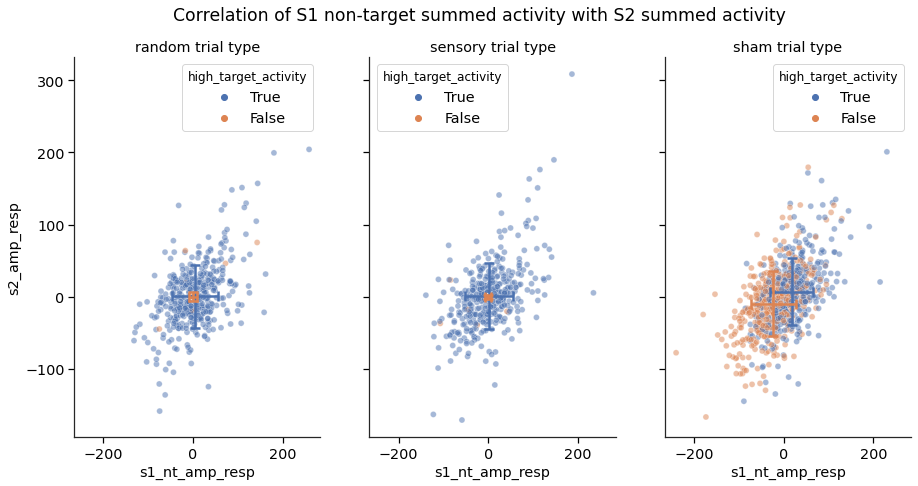

In [117]:
# need to plot target activity as another variable on scatterplot of s1 nontarget vs s2 nontarget activity

trial_types = ['random', 'sensory', 'sham']
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,7))

for ax, trial in zip(axes, trial_types):
    trial_type_df = df.copy(deep=True)
    trial_type_df = trial_type_df[trial_type_df['trial_type'] == trial]
    
    if trial not in 'sham':
        trial_type_df['high_target_activity'] = trial_type_df['target_amp_resp']>=15
    else:
        trial_type_df['high_target_activity'] = trial_type_df['target_amp_resp']>=0
        
    sns.scatterplot(data=trial_type_df, x='s1_nt_amp_resp', y='s2_amp_resp', alpha=0.5, 
                    hue='high_target_activity', hue_order=[True, False], ax=ax);
    
    high_act_mean_df = trial_type_df.query('high_target_activity').mean()
    high_act_std_df = trial_type_df.query('high_target_activity').std()
    low_act_mean_df = trial_type_df.query('~high_target_activity').mean()
    low_act_std_df = trial_type_df.query('~high_target_activity').std()
    
    ax.errorbar(high_act_mean_df['s1_nt_amp_resp'], high_act_mean_df['s2_amp_resp'],
                yerr=high_act_std_df['s2_amp_resp'], xerr=high_act_std_df['s1_nt_amp_resp'], elinewidth=2.5,
               capsize=5, capthick=2.5)
    
    ax.errorbar(low_act_mean_df['s1_nt_amp_resp'], low_act_mean_df['s2_amp_resp'],
                yerr=low_act_std_df['s2_amp_resp'], xerr=low_act_std_df['s1_nt_amp_resp'], elinewidth=2.5,
               capsize=5, capthick=2.5)

    ax.set_title(trial + ' trial type')
    plt.suptitle('Correlation of S1 non-target summed activity with S2 summed activity', fontsize='x-large')

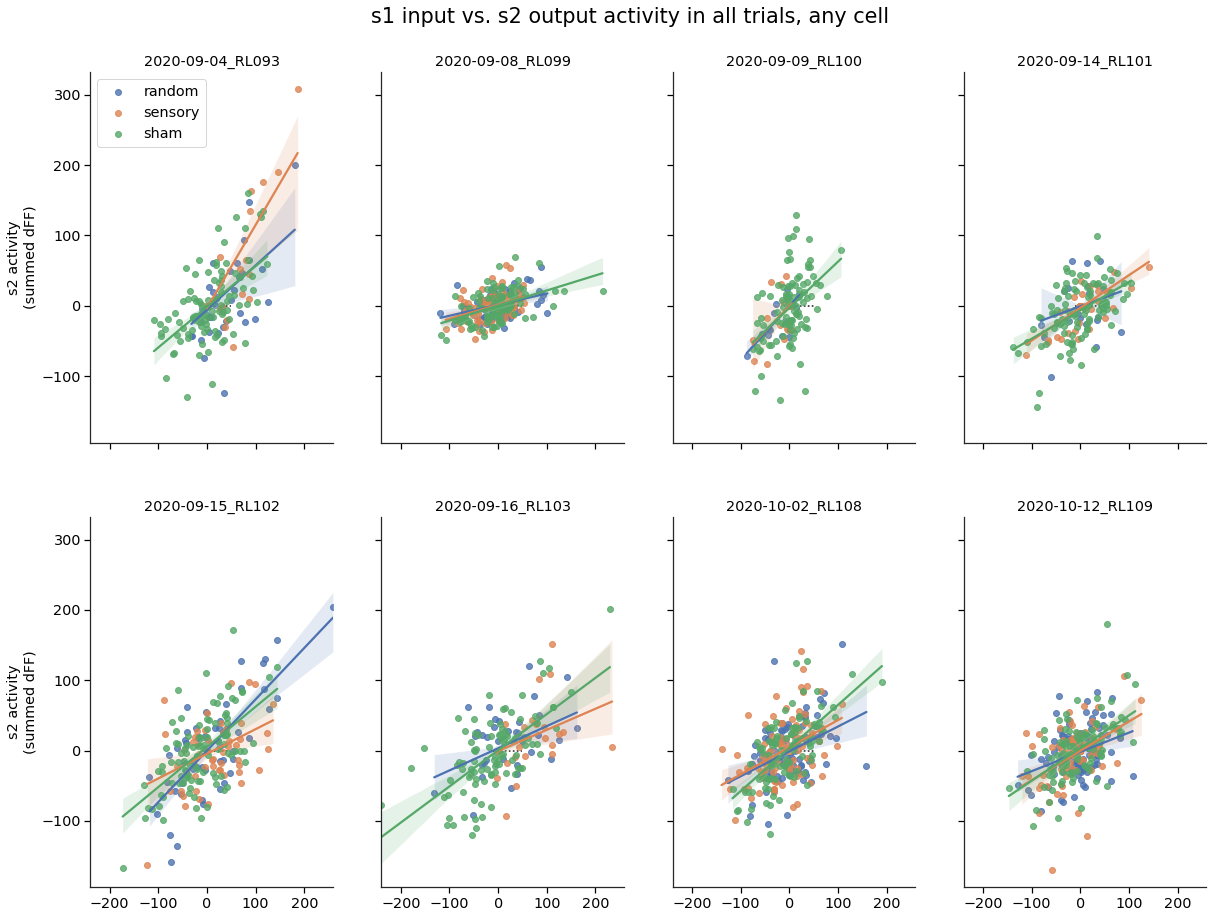

In [4]:
cell_trial_df = pd.read_pickle(cell_trial_df_path)
cell_df = pd.read_pickle(cell_df_path)

input_ = 's1'
output_ = 's2'

responses = ['pr_amp_resp', 'ps_amp_resp', 'spont_amp_resp']
targets = ['pr_target', 'ps_target', 'pr_target']
trials = ['random', 'sensory', 'sham']

session_ids = cell_trial_df['session_id'].unique()

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(20,15))

for response, target, trial in zip(responses, targets, trials):
    
    s1_cell_ids = cell_df.query('s1_cell & ~' + target).index
    s2_cell_ids = cell_df.query('s2_cell & ~' + target).index
    target_cell_ids = cell_df.query(target).index

    target_filter = cell_trial_df['cell_id'].isin(target_cell_ids)
    target_df = cell_trial_df[target_filter]
    target_amp_resp = target_df.groupby(['trial_num','session_id']).sum()[response]

    s1_filter = cell_trial_df['cell_id'].isin(s1_cell_ids)
    s1_df = cell_trial_df[s1_filter]
    s1_amp_resp = s1_df.groupby(['trial_num','session_id']).sum()[response]

    s2_filter = cell_trial_df['cell_id'].isin(s2_cell_ids)
    s2_df = cell_trial_df[s2_filter]
    s2_amp_resp = s2_df.groupby(['trial_num','session_id']).sum()[response]

    df = pd.DataFrame({'target_amp_resp' : target_amp_resp,
                       's1_amp_resp'     : s1_amp_resp,
                       's2_amp_resp'     : s2_amp_resp})

    df = df.reset_index(drop=False)
    
    for ax_i, ax in enumerate(axes.flatten()):
        
        try:
            sns.regplot(x=input_ + '_amp_resp', y=output_ + '_amp_resp', 
                    data=df[df['session_id']==session_ids[ax_i]], ax=ax, label=trial)
            
            ax.set_title(session_ids[ax_i])
            ax.hlines(0, -10, 50, linestyles='dotted', zorder=0, alpha=0.5, color='k');

            if not ax_i%4: ax.set_ylabel(output_ + ' activity\n(summed dFF)')
            else: ax.set_ylabel('')

            if ax_i==0: ax.legend()

            if ax_i>=12: ax.set_xlabel(input_ + ' activity (summed dFF)')
            else: ax.set_xlabel('')
        
        except:            
            break
            
plt.suptitle(input_ + ' input vs. ' + output_ + ' output activity in all trials, any cell', y=0.94, 
         fontsize='xx-large');

# Input vs output activity in all trials for responding cells, >1 sd baseline response (scatterplot)

In [ ]:
cell_trial_df = pd.read_pickle(cell_trial_df_path)
cell_df = pd.read_pickle(cell_df_path)

input_ = 'target'
output_ = 's1'

responses = ['pr_amp_resp', 'ps_amp_resp', 'spont_amp_resp']
targets = ['pr_target', 'ps_target', 'pr_target']
trials = ['random', 'sensory', 'sham']
tests = ['trial_sig_dff_pr', 'trial_sig_dff_ps', 'trial_sig_dff_spont']

session_ids = cell_trial_df['session_id'].unique()

# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, figsize=(20,15))

for response, target, trial, test in zip(responses, targets, trials, tests):
    
    s1_cell_ids = cell_df.query('s1_cell & ~' + target).index
    s2_cell_ids = cell_df.query('s2_cell & ~' + target).index
    target_cell_ids = cell_df.query(target).index

    target_filter = cell_trial_df['cell_id'].isin(target_cell_ids)
    target_df = cell_trial_df[target_filter].dropna().query(test)
    target_amp_resp = target_df.groupby(['trial_num','session_id']).sum()[response]

    s1_filter = cell_trial_df['cell_id'].isin(s1_cell_ids)
    s1_df = cell_trial_df[s1_filter].dropna().query(test)
    s1_amp_resp = s1_df.groupby(['trial_num','session_id']).sum()[response]

    s2_filter = cell_trial_df['cell_id'].isin(s2_cell_ids)
    s2_df = cell_trial_df[s2_filter].dropna().query(test)
    s2_amp_resp = s2_df.groupby(['trial_num','session_id']).sum()[response]

    df = pd.DataFrame({'target_amp_resp' : target_amp_resp,
                       's1_amp_resp'     : s1_amp_resp,
                       's2_amp_resp'     : s2_amp_resp})

    df = df.reset_index(drop=False)
    
    for ax_i, ax in enumerate(axes.flatten()):
        
        try:
            sns.regplot(x=input_+'_amp_resp', y=output_+'_amp_resp', 
                        data=df[df['session_id']==session_ids[ax_i]], ax=ax, label=trial)

            ax.set_title(session_ids[ax_i])
            ax.hlines(0, -10, 50, linestyles='dotted', zorder=0, alpha=0.5, color='k');

            if not ax_i % 4: ax.set_ylabel(output_ + ' non-target activity\n(summed dFF)')
            else: ax.set_ylabel('')

            if ax_i==0: ax.legend()

            if ax_i>=12: ax.set_xlabel(input_ + ' activity (summed dFF)')
            else: ax.set_xlabel('')
                
        except:
            break
                
plt.suptitle(input_ + ' input vs. ' + output_ + ' output activity in all trials, responders only', y=0.94, 
             fontsize='xx-large');

# Probability of response in all cells between trial types (distribution + scatterplot)

In [ ]:
cell_df = pd.read_pickle(cell_df_path)

targets = ['pr', 'ps', 'pr']
trials = ['pr', 'ps', 'spont']

df = pd.DataFrame()

for trial, target in zip(trials, targets):
    query_df = cell_df.query('~' + target + '_target & s2_cell')
    
    temp_df = pd.DataFrame({
        'prob_response' : query_df['prob_response_' + trial],
        'trial_type' : np.repeat(trial, len(query_df))
    })
    df = pd.concat([df, temp_df])

# sns.displot(data=df, x='prob_response', hue='trial_type', kind='kde', height=10, aspect=10/8)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
sns.histplot(data=df, x='prob_response', hue='trial_type', stat='count', cumulative=True, fill=False, element='poly')
plt.xlim([0, 0.3])
plt.xlabel('Probability of response')
plt.ylabel('Number of cells')
# plt.ylim([0, 0.5])
plt.suptitle('Distribution of probability of response for non-targeted S2 cells', y=0.94, fontsize='xx-large');

print('pr vs. spont:', stats.ks_2samp(df[df['trial_type']=='pr']['prob_response'],
                                      df[df['trial_type']=='spont']['prob_response']))
print('pr vs. ps:', stats.ks_2samp(df[df['trial_type']=='pr']['prob_response'],
                                   df[df['trial_type']=='ps']['prob_response']))
print('ps vs. spont:', stats.ks_2samp(df[df['trial_type']=='ps']['prob_response'],
                                      df[df['trial_type']=='spont']['prob_response']))

# save the figure
save_path = os.path.join(qnap_path, session_type + '_ResponseProbCompare_NonTarget_displot_splitby_TrialType')
# ia.savePlot(save_path)

In [ ]:
cell_df = pd.read_pickle(cell_df_path)

trials = ['pr', 'ps']

fig, axes = plt.subplots(nrows=2, figsize=(20,20))

for trial, ax in zip(trials, axes):
    sns.scatterplot(x='prob_response_'+trial, y='prob_response_spont', style='session_id', hue='s1_cell', 
                    data=cell_df.query('~' + trial + '_target'), ax=ax, color='k', s=150)
    ax.plot([0,1],[0,1], 'k', linestyle='dashed')
    ax.plot([0,1],[0.2,1.2], 'k', linestyle='dotted')
    ax.plot([0.2,1.2],[0,1], 'k', linestyle='dotted')
    ax.set_aspect('equal')
    ax.axis([0,1,0,1]);
    
plt.suptitle('Comparison of response probabilities for all non-target cells\n between photostim and sham', 
             y=0.9, fontsize='xx-large');

# save the figure
save_path = os.path.join(qnap_path, session_type + 
                         '_ResponseProbCompare_NonTarget_scatterplot_row_TrialType_splitby_S1Cell_SessionID')
# ia.savePlot(save_path)

In [ ]:
cell_df = pd.read_pickle(cell_df_path)

trials = ['pr', 'ps']

fig, axes = plt.subplots(ncols=2, figsize=(20,10))

for trial, ax in zip(trials, axes):
    df = cell_df.query('~' + trial + '_target & s2_cell')
    sns.histplot(x='prob_response_'+trial, y='prob_response_spont',
                    data=df, ax=ax, binwidth=(0.01,0.01), cbar=True, cbar_kws=dict(shrink=.75), color='k')
    ax.set_aspect('equal')
    ax.axis([0,0.5,0,0.5]);

axes[0].set_xlabel('Probability of response (random photostim.)')
axes[1].set_xlabel('Probability of response (sensory photostim.)')
axes[1].set_ylabel('Probability of response (sham trial)')
axes[0].set_ylabel('Probability of response (sham trial)')

plt.suptitle('Comparison of response probabilities for non-targeted S2 cells between photostim and sham', 
             y=0.86, fontsize='xx-large');

# save the figure
save_path = os.path.join(qnap_path, session_type + 
                         '_ResponseProbCompare_NonTarget_scatterplot_row_TrialType_splitby_S1Cell_SessionID')
# ia.savePlot(save_path)

# Average traces of individual cells with probability of response higher in photostim than sham + some offset (lineplots)

In [ ]:
cell_trial_single_timepoint_df = pd.read_pickle(cell_trial_single_timepoint_df_path)
cell_df = pd.read_pickle(cell_df_path)

trials = ['pr', 'ps']
targets = ['pr', 'ps']
colors = ['C0', 'C1']

for color, trial, target in zip(colors, trials, targets):
    
    cell_ids = cell_df.query('(prob_response_' + trial + ' > (prob_response_spont + 0.2))' + 
                             '& ~' + target + '_target & s2_cell').index

    row_filter = cell_trial_single_timepoint_df['cell_id'].isin(cell_ids)
    filtered_df = cell_trial_single_timepoint_df[row_filter]
    
    g = sns.relplot(kind='line', x='timepoint', y=trial+'_resp', units='trial_num', lw=0.5, 
                    alpha=0.5, data=filtered_df, ci=None, estimator=None, col='cell_id', col_wrap=4, 
                    facet_kws={'sharey' : False})
    
    for ax in g.axes:
        ax.hlines(0, -2, 10, linestyles='dotted', zorder=0, alpha=0.5, color='k');

In [ ]:
cell_df = pd.read_pickle(cell_df_path)
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

trials = ['pr', 'ps']
targets = ['pr', 'ps']
colors = ['C0', 'C1']

for color, trial, target in zip(colors, trials, targets):
    
    cell_ids = cell_df.query('(prob_response_' + trial + ' > (prob_response_spont + 0.2))' + 
                             '& ~' + target + '_target & s2_cell').index

    row_filter = cell_mean_timepoint_df['cell_id'].isin(cell_ids)
    filtered_df = cell_mean_timepoint_df[row_filter]

    session_ids = cell_trial_df['session_id'].unique()   

    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, figsize=(20,15))
    
    for ax_i, ax in enumerate(axes.flatten()):
        
        try:
            session_df = filtered_df[filtered_df['session_id']==session_ids[ax_i]]

            for group in session_df.groupby('cell_id'):
                sns.lineplot(x='timepoint', y=trial+'_sta_resp', data=group[1], ax=ax, label=trial, 
                             color=color, alpha=0.5, legend=False)
            sns.lineplot(x='timepoint', y=trial+'_sta_resp', data=session_df, ci=None, color='k', 
                         alpha=0.75, ax=ax, label=trial, legend=False)

            col.set_title(session_ids[ax_i])
            col.hlines(0, -2, 10, linestyles='dotted', zorder=0, alpha=0.5, color='k');
            
        except:
            break

# For responding cells, what is their probability of response?

In [ ]:
cell_df = pd.read_pickle(cell_df_path)

# list of column names to be used to filter the dataframe
test_type = 'fdr'
if test_type == 'fdr':
    stat_test = ['sta_sig_pr', 'sta_sig_ps', 'sta_sig_spont']
if test_type == 'nomulti':
    stat_test = ['sta_sig_nomulti_pr', 'sta_sig_nomulti_ps', 'sta_sig_nomulti_spont']
target_type = ['pr_target', 'ps_target', 'pr_target']
sign_bool = ['pr_resp_sign', 'ps_resp_sign', 'spont_resp_sign']
responses = ['prob_response_pr', 'prob_response_ps', 'prob_response_spont']
trial_type = ['random', 'sensory', 'sham']

s1_targets_pos_df = pd.DataFrame()
s1_nontargets_pos_df = pd.DataFrame()
s2_nontargets_pos_df = pd.DataFrame()

s1_targets_non_df = pd.DataFrame()
s1_nontargets_non_df = pd.DataFrame()
s2_nontargets_non_df = pd.DataFrame()

s1_targets_neg_df = pd.DataFrame()
s1_nontargets_neg_df = pd.DataFrame()
s2_nontargets_neg_df = pd.DataFrame()
    
for stim_id, trial in enumerate(trial_type):
    
    # define column names
    response = responses[stim_id]
    test = stat_test[stim_id]
    target = target_type[stim_id]
    sign = sign_bool[stim_id]

    # filter dataframes using variables above
    s1_targets_pos = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & 
                             cell_df[sign]].groupby('session_id').mean()
    s1_targets_pos_df = pd.concat([s1_targets_pos_df, pd.DataFrame({trial : s1_targets_pos[response]})])
    
    s1_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                cell_df[sign]].groupby('session_id').mean()
    s1_nontargets_pos_df = pd.concat([s1_nontargets_pos_df, pd.DataFrame({trial : s1_nontargets_pos[response]})])
    
    s2_nontargets_pos = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                cell_df[sign]].groupby('session_id').mean()
    s2_nontargets_pos_df = pd.concat([s2_nontargets_pos_df, pd.DataFrame({trial : s2_nontargets_pos[response]})])

    s1_targets_non = cell_df[~cell_df[test] & cell_df[target] & cell_df['s1_cell']].groupby('session_id').mean()
    s1_targets_non_df = pd.concat([s1_targets_non_df, pd.DataFrame({trial : s1_targets_non[response]})])
    
    s1_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s1_cell']].groupby('session_id').mean()
    s1_nontargets_non_df = pd.concat([s1_nontargets_non_df, pd.DataFrame({trial : s1_nontargets_non[response]})])
    
    s2_nontargets_non = cell_df[~cell_df[test] & ~cell_df[target] & cell_df['s2_cell']].groupby('session_id').mean()
    s2_nontargets_non_df = pd.concat([s2_nontargets_non_df, pd.DataFrame({trial : s2_nontargets_non[response]})])

    s1_targets_neg = cell_df[cell_df[test] & cell_df[target] & cell_df['s1_cell'] & 
                             ~cell_df[sign]].groupby('session_id').mean()
    s1_targets_neg_df = pd.concat([s1_targets_neg_df, pd.DataFrame({trial : s1_targets_neg[response]})])
    
    s1_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s1_cell'] & 
                                ~cell_df[sign]].groupby('session_id').mean()
    s1_nontargets_neg_df = pd.concat([s1_nontargets_neg_df, pd.DataFrame({trial : s1_nontargets_neg[response]})])
    
    s2_nontargets_neg = cell_df[cell_df[test] & ~cell_df[target] & cell_df['s2_cell'] & 
                                ~cell_df[sign]].groupby('session_id').mean()
    s2_nontargets_neg_df = pd.concat([s2_nontargets_neg_df, pd.DataFrame({trial : s2_nontargets_neg[response]})])
    
# create and populate the plots using filtered data
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, figsize=(20,15))

data_array = [[s1_targets_pos_df, s1_nontargets_pos_df, s2_nontargets_pos_df],
              [s1_targets_non_df, s1_nontargets_non_df, s2_nontargets_non_df],
              [s1_targets_neg_df, s1_nontargets_neg_df, s2_nontargets_neg_df]
             ]

row_titles = ['positive-responders (' + test_type + ')', 
              'non-responders (' + test_type + ')',
              'negative-responders (' + test_type + ')'
             ]
col_titles = ['s1 targets', 's1 non-targets', 's2 non-targets']

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        ax=axes[row_i,col_i]
        sns.swarmplot(data=data_array[row_i][col_i], color='k', ax=ax, edgecolor='k')
        sns.violinplot(data=data_array[row_i][col_i], ax=ax, cut=0, scale='width')
        
        col.set_title(col_titles[col_i] + '\n' + row_titles[row_i])
        if col_i == 0: col.set_ylabel('probability of response')
        col.hlines(0, -3, 11, linestyles='dotted', zorder=4, alpha=0.5, color='k');

plt.suptitle('Probability of response in responding cells (using ' + test_type + ' correction)', 
             y=0.94, fontsize='xx-large');
    
# save the figure
save_path = os.path.join(qnap_path, session_type + '_ProbResponse_' + 
                         test_type + '_boxswarmplot_row_ResponseType_col_TargetID_splitby_TrialType')
# ia.savePlot(save_path)

# Whisker response vs. photostimulation response

In [ ]:
# Scatterplot
# S2 cells only
# Whisker sta resp
# Photostim sta resp

cell_df = pd.read_pickle(cell_df_path)

s2_df = cell_df.query('s2_cell & sta_sig_whisker')
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.regplot(y=np.absolute(s2_df['ps_sta_amp_resp']), x=np.absolute(s2_df['whisker_sta_amp_resp']), color='C1')
plt.hlines(0, -0.5, 0.5, linestyle='--', color='0.8')
plt.vlines(0, -2, 2.5, linestyle='--', color='0.8')
plt.axis([0, 1.5, 0, 0.4]);
plt.xlabel('Absolute whisker response (dFF)')
plt.ylabel('Absolute photostim-sensory response (dFF)')
plt.title('Relationship between degree of whisker response \nand degree of photostim response', fontsize='x-large')

slope, _, r_value, p_value, _ = stats.linregress(x=np.absolute(s2_df['whisker_sta_amp_resp']), 
                                                 y=np.absolute(s2_df['ps_sta_amp_resp']))
print('slope', slope,
      'r_value', r_value,
      'p_value', p_value
     )

# Calculating influence of photostim for each cell (Chettih + Harvey style)

1. Doing photostim response probability minus spont response probability is convoluted behind the calculation of responsivity on single trials, which is if the 500 ms average of post-stim response was >1 SD of the baseline, why not just use the raw dFF values to calculate influence?
2. I was going to do photostim average response minus spont average response for each cell as an 'influence' value
3. Chettih and Harvey do single trial photostim minus average of all spont trials, then normalise the difference by the standard deviation of all differences for that cell
    - I think this accounts for the reliability of the influence for a single cell, i.e. cell with high standard deviation of differences will be penalised (lower influence) over one with small standard deviation
    - Does it matter if the influence is reliable?
    - Potentially normalise by the standard deviation of the baseline period to account for poor estimation of spiking activity, rather than the many bouts of delta Activity

## Photostim site influence

In [119]:
# Get the average spontaneous responses for all neurons from the cell_df

cell_df = pd.read_pickle(cell_df_path)
cell_trial_df = pd.read_pickle(cell_trial_df_path)

cell_id_trial_df = cell_trial_df['cell_id'].reset_index(drop=True).to_numpy()
cell_id_cell_df = cell_df.reset_index(drop=False)['cell_id'].to_numpy()

sorted_ids = np.argsort(cell_id_cell_df)
match_indices = np.searchsorted(cell_id_cell_df[sorted_ids], cell_id_trial_df)
indices = sorted_ids[match_indices]

avg_spont_response = cell_df['spont_sta_amp_resp'].iloc[indices].values

In [120]:
# Append results to cell_df and calculate influence from them

trials = ['pr', 'ps']

for trial in ['pr','ps']:
    
    cell_trial_df['avg_spont_resp'] = avg_spont_response
    cell_trial_df[trial + '_influence'] = cell_trial_df[trial + '_amp_resp'] - cell_trial_df['avg_spont_resp']

    cell_trial_df[trial + '_influence_std'] = np.repeat(cell_trial_df.groupby('cell_id').std()[trial + '_influence'], 100).to_numpy()
    cell_trial_df[trial + '_norm_influence'] = cell_trial_df[trial + '_influence']/cell_trial_df[trial + '_influence_std']
    
    cell_df[trial + '_avg_norm_influence'] = cell_trial_df.groupby('cell_id').mean()[trial + '_norm_influence']

## Control site influence

In [121]:
# Leave-one-out for control trials and recalculate the average and difference of control trial from that average
# Log that value as the influence on that trial

# for each trial out of 100 x
# take that trial (of interest) x
# take the mean of the other 99 x
# presumably now the same length and order x
# subtract the mean of the 99 from the 1 x
# that is the influence of that first control trial, save in array (2D, n x 100) where n = cells x
# once full array, swap dims and reshape so that it goes 1-100 for each cell consecutively, not 1-ncells for each trial

leftout_influence = np.full((100,len(cell_df)), np.nan)

for i, trial in enumerate(np.arange(1, 101)):
    trial_leftout = cell_trial_df.query('trial_num == ' + str(trial))
    remaining_trials = cell_trial_df.query('trial_num != ' + str(trial))

    remaining_mean_resp = remaining_trials.groupby('cell_id')['spont_amp_resp'].mean().to_numpy()
    leftout_influence[i,:] = trial_leftout['spont_amp_resp'].to_numpy() - remaining_mean_resp
    
    print('trial', i, end='\r')

In [122]:
cell_trial_df['spont_influence'] = np.swapaxes(leftout_influence, 0, 1).flatten()

cell_trial_df['spont_influence_std'] = np.repeat(cell_trial_df.groupby('cell_id').std()['spont_influence'], 100).to_numpy()
cell_trial_df['spont_norm_influence'] = cell_trial_df['spont_influence']/cell_trial_df['spont_influence_std']

cell_df['spont_avg_norm_influence'] = cell_trial_df.groupby('cell_id').mean()['spont_norm_influence']

cell_df.to_pickle(cell_df_path)
cell_trial_df.to_pickle(cell_trial_df_path)

## Shuffle cells to control for random influence

In [17]:
# Shuffle the average spontaneous response 100 times
# plot mean count at each influence
# plot min value at each influence
# plot max count at each influence

cell_id_trial_df = cell_trial_df['cell_id'].reset_index(drop=True).to_numpy()
cell_id_cell_df = cell_df.reset_index(drop=False)['cell_id'].to_numpy()

sorted_ids = np.argsort(cell_id_cell_df)
match_indices = np.searchsorted(cell_id_cell_df[sorted_ids], cell_id_trial_df)
indices = sorted_ids[match_indices]

shuffle_p_df = pd.DataFrame()

for i in range(0,100):
    
    print('shuffle progress:', i, 'of 99   ', end='\r')
    cell_df = pd.read_pickle(cell_df_path)

    a = cell_df['spont_sta_amp_resp']
    a = a.sample(frac=1)
    
    avg_spont_response = a.iloc[indices].values

    trials = ['pr', 'ps']

    for trial in ['pr','ps']:

        cell_trial_df['avg_spont_resp'] = avg_spont_response
        cell_trial_df[trial + '_influence'] = cell_trial_df[trial + '_amp_resp'] - cell_trial_df['avg_spont_resp']

        cell_trial_df[trial + '_influence_std'] = np.repeat(cell_trial_df.groupby('cell_id').std()[trial + '_influence'], 100).to_numpy()
        cell_trial_df[trial + '_norm_influence'] = cell_trial_df[trial + '_influence']/cell_trial_df[trial + '_influence_std']

        shuffle_p_df[trial + '_avg_norm_influence_' + str(i)] = cell_trial_df.groupby('cell_id').mean()[trial + '_norm_influence']

In [ ]:
influence_df = np.absolute(shuffle_p_df)
s2_ids = np.where(~cell_df['pr_target'] & cell_df['s2_cell'])[0]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
sns.histplot(influence_df.iloc[s2_ids,1::2].mean(axis=0), kde=True, ax=axes)

non_target_df = cell_df.query('~pr_target & s2_cell')
influence = non_target_df['pr_avg_norm_influence']
plt.vlines(np.nanmean(np.absolute(influence)), ymin=0, ymax=25, linestyle='--');
plt.xlabel('Influence');
plt.title('Experimental photostim influence vs. results from 100 shuffles');

In [11]:
cell_trial_df = pd.read_pickle(cell_trial_df_path)
cell_df = pd.read_pickle(cell_df_path)

shuffle_df = pd.DataFrame()

for df_i in range(0,100):
    
    crop_df = cell_trial_df.iloc[:, 4:].reset_index(drop=True)
    crop_df = crop_df.sample(frac=1, axis=0)
    
    cell_trial_df['spont_amp_resp'] = crop_df['spont_amp_resp'].values
    
    leftout_influence = np.full((100,len(cell_df)), np.nan)

    for i, trial in enumerate(np.arange(1, 101)):
        trial_leftout = cell_trial_df.query('trial_num == ' + str(trial))
        remaining_trials = cell_trial_df.query('trial_num != ' + str(trial))

        remaining_mean_resp = remaining_trials.groupby('cell_id')['spont_amp_resp'].mean().to_numpy()
        leftout_influence[i,:] = trial_leftout['spont_amp_resp'].to_numpy() - remaining_mean_resp

        print('shuffle progress:', df_i, 'of 99   ', 'trial', i, '     ', end='\r')
        
    cell_trial_df['spont_influence'] = np.swapaxes(leftout_influence, 0, 1).flatten()

    cell_trial_df['spont_influence_std'] = np.repeat(cell_trial_df.groupby('cell_id').std()['spont_influence'], 100).to_numpy()
    cell_trial_df['spont_norm_influence'] = cell_trial_df['spont_influence']/cell_trial_df['spont_influence_std']

    shuffle_df['spont_avg_norm_influence_' + str(df_i)] = cell_trial_df.groupby('cell_id').mean()['spont_norm_influence']

In [ ]:
influence_df = np.absolute(shuffle_df)
s2_ids = np.where(~cell_df['pr_target'] & cell_df['s2_cell'])[0]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
sns.histplot(influence_df.iloc[s2_ids,1::2].mean(axis=0), kde=True, ax=axes)

non_target_df = cell_df.query('~pr_target & s2_cell')
influence = non_target_df['spont_avg_norm_influence']
plt.vlines(np.nanmean(np.absolute(influence)), ymin=0, ymax=15, linestyle='--');
plt.xlabel('Influence');
plt.title('Experimental spont influence vs. results from 100 shuffles');

## Normalise by standard deviation of all trial ΔActivity

In [6]:
cell_df = pd.read_pickle(cell_df_path)
cell_trial_df = pd.read_pickle(cell_trial_df_path)

trials = ['pr', 'ps']

for trial in ['pr','ps']:
    cell_trial_df[trial + '_norm_influence'] = cell_trial_df[trial + '_influence']/cell_trial_df[trial + 
                                                                                                 '_influence_std']
    cell_df[trial + '_avg_norm_influence'] = cell_trial_df.groupby('cell_id').mean()[trial + '_norm_influence']

cell_trial_df['spont_norm_influence'] = cell_trial_df['spont_influence']/cell_trial_df['spont_influence_std']
cell_df['spont_avg_norm_influence'] = cell_trial_df.groupby('cell_id').mean()['spont_norm_influence']

cell_df.to_pickle(cell_df_path)
cell_trial_df.to_pickle(cell_trial_df_path)

## Normalise each ΔActivity by standard deviation of all spont dFF values at baseline timepoints for that cell

In [ ]:
cell_df = pd.read_pickle(cell_df_path)
cell_trial_single_timepoint_df = pd.read_pickle(cell_trial_single_timepoint_df_path)

df_filter = cell_trial_single_timepoint_df['timepoint']<0
filtered_df = cell_trial_single_timepoint_df[df_filter]
std_df = filtered_df.groupby('cell_id').std()

temp_df = pd.DataFrame({'std_spont_resp' : std_df['spont_resp'],
                        'std_pr_resp' : std_df['pr_resp'],
                        'std_ps_resp' : std_df['ps_resp']
                       })

cell_df = pd.concat([cell_df, temp_df], axis=1)
cell_df.index.name = 'cell_id'

cell_df.to_pickle(cell_df_path)

In [258]:
cell_df = pd.read_pickle(cell_df_path)
cell_trial_df = pd.read_pickle(cell_trial_df_path)

trials = ['pr', 'ps', 'spont']

for trial in trials:
    
    baseline_std = np.repeat(cell_df['std_' + trial + '_resp'], 100).to_numpy()
    
    cell_trial_df[trial + '_norm_influence'] = cell_trial_df[trial + '_influence']/baseline_std
    cell_df[trial + '_avg_norm_influence'] = cell_trial_df.groupby('cell_id').mean()[trial + '_norm_influence']

cell_df.to_pickle(cell_df_path)
cell_trial_df.to_pickle(cell_trial_df_path)

## No normalisation

In [123]:
cell_df = pd.read_pickle(cell_df_path)
cell_trial_df = pd.read_pickle(cell_trial_df_path)

trials = ['pr', 'ps', 'spont']

for trial in trials:

    cell_df[trial + '_avg_norm_influence'] = cell_trial_df.groupby('cell_id').mean()[trial + '_influence']

cell_df.to_pickle(cell_df_path)

# Plot influence

pr, spont MannwhitneyuResult(statistic=21555444.0, pvalue=5.961030567083327e-22)
ps, spont MannwhitneyuResult(statistic=20227820.0, pvalue=1.0384391610752276e-52)
pr, ps MannwhitneyuResult(statistic=22454801.0, pvalue=5.529729598066966e-09)


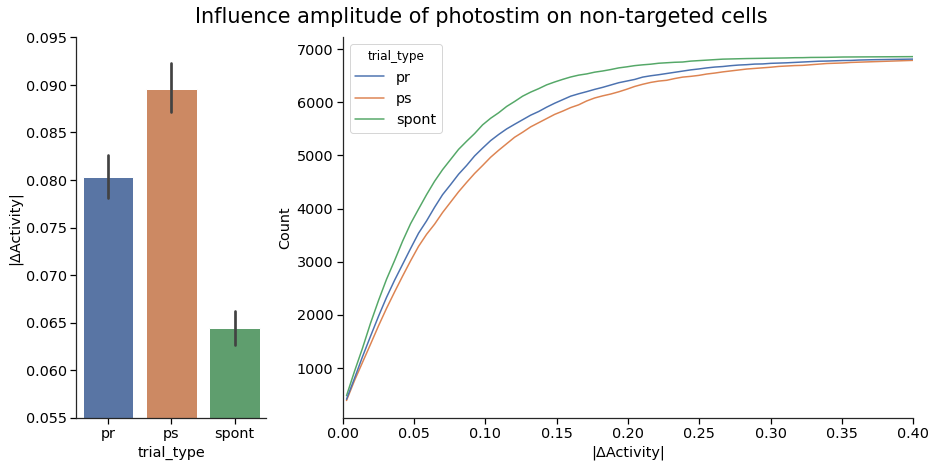

In [127]:
cell_df = pd.read_pickle(cell_df_path)

trials = ['pr', 'ps', 'spont']
targets = ['pr', 'ps', 'pr']

df = pd.DataFrame()

for i, (trial, target) in enumerate(zip(trials, targets)):
    
    non_target_df = cell_df.query('~' + target + '_target & s2_cell')
    influence = non_target_df[trial + '_avg_norm_influence']
    
    temp_df = pd.DataFrame({'trial_type' : np.repeat(trial, len(influence)),
                            'influence' : np.absolute(influence)
                           })
    
    df = pd.concat([df, temp_df])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7), gridspec_kw={'width_ratios':[1, 3]})

sns.barplot(x='trial_type', y='influence', data=df, ci=95, ax=ax[0]);
ax[0].set_ylabel('|ΔActivity|')
ax[0].set_ylim([0.055, 0.095])

# sns.kdeplot(cumulative=True, hue='trial_type', x='influence', data=df, cut=0, ax=ax[1])
sns.histplot(cumulative=True, fill=False, element='poly', hue='trial_type', x='influence', data=df, ax=ax[1])
ax[1].set_xlim([0, 0.4])
ax[1].set_xlabel('|ΔActivity|')

plt.suptitle('Influence amplitude of photostim on non-targeted cells', y=0.94, fontsize='xx-large');

pr = df[df['trial_type']=='pr']['influence'].to_numpy()
ps = df[df['trial_type']=='ps']['influence'].to_numpy()
spont = df[df['trial_type']=='spont']['influence'].to_numpy()

print('pr, spont', stats.mannwhitneyu(pr, spont))
print('ps, spont', stats.mannwhitneyu(ps, spont))
print('pr, ps', stats.mannwhitneyu(pr, ps))

11.2% p-value for pr
9.45% p-value for ps
29.4% p-value for spont


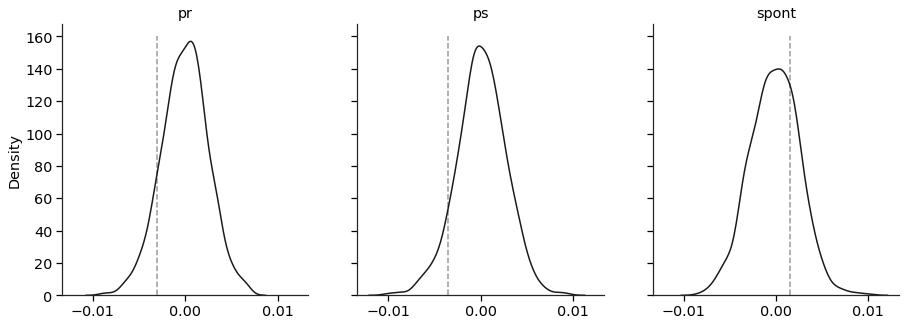

In [53]:
diff = []

trials = ['pr', 'ps', 'spont']
trial_cats = ['random', 'sensory', 'sham']
targets = ['pr', 'ps', 'pr']

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,5))

for trial, target, trial_cat, ax in zip(trials, targets, trial_cats, axes):
    
    diff = []
    
    for i in range(1,1000):
    
        random_label = cell_df.sample(frac=1)['sta_sig_whisker'].values

        cell_df_rand = cell_df.copy(deep=True)
        cell_df_rand['sta_sig_whisker'] = random_label

        whisker_df = cell_df_rand.query('~' + target + '_target & s2_cell & sta_sig_whisker')
        non_whisker_df = cell_df_rand.query('~' + target + '_target & s2_cell & ~sta_sig_whisker')

        whisker_bias = whisker_df[trial + '_avg_norm_influence'].mean()
        non_whisker_bias = non_whisker_df[trial + '_avg_norm_influence'].mean()

        diff.append(non_whisker_bias-whisker_bias)
        
    sns.kdeplot(diff, ax=ax, color='k')
    ax.set_title(trial)
    
    whisker_df = cell_df.query('~' + target + '_target & s2_cell & sta_sig_whisker')
    non_whisker_df = cell_df.query('~' + target + '_target & s2_cell & ~sta_sig_whisker')
   
    whisker_bias = whisker_df[trial + '_avg_norm_influence'].mean()
    non_whisker_bias = non_whisker_df[trial + '_avg_norm_influence'].mean()
    
    real_diff = non_whisker_bias-whisker_bias
    
    ax.vlines(real_diff, 0, 160, color='0.6', linestyle='--')
    
    sign_real_diff = np.sign(real_diff)

    if sign_real_diff > 0:
        neg_real_diff = -(real_diff)
        num_occurences = np.count_nonzero(np.logical_or(diff<neg_real_diff, diff>real_diff))
    else:
        pos_real_diff = -(real_diff)
        num_occurences = np.count_nonzero(np.logical_or(diff<real_diff, diff>pos_real_diff))
        
    print(str(num_occurences/20) + '% p-value for ' + trial)

pr, spont MannwhitneyuResult(statistic=23385572.0, pvalue=0.0414393710887369)
ps, spont MannwhitneyuResult(statistic=23202980.0, pvalue=0.005953769624415571)
pr, ps MannwhitneyuResult(statistic=23558876.0, pvalue=0.1602865988559266)
pr 1samp Ttest_1sampResult(statistic=1.2393988868767005, pvalue=0.21523998507557188)
ps 1samp Ttest_1sampResult(statistic=5.033477455991159, pvalue=4.938630677453904e-07)
spont 1samp Ttest_1sampResult(statistic=0.49213887131328304, pvalue=0.6226368383442886)


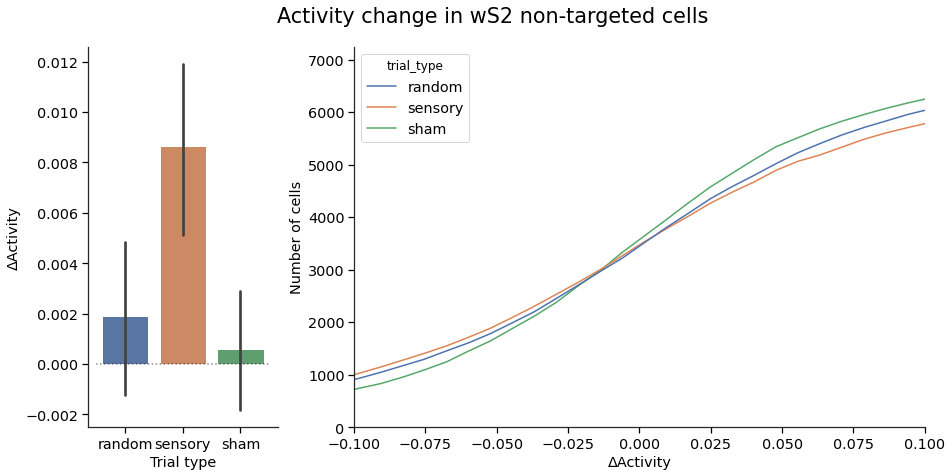

In [128]:
cell_df = pd.read_pickle(cell_df_path)

trials = ['pr', 'ps', 'spont']
trial_cats = ['random', 'sensory', 'sham']
targets = ['pr', 'ps', 'pr']

df = pd.DataFrame()

for i, (trial, target, trial_cat) in enumerate(zip(trials, targets, trial_cats)):
    
    non_target_df = cell_df.query('~' + target + '_target & s2_cell')
    bias = non_target_df[trial + '_avg_norm_influence']
    
    temp_df = pd.DataFrame({'trial_type' : np.repeat(trial_cat, len(bias)),
                            'bias' : bias
                           })
    
    df = pd.concat([df, temp_df])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7), gridspec_kw={'width_ratios':[1,3]})

sns.barplot(x='trial_type', y='bias', data=df, ci=95, ax=ax[0]);
ax[0].set_ylabel('ΔActivity')
ax[0].set_xlabel('Trial type')
ax[0].hlines(0, -0.5, 2.5, linestyles='dotted', zorder=4, alpha=0.5, color='k');

# sns.kdeplot(cumulative=True, hue='trial_type', x='bias', data=df, ax=ax[1])
sns.histplot(cumulative=True, fill=False, element='poly', hue='trial_type', x='bias', data=df, ax=ax[1])
ax[1].set_xlim([-0.1, 0.1])
ax[1].set_xlabel('ΔActivity')
ax[1].set_ylabel('Number of cells')

plt.suptitle('Activity change in wS2 non-targeted cells', y=0.96, fontsize='xx-large');

pr = df[df['trial_type']=='random']['bias'].to_numpy()
ps = df[df['trial_type']=='sensory']['bias'].to_numpy()
spont = df[df['trial_type']=='sham']['bias'].to_numpy()

print('pr, spont', stats.mannwhitneyu(pr, spont))
print('ps, spont', stats.mannwhitneyu(ps, spont))
print('pr, ps', stats.mannwhitneyu(pr, ps))

print('pr 1samp', stats.ttest_1samp(pr, 0))
print('ps 1samp', stats.ttest_1samp(ps, 0))
print('spont 1samp', stats.ttest_1samp(spont, 0))

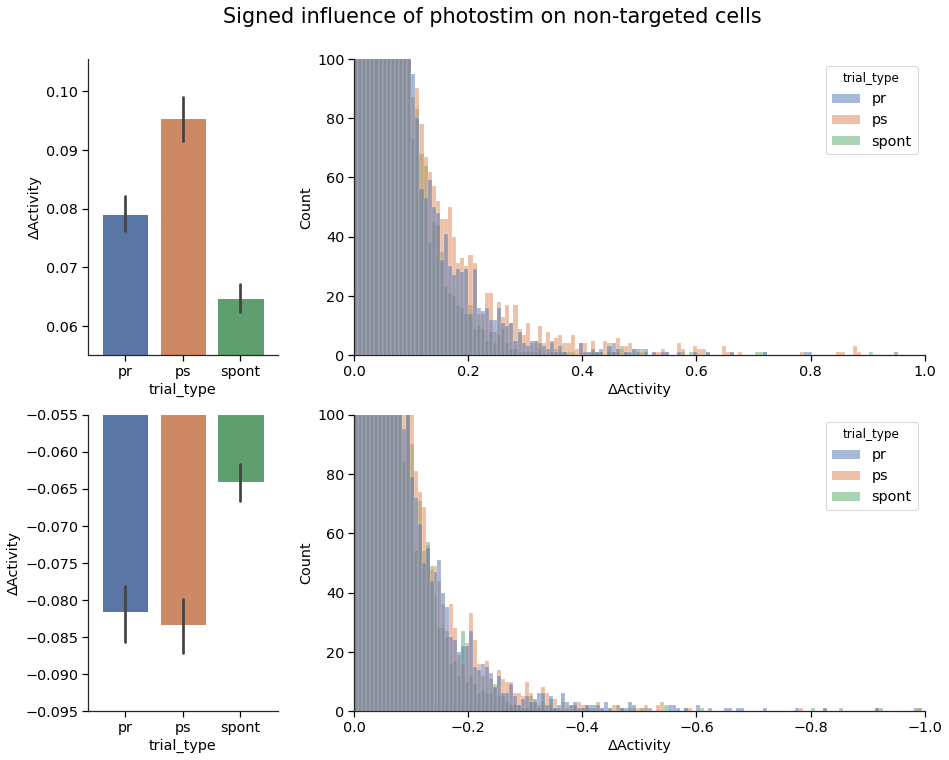

In [131]:
cell_df = pd.read_pickle(cell_df_path)

trials = ['pr', 'ps', 'spont']
targets = ['pr', 'ps', 'pr']

pos_inf_df = pd.DataFrame()
neg_inf_df = pd.DataFrame()

for trial, target in zip(trials, targets):
    
    non_target_df = cell_df.query('~' + target + '_target & s2_cell')
    inf_pos = non_target_df.query(trial + '_avg_norm_influence > 0')[trial + '_avg_norm_influence']
    inf_neg = non_target_df.query(trial + '_avg_norm_influence <= 0')[trial + '_avg_norm_influence']
    
    pos_inf_df = pd.concat([pos_inf_df, pd.DataFrame({'trial_type' : np.repeat(trial, len(inf_pos)),
                                                        'bias_pos' : inf_pos
                                                       })
                            ])
    
    neg_inf_df = pd.concat([neg_inf_df, pd.DataFrame({'trial_type' : np.repeat(trial, len(inf_neg)),
                                                        'bias_neg' : inf_neg
                                                       })
                            ])

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12), sharex=False, gridspec_kw={'width_ratios':[1,3]})

bias_signs = ['pos', 'neg']
dfs = [pos_inf_df, neg_inf_df]

for df, bias_sign, col in zip(dfs, bias_signs, axes):
    sns.barplot(x='trial_type', y='bias_' + bias_sign, data=df, ci=95, ax=col[0]);
    col[0].set_ylabel('ΔActivity')
    col[0].hlines(0, -0.5, 2.5, linestyles='dotted', zorder=4, alpha=0.5, color='k');
#     col[0].set_title(bias_sign)
    
#     sns.kdeplot(cumulative=True, hue=df['trial_type'], x=np.absolute(df['bias_' + bias_sign]), ax=col[1], cut=0)
    sns.histplot(cumulative=False, hue=df['trial_type'], x=df['bias_' + bias_sign], ax=col[1])
    col[1].set_ylim([0, 100])
    col[1].set_xlabel('ΔActivity')

axes[0,0].set_ylim([0.055, 0.105])
axes[1,0].set_ylim([-0.095, -0.055])
axes[0,1].set_xlim([0, 1])
axes[1,1].set_xlim([0, -1])

plt.suptitle('Signed influence of photostim on non-targeted cells', y=0.94, fontsize='xx-large');

## Plot spont and photostim trials for a few random non-target cells

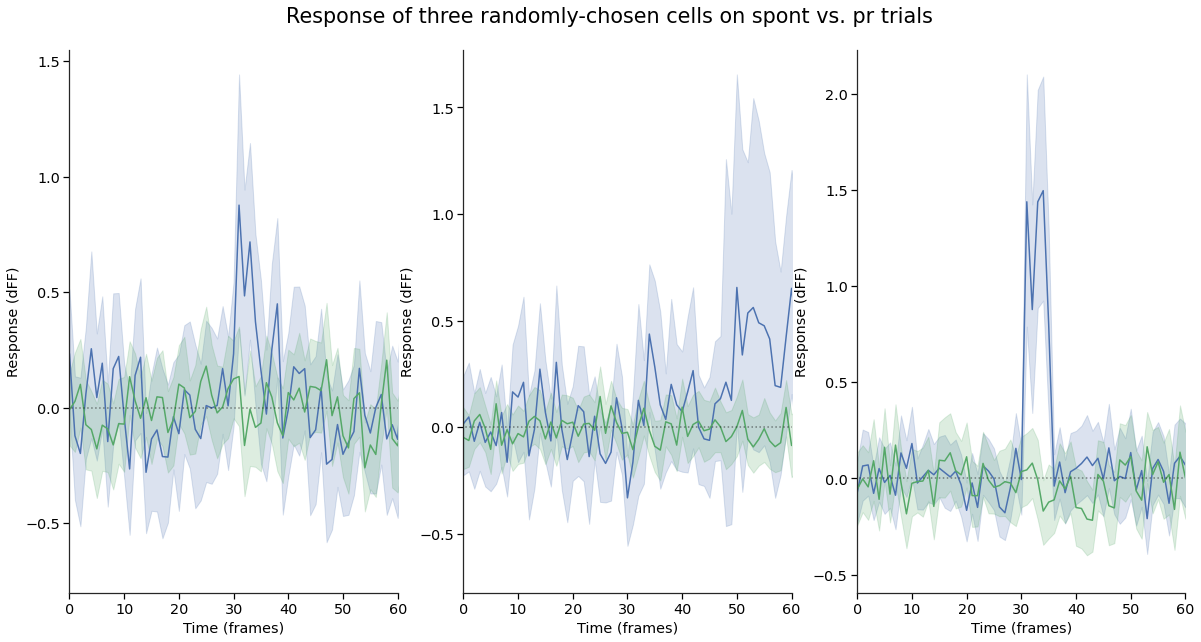

In [132]:
# cell_trial_single_timepoint_df = pd.read_pickle(cell_trial_single_timepoint_df_path)
# cell_df = pd.read_pickle(cell_df_path)

trial = 'pr'
target = 'pr'
control = 'spont'

high_influence_df = cell_df.query('(' + trial + '_avg_norm_influence > 0.1) & ~' + target + '_target & s2_cell')
cell_ids = high_influence_df.sample(n=3).index

chosen_cells = cell_trial_single_timepoint_df['cell_id'].isin(cell_ids)
chosen_cells_df = cell_trial_single_timepoint_df[chosen_cells]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10))

for single_cell_df, ax in zip(chosen_cells_df.groupby('cell_id'), axes):
    
    x = np.tile(np.arange(0,182), 100) # frames rather than timepoints
    sns.lineplot(x=x, y=trial + '_resp', color='C0', ci=95, ax=ax, data=single_cell_df[1])
    sns.lineplot(x=x, y=control + '_resp', color='C2', ci=95, ax=ax, data=single_cell_df[1])
    ax.hlines(0, -20, 185, linestyles='dotted', zorder=4, alpha=0.5, color='k');
    
    ax.set_xlim([0, 60])
    ax.set_xlabel('Time (frames)')
    ax.set_ylabel('Response (dFF)')
    
    display(fig)
    clear_output(wait = True)
    
plt.suptitle('Response of three randomly-chosen cells on ' + control + ' vs. ' + trial + ' trials', 
             y=0.94, fontsize='xx-large');

In [45]:
cell_mean_timepoint_df = pd.read_pickle(cell_mean_timepoint_df_path)

trial = 'pr'
target = 'pr'

high_influence_df = cell_df.query('(' + trial + '_avg_norm_influence > 0.25) & ~' + target + '_target & s2_cell')
cell_ids = high_influence_df.index

chosen_cells = cell_mean_timepoint_df['cell_id'].isin(cell_ids)
chosen_cells_df = cell_mean_timepoint_df[chosen_cells]

<AxesSubplot:xlabel='frame', ylabel='pr_sta_resp'>

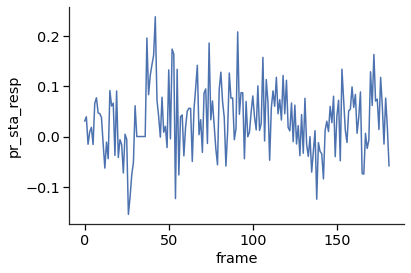

In [47]:
mean_df = chosen_cells_df.groupby('frame').mean()

sns.lineplot(x=mean_df.index, y=mean_df.pr_sta_resp)

## Plot influence distribution binned by distance from nearest target

### Calculate nearest neighbour distance to nearest responsive target cell for each cell

In [44]:
# goal: get a new column in cell_df which shows euclidean distance to nearest target (only for non-target, nan otherwise)
# get all target cell_med values for this trial type (i.e. pr)
# for each row of cell_df, if target for this trial type, add nan to list, if not a target,
# get cell_med for this non-target
# search for nearest neighbour of all targets and provide euclidean distance
# add euclid distance to cell_df

cell_df = pd.read_pickle(cell_df_path)
cell_df = cell_df.drop(columns=['pr_dist_to_targ', 'ps_dist_to_targ', 'spont_dist_to_targ'])

dist_to_targ = pd.DataFrame(index=cell_df.index, columns=['pr_dist_to_targ', 
                                                          'ps_dist_to_targ', 
                                                          'spont_dist_to_targ'
                                                         ])

targets = ['pr', 'ps']
trials = ['pr', 'ps', 'spont']

for target, trial in zip(targets, trials):
    for name, group in cell_df.groupby('session_id'):
        target_coords = group.query(target + '_target & sta_sig_' + trial)['cell_med'].to_numpy()
        target_coords = np.vstack(target_coords)
        
        target_query = group[target + '_target']
        cell_meds = group['cell_med']
        cell_ids = group.index

        for i, (target_bool, cell_med, cell_id) in enumerate(zip(target_query, cell_meds, cell_ids)):
            
            if target_bool == False:
                dists = spatial.distance.cdist([cell_med], target_coords)
                min_dist = np.amin(dists)
                
                dist_to_targ.loc[cell_id, trial + '_dist_to_targ'] = min_dist

cell_df = pd.concat([cell_df, dist_to_targ], axis=1) # maybe MERGE here instead?

cell_df.to_pickle(cell_df_path)

### Calculate distance to target group from each cell

In [86]:
# goal: get a new column in cell_df which shows euclidean distance to centre of targets
# get all target cell_med values for this trial type (i.e. pr)
# for each row of cell_df, if target for this trial type, add nan to list, if not a target,
# get cell_med for this non-target
# add euclid distance to centre of targets to cell_df

cell_df = pd.read_pickle(cell_df_path)
cell_df = cell_df.drop(columns=['pr_dist_to_targ_group', 'ps_dist_to_targ_group', 'spont_dist_to_targ_group'])

dist_to_targ = pd.DataFrame(index=cell_df.index, columns=['pr_dist_to_targ_group', 
                                                          'ps_dist_to_targ_group', 
                                                          'spont_dist_to_targ_group'
                                                         ])

targets = ['pr', 'ps']
trials = ['pr', 'ps', 'spont']

for target, trial in zip(targets, trials):
    for name, group in cell_df.groupby('session_id'):
        target_coords = group.query(target + '_target & sta_sig_' + trial)['cell_med'].to_numpy()
        target_coords = np.vstack(target_coords)
        
        centre_x = np.mean([x for (x, y) in target_coords])
        centre_y = np.mean([y for (x, y) in target_coords])
        
        target_query = group[target + '_target']
        cell_meds = group['cell_med']
        cell_ids = group.index
        
        for i, (target_bool, cell_med, cell_id) in enumerate(zip(target_query, cell_meds, cell_ids)):
            
            if target_bool == False:
                dist = spatial.distance.cdist([cell_med], [[centre_x, centre_y]])                
                dist_to_targ.loc[cell_id, trial + '_dist_to_targ_group'] = dist[0][0]

cell_df = pd.concat([cell_df, dist_to_targ], axis=1) # maybe MERGE here instead?

cell_df.to_pickle(cell_df_path)

### Bin and mean data by dist_to_target, then plot

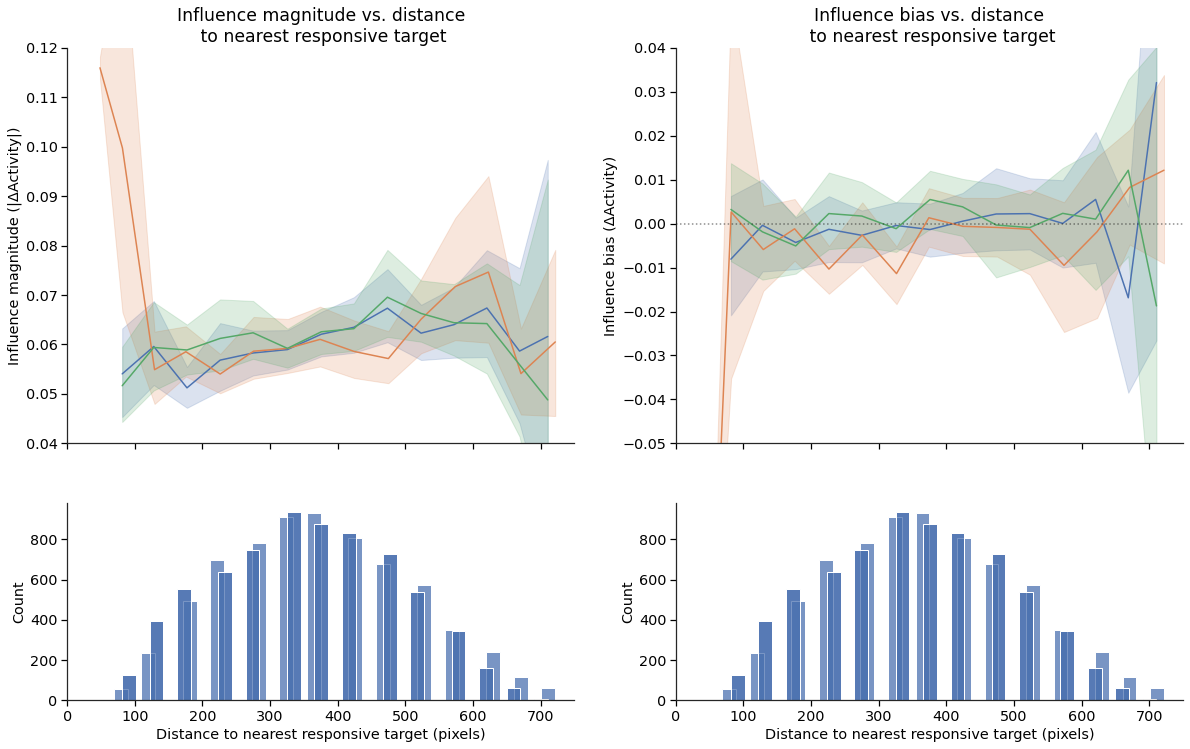

In [48]:
trials = ['pr', 'ps', 'spont']
targets = ['pr', 'ps', 'pr']

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(20,12), gridspec_kw={'height_ratios' : [2,1]})

for trial, target in zip(trials, targets):
    df = cell_df.query('~' + target + '_target & s2_cell')
    dist = df[target + '_dist_to_targ'].values.astype('float32')
    influence = np.absolute(df[trial + '_avg_norm_influence'].values.astype('float32'))
    bias = df[trial + '_avg_norm_influence'].values.astype('float32')
    
    mean_dist, bin_edges, bin_nums = stats.binned_statistic(dist, dist, statistic=np.nanmean, bins=15, range=(0,750))
    bin_nums[np.where(bin_nums==16)[0]] = 15
    
    count, hist_bins = np.histogram(dist, bin_edges)
#     print(np.array(['bin {0}: {1} cells, {2:.0f} pixels mean dist'.format(bin_num, n_cells, mean_d) \
#                 for bin_num, n_cells, mean_d in zip(range(0,16), count, mean_dist)]), '\n')

    temp_df = pd.DataFrame({'bin_number' : bin_nums,
                            'mean_dist' : mean_dist[bin_nums-1],
                            'influence' : influence,
                            'bias' : bias
                           })
        
#     sns.lineplot(y=mean_inf, x=mean_dist)
    sns.lineplot(x='mean_dist', y='influence', ci=95, data=temp_df, ax=axes[0,0])
    sns.lineplot(x='mean_dist', y='bias', ci=95, data=temp_df, ax=axes[0,1])
    sns.histplot(x='mean_dist', data=temp_df, ax=axes[1,0])
    sns.histplot(x='mean_dist', data=temp_df, ax=axes[1,1])

axes[0,0].set_ylabel('Influence magnitude (|ΔActivity|)')
axes[0,0].set_title('Influence magnitude vs. distance\n to nearest responsive target', fontsize='x-large');
axes[0,0].set_ylim([0.04, 0.12]);
# axes[0,0].set_ylim([0.04, 0.12]);
axes[0,0].set_xlim([0, 750])

axes[0,1].set_ylabel('Influence bias (ΔActivity)')
axes[0,1].set_title('Influence bias vs. distance\n to nearest responsive target', fontsize='x-large');
axes[0,1].hlines(0, 0, 750, linestyles='dotted', zorder=4, alpha=0.5, color='k');
axes[0,1].set_ylim([-0.05, 0.04]);
# axes[0,1].set_ylim([-0.02, 0.03]);
axes[0,1].set_xlim([0, 750]);

axes[1,0].set_xlabel('Distance to nearest responsive target (pixels)');
axes[1,1].set_xlabel('Distance to nearest responsive target (pixels)');

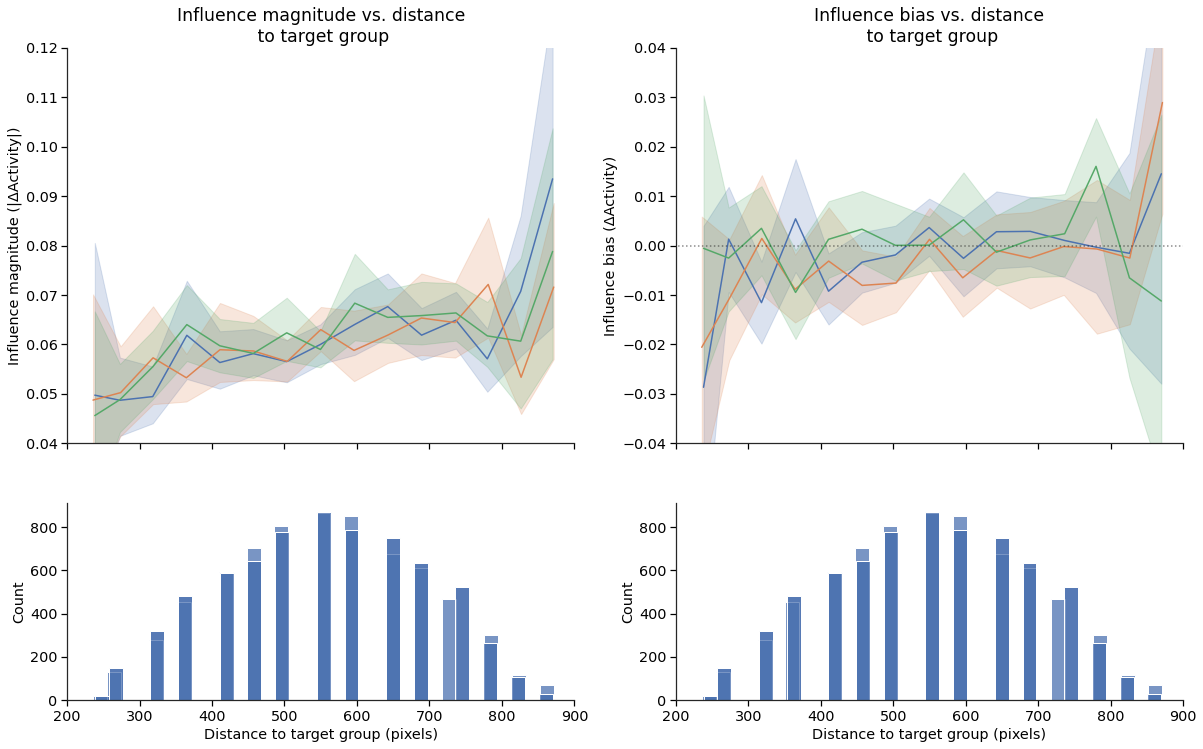

In [49]:
trials = ['pr', 'ps', 'spont']
targets = ['pr', 'ps', 'pr']

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(20,12), gridspec_kw={'height_ratios' : [2,1]})

for trial, target in zip(trials, targets):
    df = cell_df.query('~' + target + '_target & s2_cell')
    dist = df[target + '_dist_to_targ_group'].values.astype('float32')
    influence = np.absolute(df[trial + '_avg_norm_influence'].values.astype('float32'))
    bias = df[trial + '_avg_norm_influence'].values.astype('float32')
    
    mean_dist, bin_edges, bin_nums = stats.binned_statistic(dist, dist, statistic=np.nanmean, bins=15, range=(200,900))
    bin_nums[np.where(bin_nums==16)[0]] = 15
    
    count, hist_bins = np.histogram(dist, bin_edges)
#     print(np.array(['bin {0}: {1} cells, {2:.0f} pixels mean dist'.format(bin_num, n_cells, mean_d) \
#                 for bin_num, n_cells, mean_d in zip(range(0,16), count, mean_dist)]), '\n')

    temp_df = pd.DataFrame({'bin_number' : bin_nums,
                            'mean_dist' : mean_dist[bin_nums-1],
                            'influence' : influence,
                            'bias' : bias
                           })
        
#     sns.lineplot(y=mean_inf, x=mean_dist)
    sns.lineplot(x='mean_dist', y='influence', ci=95, data=temp_df, ax=axes[0,0])
    sns.lineplot(x='mean_dist', y='bias', ci=95, data=temp_df, ax=axes[0,1])
    sns.histplot(x='mean_dist', data=temp_df, ax=axes[1,0])
    sns.histplot(x='mean_dist', data=temp_df, ax=axes[1,1])

axes[0,0].set_ylabel('Influence magnitude (|ΔActivity|)')
axes[0,0].set_title('Influence magnitude vs. distance\n to target group', fontsize='x-large');
axes[0,0].set_ylim([0.04, 0.12]);
# axes[0,0].set_ylim([0.04, 0.12]);
axes[0,0].set_xlim([200, 900])

axes[0,1].set_ylabel('Influence bias (ΔActivity)')
axes[0,1].set_title('Influence bias vs. distance\n to target group', fontsize='x-large');
axes[0,1].hlines(0, 0, 900, linestyles='dotted', zorder=4, alpha=0.5, color='k');
axes[0,1].set_ylim([-0.04, 0.04]);
# axes[0,1].set_ylim([-0.02, 0.03]);
axes[0,1].set_xlim([200, 900]);

axes[1,0].set_xlabel('Distance to target group (pixels)');
axes[1,1].set_xlabel('Distance to target group (pixels)');

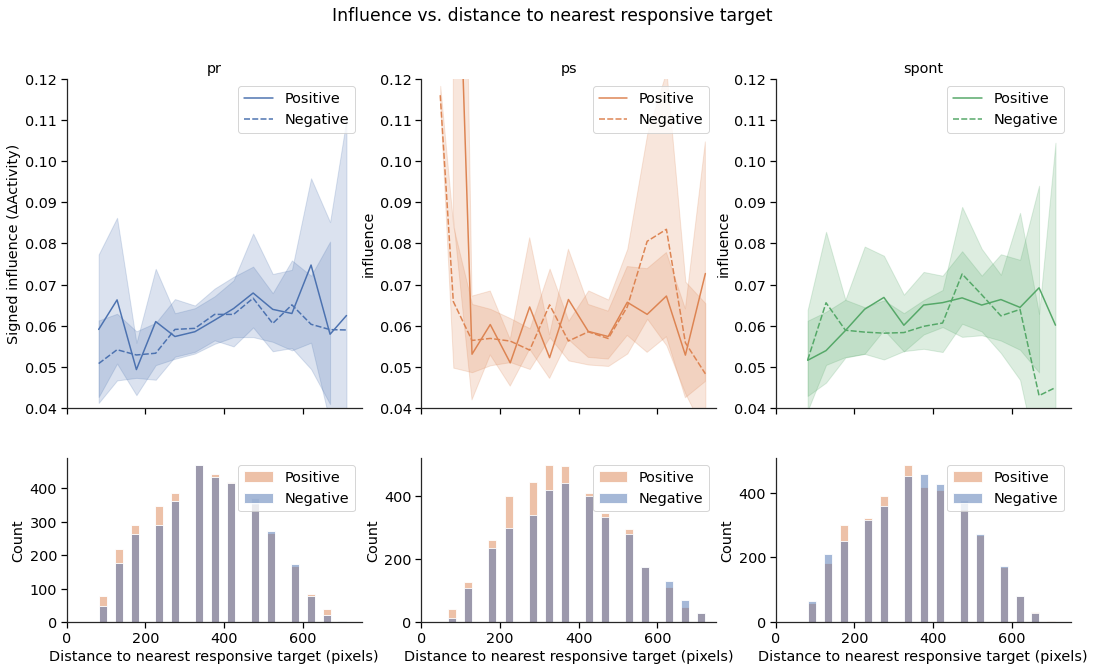

In [50]:
trials = ['pr', 'ps', 'spont']
targets = ['pr', 'ps', 'pr']
colors = ['C0', 'C1', 'C2']

fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(18,10), gridspec_kw={'height_ratios' : [2,1]})

for trial, target, col, color in zip(trials, targets, axes.swapaxes(0,1), colors):
    df = cell_df.query('~' + target + '_target & s2_cell')
    dist = df[target + '_dist_to_targ'].values.astype('float32')
    influence = df[trial + '_avg_norm_influence'].values.astype('float32')
    sign = df[trial + '_avg_norm_influence'] > 0
    
#     mean_inf, bin_edges, bin_nums = stats.binned_statistic(dist, influence, statistic=np.nanmean, bins=15)
    mean_dist, bin_edges, bin_nums = stats.binned_statistic(dist, dist, statistic=np.nanmean, bins=15, range=(0,750))
    bin_nums[np.where(bin_nums==16)[0]] = 15
    
    count, hist_bins = np.histogram(dist, bin_edges)
#     print(np.array(['bin {0}: {1} cells, {2:.0f} pixels mean dist'.format(bin_num, n_cells, mean_d) \
#                 for bin_num, n_cells, mean_d in zip(range(0,16), count, mean_dist)]), '\n')

    temp_df = pd.DataFrame({'bin_number' : bin_nums,
                            'mean_dist' : mean_dist[bin_nums-1],
                            'influence' : influence,
                            'sign' : sign
                           })
        
#     sns.lineplot(y=mean_inf, x=mean_dist)
    sns.lineplot(x='mean_dist', y=np.absolute(temp_df['influence']), style='sign', style_order=[True, False], 
                 color=color, ci=95, data=temp_df, ax=col[0])
    sns.histplot(x='mean_dist', hue='sign', hue_order=[True, False], data=temp_df, ax=col[1])
    col[0].set_title(trial)

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        if col_i==0 and row_i==0: col.set_ylabel('Signed influence (ΔActivity)')
        if row_i==0: col.set_ylim([0.04, 0.12])
        
        col.set_xlim([0, 750])
        col.legend(['Positive', 'Negative'])

        if row_i==1: col.set_xlabel('Distance to nearest responsive target (pixels)');

plt.suptitle('Influence vs. distance to nearest responsive target', fontsize='x-large');

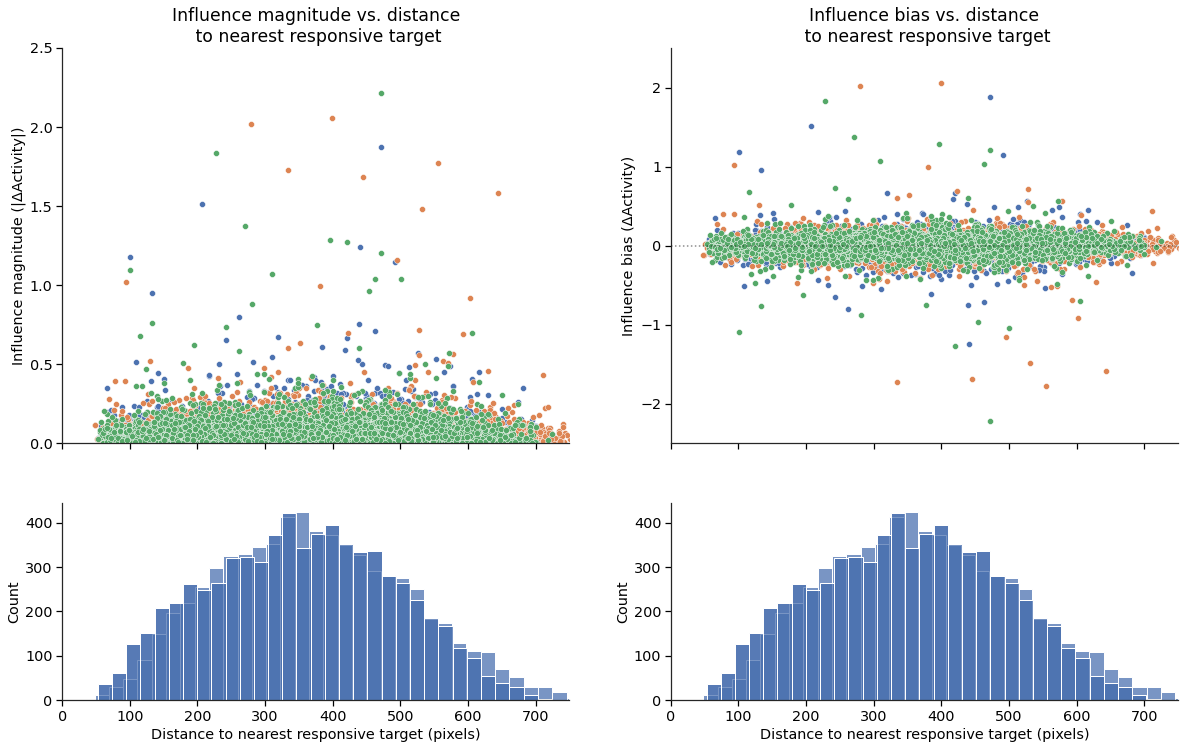

In [51]:
trials = ['pr', 'ps', 'spont']
targets = ['pr', 'ps', 'pr']

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(20,12), gridspec_kw={'height_ratios' : [2,1]})

for trial, target in zip(trials, targets):
    df = cell_df.query('~' + target + '_target & s2_cell')

#     sns.lineplot(y=mean_inf, x=mean_dist)
    sns.scatterplot(x=target + '_dist_to_targ', y=np.absolute(df[trial + '_avg_norm_influence']), ci=95, 
                    data=df, ax=axes[0,0])
    sns.scatterplot(x=target + '_dist_to_targ', y=trial + '_avg_norm_influence', ci=95, data=df, ax=axes[0,1])
    sns.histplot(x=target + '_dist_to_targ', data=df, ax=axes[1,0])
    sns.histplot(x=target + '_dist_to_targ', data=df, ax=axes[1,1])

axes[0,0].set_ylabel('Influence magnitude (|ΔActivity|)')
axes[0,0].set_title('Influence magnitude vs. distance\n to nearest responsive target', fontsize='x-large');
axes[0,0].set_ylim([0, 2.5]);
axes[0,0].set_xlim([0, 750])

axes[0,1].set_ylabel('Influence bias (ΔActivity)')
axes[0,1].set_title('Influence bias vs. distance\n to nearest responsive target', fontsize='x-large');
axes[0,1].hlines(0, 0, 750, linestyles='dotted', zorder=4, alpha=0.5, color='k');
axes[0,1].set_ylim([-2.5, 2.5]);
axes[0,1].set_xlim([0, 750]);

axes[1,0].set_xlabel('Distance to nearest responsive target (pixels)');
axes[1,1].set_xlabel('Distance to nearest responsive target (pixels)');

### Bin and mean data by whisker response, then plot

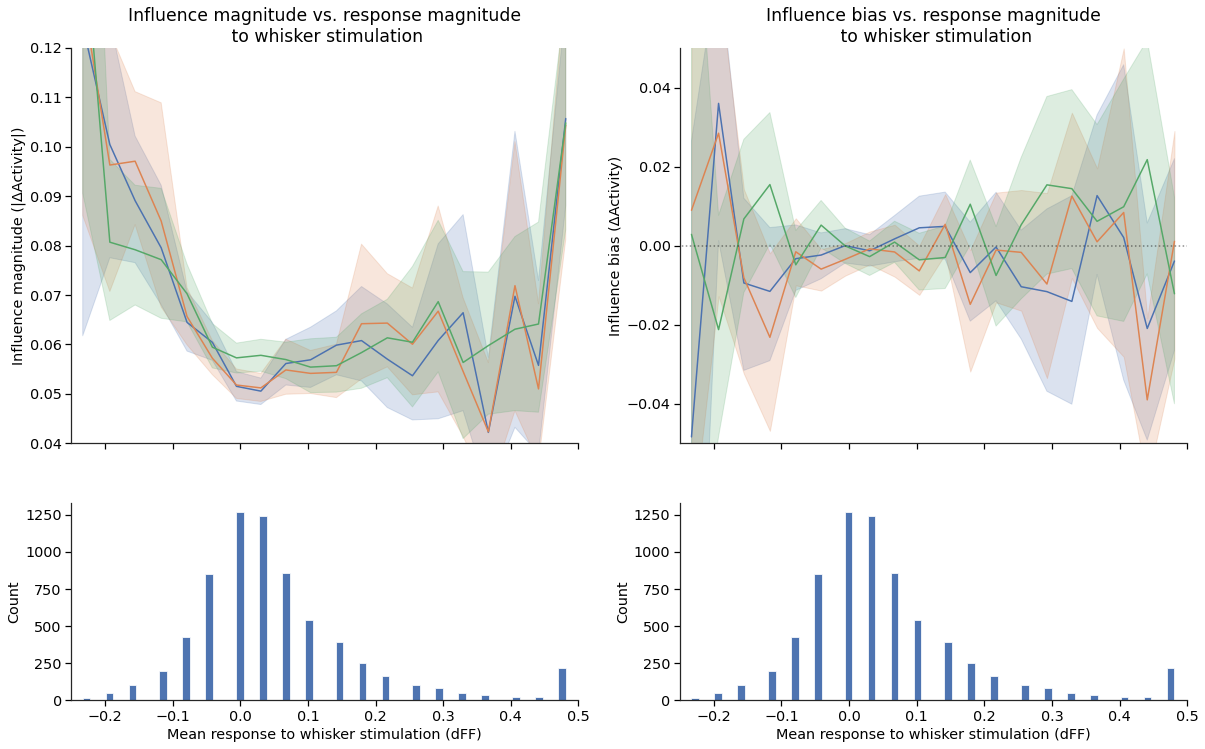

In [14]:
trials = ['pr', 'ps', 'spont']
targets = ['pr', 'ps', 'pr']

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(20,12), gridspec_kw={'height_ratios' : [2,1]})

for trial, target in zip(trials, targets):
    df = cell_df.query('~' + target + '_target & s2_cell')
    resp = df['whisker_sta_amp_resp'].values.astype('float32')
    influence = np.absolute(df[trial + '_avg_norm_influence'].values.astype('float32'))
    bias = df[trial + '_avg_norm_influence'].values.astype('float32')
    
    bins = 20
#     mean_inf, bin_edges, bin_nums = stats.binned_statistic(dist, influence, statistic=np.nanmean, bins=15)
    mean_resp, bin_edges, bin_nums = stats.binned_statistic(resp, resp, statistic=np.nanmean, 
                                                            bins=bins, range=(-0.25,0.5))
    bin_nums[np.where(bin_nums==bins+1)[0]] = bins
    
    count, hist_bins = np.histogram(resp, bin_edges)
#     print(np.array(['bin {0}: {1} cells, {2:.2f} dFF mean response'.format(bin_num, n_cells, mean_r) \
#                 for bin_num, n_cells, mean_r in zip(range(0,bins), count, mean_resp)]), '\n')

    temp_df = pd.DataFrame({'bin_number' : bin_nums,
                            'mean_resp'  : mean_resp[bin_nums-1],
                            'influence'  : influence,
                            'bias'       : bias
                           })
        
#     sns.lineplot(y=mean_inf, x=mean_dist)
    sns.lineplot(x='mean_resp', y='influence', ci=95, data=temp_df, ax=axes[0,0])
    sns.lineplot(x='mean_resp', y='bias', ci=95, data=temp_df, ax=axes[0,1])
    sns.histplot(x='mean_resp', data=temp_df, ax=axes[1,0])
    sns.histplot(x='mean_resp', data=temp_df, ax=axes[1,1])
    
axes[0,0].set_ylabel('Influence magnitude (|ΔActivity|)')
axes[0,0].set_title('Influence magnitude vs. response magnitude\n to whisker stimulation', fontsize='x-large');
# axes[0,0].set_ylim([0.1, 0.25]);
axes[0,0].set_ylim([0.04, 0.12]);
axes[0,0].set_xlim([-0.25, 0.5]);

axes[0,1].set_ylabel('Influence bias (ΔActivity)')
axes[0,1].set_title('Influence bias vs. response magnitude\n to whisker stimulation', fontsize='x-large');
axes[0,1].hlines(0, -1, 1, linestyles='dotted', zorder=4, alpha=0.5, color='k');
# axes[0,1].set_ylim([-0.1, 0.1]);
axes[0,1].set_ylim([-0.05, 0.05]);
axes[0,1].set_xlim([-0.25, 0.5]);

axes[1,0].set_xlabel('Mean response to whisker stimulation (dFF)');
axes[1,1].set_xlabel('Mean response to whisker stimulation (dFF)');

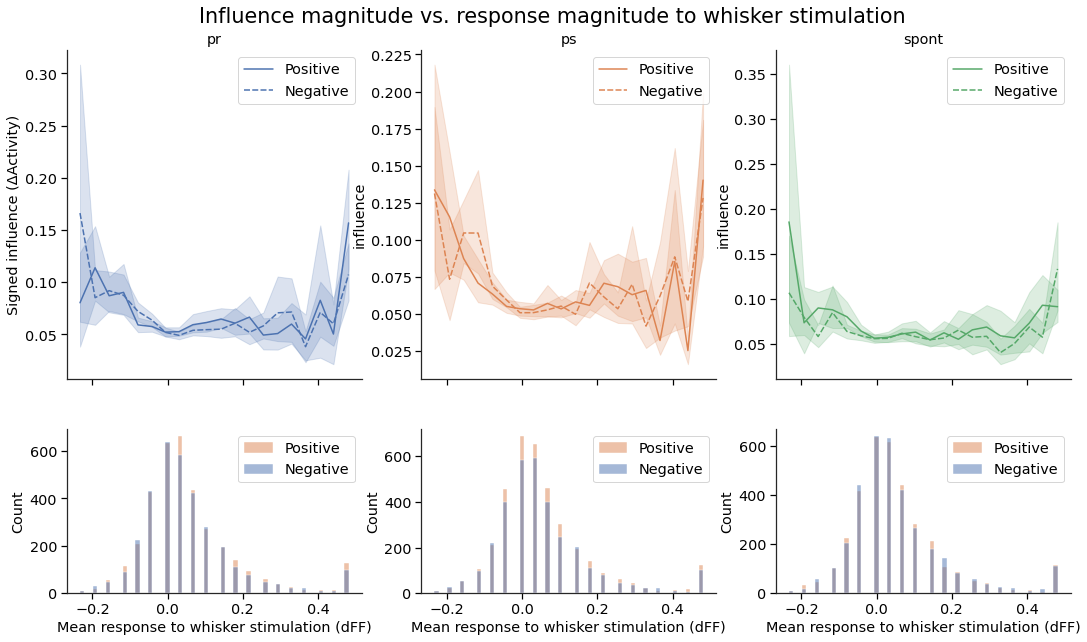

In [56]:
trials = ['pr', 'ps', 'spont']
targets = ['pr', 'ps', 'pr']
colors = ['C0', 'C1', 'C2']

fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(18,10), gridspec_kw={'height_ratios' : [2,1]})

for trial, target, col, color in zip(trials, targets, axes.swapaxes(0,1), colors):
    df = cell_df.query('~' + target + '_target & s2_cell')
    resp = df['whisker_sta_amp_resp'].values.astype('float32')
    influence = df[trial + '_avg_norm_influence'].values.astype('float32')
    sign = df[trial + '_avg_norm_influence'] > 0
    
    bins = 20
    
#     mean_inf, bin_edges, bin_nums = stats.binned_statistic(dist, influence, statistic=np.nanmean, bins=15)
    mean_resp, bin_edges, bin_nums = stats.binned_statistic(resp, resp, statistic=np.nanmean, 
                                                            bins=bins, range=(-0.25,0.5))
    bin_nums[np.where(bin_nums==bins+1)[0]] = bins
    
    count, hist_bins = np.histogram(resp, bin_edges)
#     print(np.array(['bin {0}: {1} cells, {2:.0f} pixels mean dist'.format(bin_num, n_cells, mean_d) \
#                 for bin_num, n_cells, mean_d in zip(range(0,16), count, mean_dist)]), '\n')

    temp_df = pd.DataFrame({'bin_number' : bin_nums,
                            'mean_resp' : mean_resp[bin_nums-1],
                            'influence' : influence,
                            'sign' : sign
                           })
        
#     sns.lineplot(y=mean_inf, x=mean_dist)
    sns.lineplot(x='mean_resp', y=np.absolute(temp_df['influence']), style='sign', style_order=[True, False], 
                 color=color, ci=95, data=temp_df, ax=col[0])
    sns.histplot(x='mean_resp', hue='sign', hue_order=[True, False], data=temp_df, ax=col[1])
    col[0].set_title(trial)

for row_i, row in enumerate(axes):
    for col_i, col in enumerate(row):
        if col_i==0 and row_i==0: col.set_ylabel('Signed influence (ΔActivity)')
#         if row_i==0: col.set_ylim([0.125, 0.25])
        
#         col.set_xlim([0, 750])
        col.legend(['Positive', 'Negative'])

        if row_i==1: col.set_xlabel('Mean response to whisker stimulation (dFF)');

plt.suptitle('Influence magnitude vs. response magnitude to whisker stimulation', y=0.94, fontsize='xx-large');